# visualize global performance 

# visualize the csv file

1. Attack Success Rate - Defense Comparison

In [1]:
import pandas as pd
from pathlib import Path

# df_round = pd.read_csv("result_csv_226/all_rounds.csv")
res_path="result_35"
df_summary = pd.read_csv(f"{res_path}/summary.csv")
save_path = f"{res_path}/visualization"
Path(save_path).mkdir(parents=True, exist_ok=True)


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.ticker as mtick

# Set style
sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.size': 12})
# Set style
sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.size': 12})
visial_save_path = "./visualization"
Path(visial_save_path).mkdir(parents=True, exist_ok=True)
# Consistent colors
COLOR_PALETTE = sns.color_palette("Set2")

def plot_defense_comparison(results_df, save_path):
    plt.figure(figsize=(14, 6))
    
    # Create plot
    ax = sns.barplot(
        data=results_df, 
        x='IID', 
        y='FINAL_ASR',
        hue='AGGREGATION_METHOD',
        errorbar=('ci', 95),
        palette=COLOR_PALETTE
    )
    
    # Add labels and title
    plt.xlabel('Data Distribution')
    plt.ylabel('Final Attack Success Rate')
    plt.title('Attack Success Rate: FedAvg vs MaRTFL', fontsize=14)
    plt.ylim(0, 1)
    plt.legend(title='Aggregation Method')
    
    # Add value labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', padding=3)
    
    plt.tight_layout()
    plt.savefig(f'{save_path}/defense_comparison.png', dpi=300)
    plt.show()

In [18]:
def plot_defense_comparison(results_df, save_path):
    plt.figure(figsize=(14, 6))
    
    # Create plot
    ax = sns.barplot(
        data=results_df, 
        x='IID', 
        y='FINAL_ASR',
        hue='AGGREGATION_METHOD',
        errorbar=('ci', 95),
        palette=COLOR_PALETTE
    )
    
    # Format y-axis as percentage
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    
    # Add labels and title
    plt.xlabel('Data Distribution')
    plt.ylabel('Final Attack Success Rate (%)')
    plt.title('Attack Success Rate: FedAvg vs MaRTFL', fontsize=14)
    plt.ylim(0, 1)
    plt.legend(title='Aggregation Method')
    
    # Add value labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', padding=3)
    
    # Add sample sizes below each group (if available in data)
    for i, iid_type in enumerate(results_df['IID'].unique()):
        count = len(results_df[results_df['IID'] == iid_type])
        plt.text(i, -0.03, f"n={count}", ha='center', fontsize=10)
    
    # Add improvement percentages between pairs
    for i, iid in enumerate(results_df['IID'].unique()):
        fedavg = results_df[(results_df['IID'] == iid) & 
                           (results_df['AGGREGATION_METHOD'] == 'FedAvg')]['FINAL_ASR'].mean()
        martfl = results_df[(results_df['IID'] == iid) & 
                           (results_df['AGGREGATION_METHOD'] == 'MaRTFL')]['FINAL_ASR'].mean()
        
        if fedavg > 0:  # Avoid division by zero
            improvement = ((fedavg - martfl) / fedavg) * 100
            plt.text(i, max(fedavg, martfl) + 0.05, 
                    f"↓{improvement:.1f}%", 
                    ha='center', color='green', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(f'{save_path}/defense_comparison.png', dpi=300)
    
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\zeyu song\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

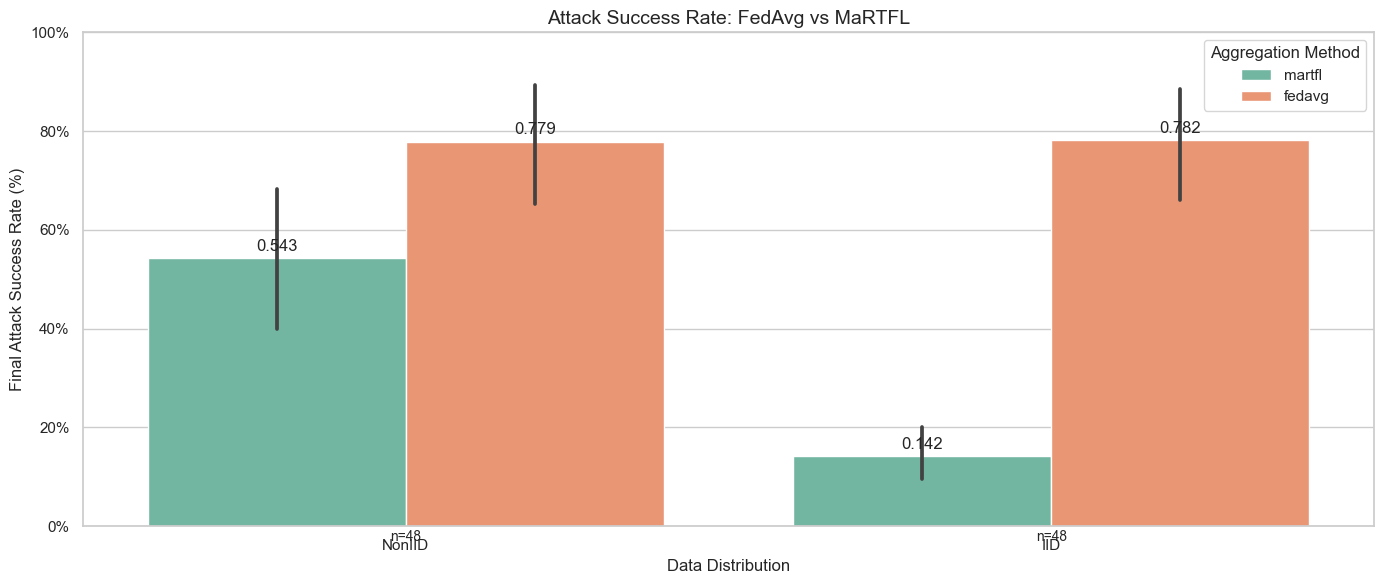

In [19]:
plot_defense_comparison(df_summary,visial_save_path)

2. Impact of Adversary Ratio

In [22]:
def plot_adversary_ratio_impact(results_df, save_path):
    plt.figure(figsize=(15, 8))
    
    # Create plot with multiple panels
    g = sns.FacetGrid(
        results_df, 
        col='IID', 
        row='IS_SYBIL',
        height=3.5, 
        aspect=1.2,
        sharex=True,
        sharey=True
    )
    
    # Map data to plot
    g.map_dataframe(
        sns.lineplot, 
        x='ADV_RATE', 
        y='FINAL_ASR', 
        hue='AGGREGATION_METHOD',
        marker='o',
        palette=COLOR_PALETTE
    )
    
    # Customize appearance
    g.set_axis_labels('Adversary Ratio', 'Attack Success Rate')
    g.set_titles('Data: {col_name} | Sybil: {row_name}')
    g.add_legend(title='Aggregation Method')
    g.set(ylim=(0, 1))
    
    # Add horizontal gridlines
    for ax in g.axes.flat:
        ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.savefig(f'{save_path}/adversary_ratio_impact.png', dpi=300)
    plt.show()

In [23]:
def plot_adversary_ratio_impact(results_df, save_path):
    plt.figure(figsize=(15, 8))
    
    # Create plot with multiple panels
    g = sns.FacetGrid(
        results_df, 
        col='IID', 
        row='IS_SYBIL',
        height=3.5, 
        aspect=1.2,
        sharex=True,
        sharey=True,
        margin_titles=True
    )
    
    # Map data to plot with error bands
    g.map_dataframe(
        sns.lineplot, 
        x='ADV_RATE', 
        y='FINAL_ASR', 
        hue='AGGREGATION_METHOD',
        marker='o',
        markersize=8,
        linewidth=2.5,
        palette=COLOR_PALETTE,
        errorbar=('ci', 95),
        err_style='band'
    )
    
    # Format y-axis as percentage
    for ax in g.axes.flat:
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
        ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
        
        # Add horizontal gridlines
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        
        # Add data points explicitly
        for line in ax.lines:
            if line.get_marker() != 'None':
                x_data = line.get_xdata()
                y_data = line.get_ydata()
                # Add value labels at each data point
                for x, y in zip(x_data, y_data):
                    ax.text(x, y+0.03, f'{y:.2f}', ha='center', va='bottom', 
                           fontsize=8, alpha=0.8)
    
    # Calculate and add improvement metrics at key adversary ratios
    threshold_adv_rate = 0.3  # Example threshold to highlight
    for i, ax in enumerate(g.axes.flat):
        row_idx = i // len(results_df['IID'].unique())
        col_idx = i % len(results_df['IID'].unique())
        
        current_iid = results_df['IID'].unique()[col_idx]
        current_sybil = results_df['IS_SYBIL'].unique()[row_idx]
        
        # Filter data for this subplot
        subplot_data = results_df[
            (results_df['IID'] == current_iid) & 
            (results_df['IS_SYBIL'] == current_sybil)
        ]
        
        # Get data for a specific adversary ratio
        threshold_data = subplot_data[subplot_data['ADV_RATE'] == threshold_adv_rate]
        
        if not threshold_data.empty:
            # Group by aggregation method
            grouped = threshold_data.groupby('AGGREGATION_METHOD')['FINAL_ASR'].mean()
            
            # Find aggregation methods
            methods = list(grouped.index)
            if len(methods) >= 2:  # Need at least two methods to compare
                # Calculate improvement
                method1_asr = grouped[methods[0]]
                method2_asr = grouped[methods[1]]
                
                if method1_asr > 0:  # Avoid division by zero
                    rel_improvement = ((method1_asr - method2_asr) / method1_asr) * 100
                    
                    # Add annotation
                    ax.annotate(
                        f"↓{rel_improvement:.1f}%",
                        xy=(threshold_adv_rate, (method1_asr + method2_asr)/2),
                        xytext=(threshold_adv_rate+0.05, (method1_asr + method2_asr)/2),
                        arrowprops=dict(arrowstyle="->", color='red', lw=1.5),
                        color='red',
                        fontweight='bold',
                        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", alpha=0.7)
                    )
    
    # # Add "Critical threshold" vertical line at key adversary ratio
    # for ax in g.axes.flat:
    #     ax.axvline(x=threshold_adv_rate, color='red', linestyle='--', alpha=0.5)
    #     ax.text(threshold_adv_rate, 0.02, "Critical\nthreshold", 
    #            rotation=90, va='bottom', ha='right', color='red', fontsize=9)
    
    # Customize appearance
    g.set_axis_labels('Adversary Ratio (%)', 'Attack Success Rate (%)')
    g.set_titles(col_template='{col_name}', row_template='{row_name}')
    
    # Add row and column labels
    g.fig.text(0.02, 0.5, 'Sybil Attack', va='center', rotation=90, fontsize=14, fontweight='bold')
    g.fig.text(0.5, 0.02, 'Data Distribution Type', ha='center', fontsize=14, fontweight='bold')
    
    # Improve legend
    g.add_legend(title='Aggregation Method', frameon=True)
    
    # Add overall title
    g.fig.suptitle('Impact of Adversary Ratio on Attack Success Rate', 
                  fontsize=16, y=1.02, fontweight='bold')
    
    # Add descriptive subtitle
    # plt.figtext(0.5, 0.01, 
    #            "Lower values indicate better defense against attacks. Critical threshold shown at 30% adversary ratio.", 
    #            ha='center', fontsize=10, style='italic')
    
    plt.tight_layout()
    plt.savefig(f'{save_path}/adversary_ratio_impact.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{save_path}/adversary_ratio_impact.pdf', format='pdf', bbox_inches='tight')
    
    return g

C:\Users\zeyu song\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  func(*plot_args, **plot_kwargs)
C:\Users\zeyu song\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  func(*plot_args, **plot_kwargs)
C:\Users\zeyu song\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  func(*plot_args, **plot_kwargs)
C:\Users\zeyu song\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  func(*plot_args, **plot_kwargs)


<Figure size 1500x800 with 0 Axes>

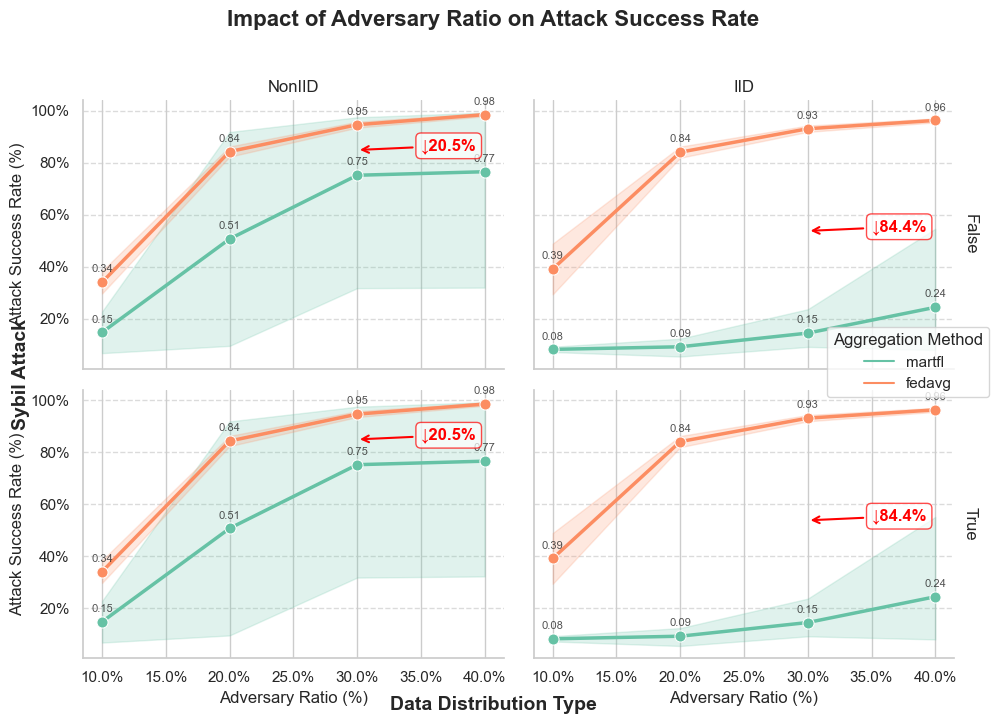

In [24]:
plot_adversary_ratio_impact(df_summary, visial_save_path)

3. Sybil vs Non-Sybil Comparison

In [20]:
def plot_sybil_comparison(results_df, save_path):
    plt.figure(figsize=(12, 6))
    
    # Create plot
    sns.barplot(
        data=results_df,
        x='AGGREGATION_METHOD',
        y='FINAL_ASR',
        hue='IS_SYBIL',
        errorbar=('ci', 95),
        palette=COLOR_PALETTE
    )
    
    # Add labels and title
    plt.xlabel('Aggregation Method')
    plt.ylabel('Final Attack Success Rate')
    plt.title('Sybil vs Non-Sybil Attack Effectiveness', fontsize=14)
    plt.ylim(0, 1)
    plt.legend(title='Sybil Attack')
    
    # Split by data distribution
    facet = sns.FacetGrid(
        results_df, 
        col='IID',
        height=4, 
        aspect=1.1
    )
    
    facet.map(
        sns.barplot, 
        'AGGREGATION_METHOD', 
        'FINAL_ASR', 
        'IS_SYBIL',
        errorbar=('ci', 95),
        palette=COLOR_PALETTE
    )
    
    facet.add_legend(title='Sybil Attack')
    facet.set_axis_labels('Aggregation Method', 'Attack Success Rate')
    facet.set_titles('Data: {col_name}')
    facet.set(ylim=(0, 1))
    
    plt.tight_layout()
    plt.savefig(f'{save_path}/sybil_comparison.png', dpi=300)
    plt.show()

C:\Users\zeyu song\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\zeyu song\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


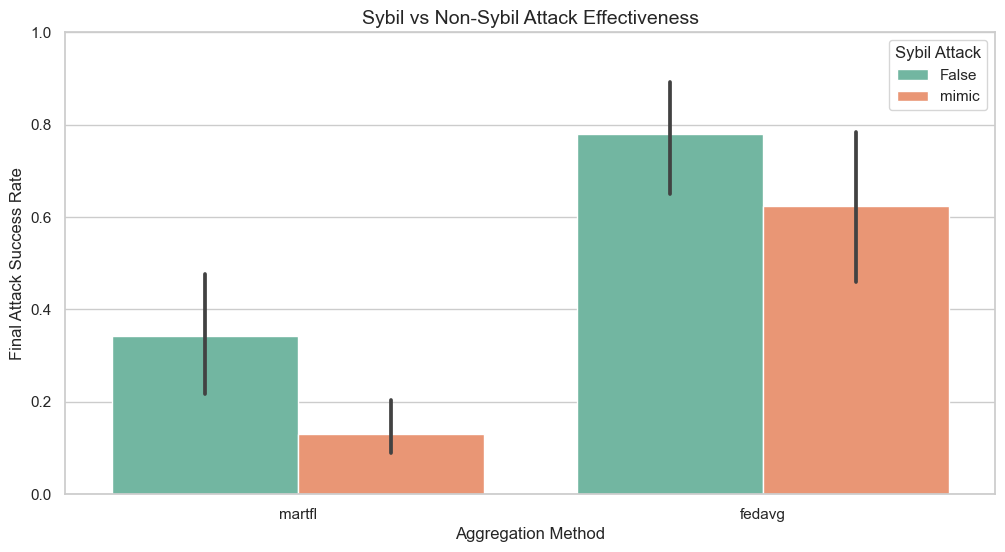

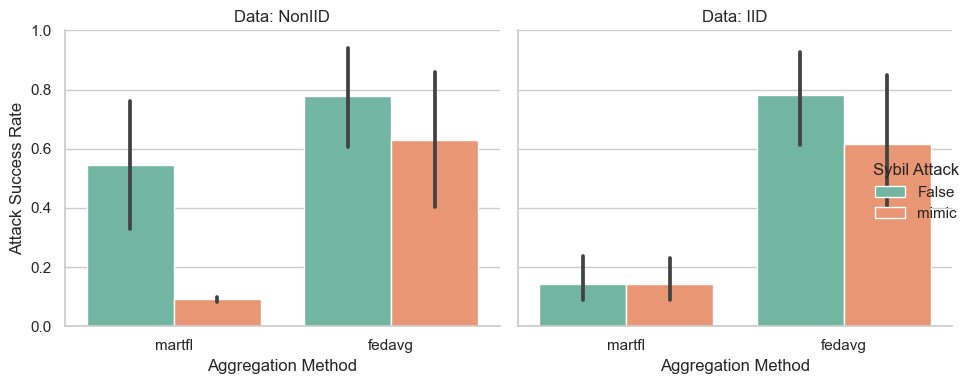

In [21]:
plot_sybil_comparison(df_summary, visial_save_path)

In [10]:
def plot_attack_efficiency(results_df, visial_save_path):
    plt.figure(figsize=(14, 6))
    
    # Create grouped boxplot
    sns.boxplot(
        data=results_df,
        x='AGGREGATION_METHOD',
        y='ASR_PER_ADV',
        hue='IS_SYBIL',
        palette=COLOR_PALETTE
    )
    
    # Add individual points
    sns.stripplot(
        data=results_df,
        x='AGGREGATION_METHOD',
        y='ASR_PER_ADV',
        hue='IS_SYBIL',
        dodge=True,
        size=4,
        color='black',
        alpha=0.4
    )
    
    # Add labels and title
    plt.xlabel('Aggregation Method')
    plt.ylabel('ASR per Adversary')
    plt.title('Attack Efficiency: ASR per Adversary', fontsize=14)
    
    # Fix legend (remove duplicate)
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[:2], labels[:2], title='Sybil Attack')
    
    plt.tight_layout()
    plt.savefig(f'{visial_save_path}/attack_efficiency.png', dpi=300)
    plt.show()

In [20]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.ticker as mtick
from scipy import stats

# Set style
sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.size': 12})
visual_save_path = "./visualization"
Path(visual_save_path).mkdir(parents=True, exist_ok=True)

# Consistent colors
COLOR_PALETTE = sns.color_palette("Set2")

def plot_attack_efficiency(results_df, save_path):
    plt.figure(figsize=(14, 6))
    
    # Create grouped boxplot with better styling
    ax = sns.boxplot(
        data=results_df,
        x='AGGREGATION_METHOD',
        y='ASR_PER_ADV',
        hue='IS_SYBIL',
        palette=COLOR_PALETTE,
        width=0.6,
        fliersize=0,  # Hide outliers (will be shown in stripplot)
        linewidth=1.2
    )
    
    # Add individual points with better styling
    sns.stripplot(
        data=results_df,
        x='AGGREGATION_METHOD',
        y='ASR_PER_ADV',
        hue='IS_SYBIL',
        dodge=True,
        size=5,
        edgecolor='gray',
        linewidth=0.5,
        alpha=0.6,
        palette=['black', 'black'],
        marker='o',
        jitter=0.2
    )
    
    # Format y-axis as percentage
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    
    # Add mean values as text above each box
    # First get positions of boxes
    num_boxes = len(results_df['AGGREGATION_METHOD'].unique()) * len(results_df['IS_SYBIL'].unique())
    positions = np.arange(num_boxes)
    box_width = 0.6
    
    # Calculate means and add text
    for i, (name, group) in enumerate(results_df.groupby(['AGGREGATION_METHOD', 'IS_SYBIL'])):
        mean_val = group['ASR_PER_ADV'].mean()
        pos = positions[i] 
        
        # Calculate position adjustment based on boxplot position
        agg_idx = list(results_df['AGGREGATION_METHOD'].unique()).index(name[0])
        sybil_idx = list(results_df['IS_SYBIL'].unique()).index(name[1])
        
        # Adjust position for the grouped boxes
        pos = agg_idx + (sybil_idx - 0.5) * (box_width / 2)
        
        plt.text(pos, mean_val + 0.03, f'μ={mean_val:.3f}', 
                ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    # Add statistical significance markers
    # Group data by aggregation method and sybil attack status
    groups = []
    for method in results_df['AGGREGATION_METHOD'].unique():
        for sybil in results_df['IS_SYBIL'].unique():
            group_data = results_df[(results_df['AGGREGATION_METHOD'] == method) & 
                                   (results_df['IS_SYBIL'] == sybil)]['ASR_PER_ADV']
            groups.append((method, sybil, group_data))
    
    # Add horizontal significance bars between relevant pairs
    y_max = results_df['ASR_PER_ADV'].max()
    y_offset = y_max * 0.05  # 5% of max for spacing
    
    # Compare same Sybil status across different aggregation methods
    for sybil in results_df['IS_SYBIL'].unique():
        methods = results_df['AGGREGATION_METHOD'].unique()
        for i in range(len(methods)-1):
            for j in range(i+1, len(methods)):
                # Get data for the pair to compare
                data1 = results_df[(results_df['AGGREGATION_METHOD'] == methods[i]) & 
                                  (results_df['IS_SYBIL'] == sybil)]['ASR_PER_ADV']
                data2 = results_df[(results_df['AGGREGATION_METHOD'] == methods[j]) & 
                                  (results_df['IS_SYBIL'] == sybil)]['ASR_PER_ADV']
                
                # Perform t-test
                t_stat, p_val = stats.ttest_ind(data1, data2, equal_var=False)
                
                # Determine significance marker
                if p_val < 0.001:
                    sig_marker = '***'
                elif p_val < 0.01:
                    sig_marker = '**'
                elif p_val < 0.05:
                    sig_marker = '*'
                else:
                    continue  # Skip if not significant
                
                # Determine positions and heights for the significance bar
                x1 = i
                x2 = j
                if sybil:
                    x1 += 0.25
                    x2 += 0.25
                else:
                    x1 -= 0.25
                    x2 -= 0.25
                
                bar_height = y_max + y_offset * (1 + (i+j) % 3)  # Stagger heights for visibility
                
                # Draw the bar and marker
                plt.plot([x1, x1, x2, x2], 
                        [bar_height-y_offset*0.5, bar_height, bar_height, bar_height-y_offset*0.5],
                        linewidth=1, color='black')
                plt.text((x1+x2)/2, bar_height+y_offset*0.1, sig_marker, ha='center', va='bottom')
    
    # Add efficiency improvement percentage for each pair
    for method in results_df['AGGREGATION_METHOD'].unique():
        # Get data for Sybil and non-Sybil for this method
        non_sybil_data = results_df[(results_df['AGGREGATION_METHOD'] == method) & 
                                  (~results_df['IS_SYBIL'])]['ASR_PER_ADV']
        sybil_data = results_df[(results_df['AGGREGATION_METHOD'] == method) & 
                               (results_df['IS_SYBIL'])]['ASR_PER_ADV']
        
        # Calculate means
        non_sybil_mean = non_sybil_data.mean()
        sybil_mean = sybil_data.mean()
        
        # Calculate relative improvement
        if non_sybil_mean > 0:  # Avoid division by zero
            rel_improvement = ((sybil_mean - non_sybil_mean) / non_sybil_mean) * 100
            
            # Get x-position
            method_idx = list(results_df['AGGREGATION_METHOD'].unique()).index(method)
            
            # Determine label color based on improvement direction
            color = 'green' if rel_improvement < 0 else 'red'
            arrow = '↓' if rel_improvement < 0 else '↑'
            
            # Add annotation
            plt.annotate(
                f"{arrow}{abs(rel_improvement):.1f}%",
                xy=(method_idx, (non_sybil_mean + sybil_mean) / 2),
                xytext=(method_idx + 0.4, (non_sybil_mean + sybil_mean) / 2),
                arrowprops=dict(arrowstyle="-|>", color=color, lw=1.5),
                color=color,
                fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.2", fc="white", ec=color, alpha=0.7)
            )
    
    # Add mean values for groups as a table
    rows = []
    for method in results_df['AGGREGATION_METHOD'].unique():
        row = [method]
        for sybil in [False, True]:
            group_data = results_df[(results_df['AGGREGATION_METHOD'] == method) & 
                                   (results_df['IS_SYBIL'] == sybil)]['ASR_PER_ADV']
            row.append(f"{group_data.mean():.3f} ± {group_data.std():.3f}")
        rows.append(row)
    
    # Create a table at the bottom of the plot
    table = plt.table(
        cellText=rows,
        colLabels=['Method', 'Non-Sybil (mean ± std)', 'Sybil (mean ± std)'],
        loc='bottom',
        cellLoc='center',
        bbox=[0, -0.35, 1, 0.2]  # [left, bottom, width, height]
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)
    
    # Adjust figure for table
    plt.subplots_adjust(bottom=0.25)
    
    # Add labels and title
    plt.xlabel('Aggregation Method', labelpad=50)  # Add padding for the table
    plt.ylabel('ASR per Adversary (%)')
    plt.title('Attack Efficiency: ASR per Adversary', fontsize=14, pad=20)
    
    # Add a subtitle explaining the metric
    plt.figtext(0.5, 0.02, 
               "ASR per Adversary measures how effective each adversarial client is.\n"
               "Lower values indicate less efficient attacks (better defense).",
               ha='center', fontsize=10, style='italic')
    
    # Fix legend (remove duplicate and improve appearance)
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[:2], ['Non-Sybil', 'Sybil'], 
               title='Attack Type', 
               frameon=True,
               edgecolor='black')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Adjust for the subtitle
    plt.savefig(f'{save_path}/attack_efficiency.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{save_path}/attack_efficiency.pdf', format='pdf', bbox_inches='tight')
    
    return plt

In [21]:
plot_attack_efficiency(df_summary, visial_save_path)

NameError: name 'plot_attack_efficiency' is not defined

5. Rounds to Reach ASR Thresholds

<module 'matplotlib.pyplot' from 'C:\\Users\\zeyu song\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

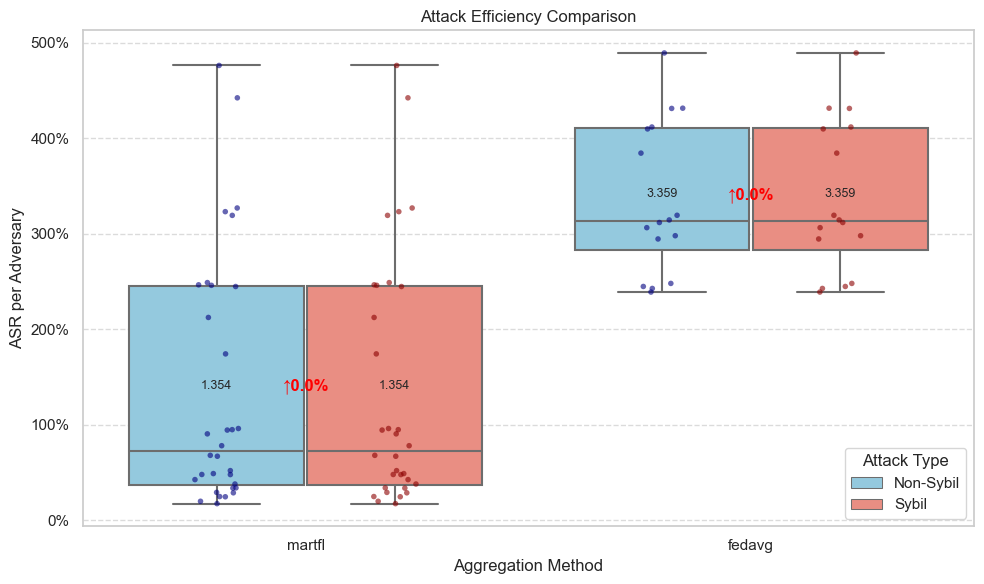

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_attack_efficiency_simple(results_df, save_path="./visualization"):
    # Set up the figure
    plt.figure(figsize=(10, 6))
    
    # Create a basic boxplot showing attack efficiency by aggregation method and IS_SYBIL
    ax = sns.boxplot(
        data=results_df,
        x='AGGREGATION_METHOD',
        y='ASR_PER_ADV',
        hue='IS_SYBIL',
        palette=['skyblue', 'salmon']
    )
    
    # Add individual data points for better visibility
    sns.stripplot(
        data=results_df,
        x='AGGREGATION_METHOD',
        y='ASR_PER_ADV',
        hue='IS_SYBIL',
        dodge=True,
        size=4,
        alpha=0.6,
        palette=['navy', 'darkred'],
        marker='o'
    )
    
    # Format y-axis as percentage
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))
    
    # Add mean values as text
    for method in results_df['AGGREGATION_METHOD'].unique():
        # Position for non-Sybil (False)
        non_sybil_mean = results_df[(results_df['AGGREGATION_METHOD'] == method) & 
                                   (~results_df['IS_SYBIL'])]['ASR_PER_ADV'].mean()
        
        # Position for Sybil (True)
        sybil_mean = results_df[(results_df['AGGREGATION_METHOD'] == method) & 
                               (results_df['IS_SYBIL'])]['ASR_PER_ADV'].mean()
        
        # Method index
        method_idx = list(results_df['AGGREGATION_METHOD'].unique()).index(method)
        
        # Add text for non-Sybil mean
        plt.text(method_idx-0.2, non_sybil_mean+0.02, f'{non_sybil_mean:.3f}', 
                ha='center', fontsize=9)
        
        # Add text for Sybil mean
        plt.text(method_idx+0.2, sybil_mean+0.02, f'{sybil_mean:.3f}', 
                ha='center', fontsize=9)
        
        # Calculate percent difference
        if non_sybil_mean > 0:
            percent_diff = ((sybil_mean - non_sybil_mean) / non_sybil_mean) * 100
            direction = '↓' if percent_diff < 0 else '↑'
            color = 'green' if percent_diff < 0 else 'red'
            
            # Add percent difference
            plt.text(method_idx, (non_sybil_mean + sybil_mean)/2, 
                    f"{direction}{abs(percent_diff):.1f}%", 
                    ha='center', color=color, fontweight='bold')
    
    # Add labels and title
    plt.xlabel('Aggregation Method')
    plt.ylabel('ASR per Adversary')
    plt.title('Attack Efficiency Comparison')
    
    # Fix legend
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[:2], ['Non-Sybil', 'Sybil'], title='Attack Type')
    
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Save figure
    plt.savefig(f'{save_path}/attack_efficiency_simple.png', dpi=300)
    
    return plt
plot_attack_efficiency_simple(df_summary, save_path)
# Example usage
# plot_attack_efficiency_simple(your_dataframe)

In [22]:
def plot_rounds_to_threshold(results_df,visial_save_path):
    # Replace -1 (never reached) with max rounds + some padding for visualization
    max_rounds = results_df['TOTAL_ROUNDS'].max()
    results_df_plot = results_df.copy()
    
    for col in ['ROUNDS_TO_50PCT_ASR', 'ROUNDS_TO_75PCT_ASR', 'ROUNDS_TO_90PCT_ASR']:
        results_df_plot[col] = results_df_plot[col].replace(-1, max_rounds * 1.2)
    
    # Melt the dataframe for easier plotting
    plot_df = pd.melt(
        results_df_plot, 
        id_vars=['AGGREGATION_METHOD', 'IS_SYBIL', 'IID', 'ADV_RATE'],
        value_vars=['ROUNDS_TO_50PCT_ASR', 'ROUNDS_TO_75PCT_ASR', 'ROUNDS_TO_90PCT_ASR'],
        var_name='Threshold', 
        value_name='Rounds'
    )
    
    # Map threshold names to more readable labels
    threshold_mapping = {
        'ROUNDS_TO_50PCT_ASR': '50% ASR', 
        'ROUNDS_TO_75PCT_ASR': '75% ASR', 
        'ROUNDS_TO_90PCT_ASR': '90% ASR'
    }
    plot_df['Threshold'] = plot_df['Threshold'].map(threshold_mapping)
    
    # Create plot
    plt.figure(figsize=(16, 8))
    g = sns.FacetGrid(
        plot_df, 
        col='IID',
        row='IS_SYBIL',
        height=3.5, 
        aspect=1.2
    )
    
    g.map_dataframe(
        sns.barplot, 
        x='Threshold', 
        y='Rounds', 
        hue='AGGREGATION_METHOD',
        palette=COLOR_PALETTE
    )
    
    g.set_axis_labels('ASR Threshold', 'Training Rounds')
    g.set_titles('Data: {col_name} | Sybil: {row_name}')
    g.add_legend(title='Aggregation Method')
    
    # Add a horizontal line at max_rounds
    for ax in g.axes.flat:
        ax.axhline(y=max_rounds, color='red', linestyle='--', alpha=0.5)
        ax.text(
            0.5, max_rounds + 1, 
            'Never Reached', 
            color='red', alpha=0.7, 
            ha='center'
        )
    
    plt.tight_layout()
    plt.savefig(f'{visial_save_path}/rounds_to_threshold.png', dpi=300)
    plt.show()

C:\Users\pc\Desktop\code\poison_data_valuation\venv_310\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  func(*plot_args, **plot_kwargs)
C:\Users\pc\Desktop\code\poison_data_valuation\venv_310\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  func(*plot_args, **plot_kwargs)
C:\Users\pc\Desktop\code\poison_data_valuation\venv_310\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  func(*plot_args, **plot_kwargs)
C:\Users\pc\Desktop\code\poison_data_valuation\venv_310\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  func(*plot_args, **plot_kwargs)


<Figure size 1600x800 with 0 Axes>

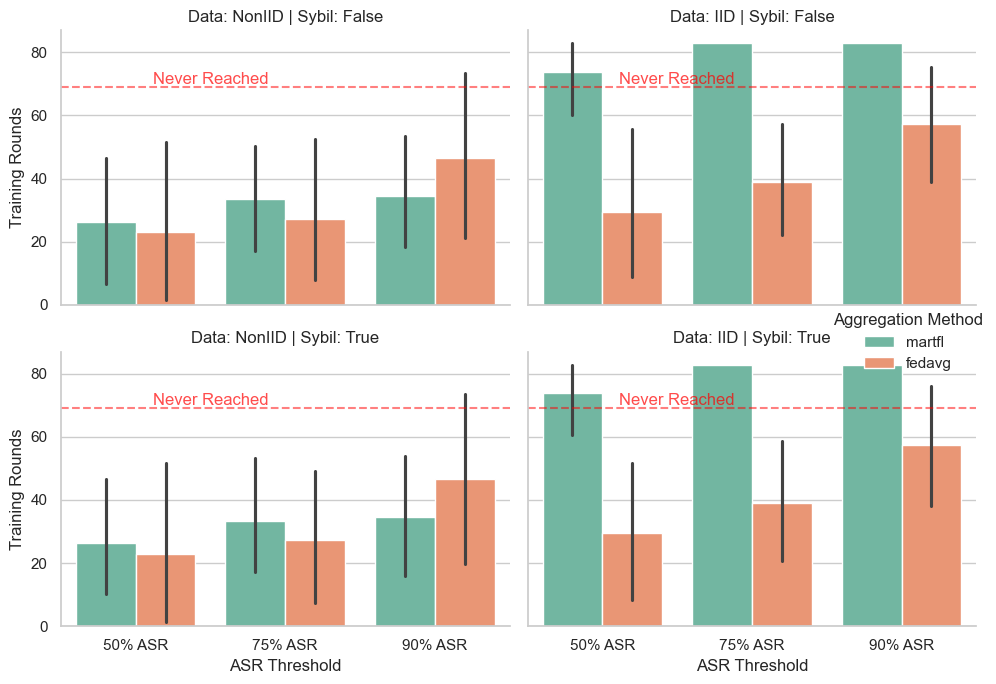

In [13]:
plot_rounds_to_threshold(df_summary,visial_save_path)

6. Stealth vs Effectiveness Trade-off

In [14]:
def plot_stealth_vs_effectiveness(results_df,visial_save_path):
    plt.figure(figsize=(10, 8))
    
    # Create scatterplot
    g = sns.scatterplot(
        data=results_df,
        x='STEALTH',
        y='FINAL_ASR',
        hue='AGGREGATION_METHOD',
        style='IS_SYBIL',
        size='ADV_RATE',
        sizes=(50, 200),
        alpha=0.7,
        palette=COLOR_PALETTE
    )
    
    # Add labels and title
    plt.xlabel('Stealth (1 - |Accuracy Difference|)')
    plt.ylabel('Attack Success Rate')
    plt.title('Stealth vs Effectiveness Trade-off', fontsize=14)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    
    # Add grid
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add reference lines
    plt.axhline(y=0.5, color='gray', linestyle=':', alpha=0.5)
    plt.axvline(x=0.8, color='gray', linestyle=':', alpha=0.5)
    
    # Add reference regions
    plt.text(0.05, 0.95, "Detected\nIneffective", ha='left', alpha=0.7)
    plt.text(0.85, 0.95, "Stealthy\nEffective", ha='right', alpha=0.7)
    
    plt.tight_layout()
    plt.savefig(f'{visial_save_path}/stealth_vs_effectiveness.png', dpi=300)
    plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_12224\2241765772.py:5: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g = sns.scatterplot(


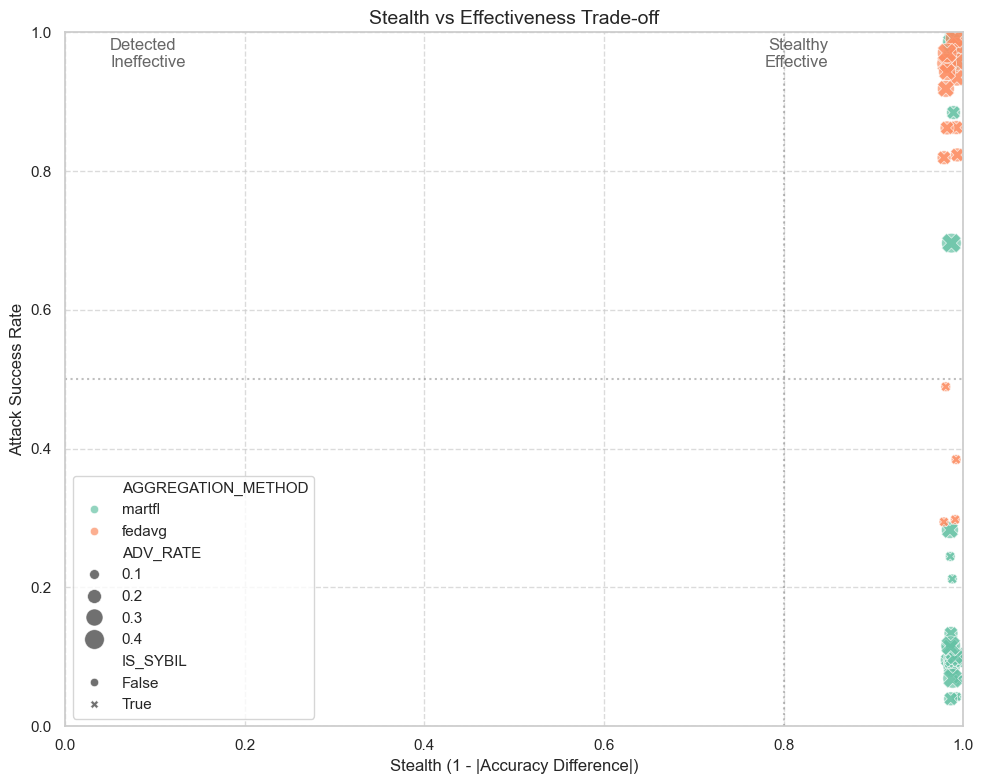

In [15]:
plot_stealth_vs_effectiveness(df_summary,visial_save_path)

7. Clean Accuracy Impact

In [23]:
def plot_clean_accuracy_impact(results_df,visial_save_path):
    plt.figure(figsize=(12, 6))
    
    # Create plot
    sns.boxplot(
        data=results_df,
        x='AGGREGATION_METHOD',
        y='FINAL_CLEAN_ACC',
        hue='IS_SYBIL',
        palette=COLOR_PALETTE
    )
    
    # Add labels and title
    plt.xlabel('Aggregation Method')
    plt.ylabel('Final Clean Accuracy')
    plt.title('Impact on Clean Accuracy', fontsize=14)
    
    # Set y-axis limits appropriate for accuracy
    plt.ylim(0, 1)
    
    # Add horizontal line for reference accuracy (you'll need to determine this value)
    # plt.axhline(y=reference_accuracy, color='red', linestyle='--', label='No Attack Reference')
    
    plt.legend(title='Sybil Attack')
    plt.tight_layout()
    plt.savefig(f'{visial_save_path}/clean_accuracy_impact.png', dpi=300)
    plt.show()

In [41]:
def plot_clean_accuracy_impact(results_df, save_path, reference_accuracy=0.9):
    plt.figure(figsize=(12, 6))
    
    # Create plot
    ax = sns.boxplot(
        data=results_df,
        x='AGGREGATION_METHOD',
        y='FINAL_CLEAN_ACC',
        hue='IS_SYBIL',
        palette=COLOR_PALETTE
    )
    
    # Format y-axis as percentage
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    
    # Add labels and title
    plt.xlabel('Aggregation Method')
    plt.ylabel('Final Clean Accuracy (%)')
    plt.title('Impact on Clean Accuracy', fontsize=14)
    
    # Set y-axis limits appropriate for accuracy
    # Start from 0.7 to better show differences in the relevant range
    plt.ylim(0.7, 1)
    
    # Add horizontal line for reference accuracy
    plt.axhline(y=reference_accuracy, color='red', linestyle='--', 
               label='No Attack Reference (90%)')
    
    # Add mean values on top of each box
    for i, method in enumerate(results_df['AGGREGATION_METHOD'].unique()):
        for j, sybil in enumerate([False, True]):
            # Get the subset of data
            subset = results_df[(results_df['AGGREGATION_METHOD'] == method) & 
                               (results_df['IS_SYBIL'] == sybil)]
            
            # Calculate mean
            mean_acc = subset['FINAL_CLEAN_ACC'].mean()
            
            # Position for the text (adjusted for hue)
            pos = i + (j-0.5)*0.35
            
            # Add text with accuracy value
            plt.text(pos, mean_acc + 0.02, f'{mean_acc:.3f}', 
                    ha='center', va='bottom', fontsize=10)
    
    # Fix legend to correctly use the color palette
    handles, labels = ax.get_legend_handles_labels()
    
    # Create a proper legend with the correct colors
    plt.legend(handles[:2], ['Non-Sybil', 'Sybil'], title='Sybil Attack')
    
    plt.tight_layout()
    plt.savefig(f'{save_path}/clean_accuracy_impact.png', dpi=300)
    
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\zeyu song\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

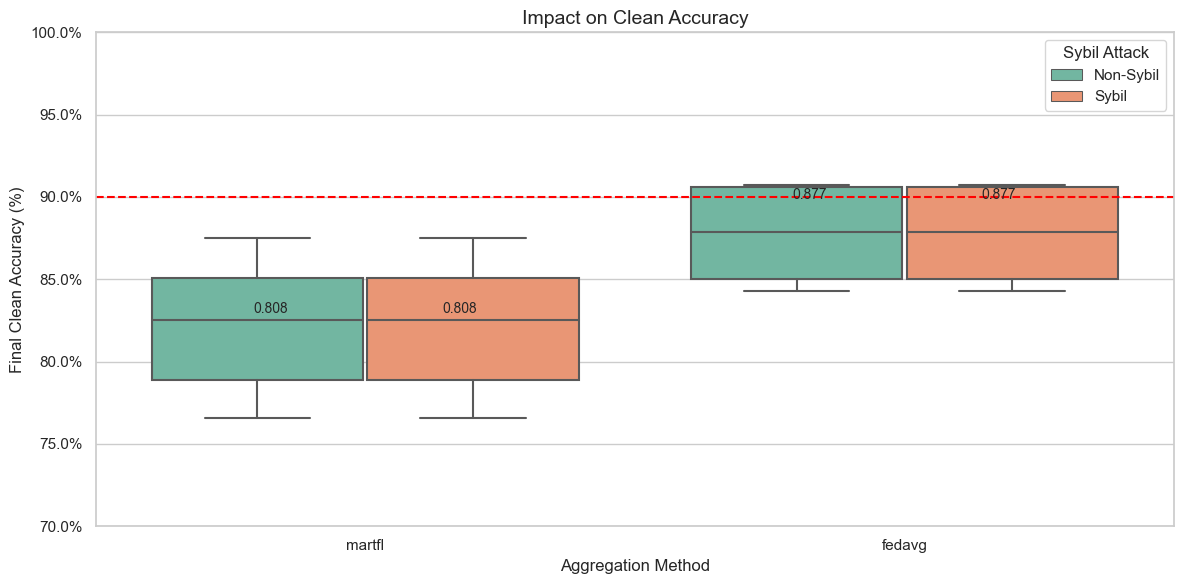

In [42]:
plot_clean_accuracy_impact(df_summary,save_path)

8. Selection Rate Analysis (MaRTFL specific)

In [31]:
def plot_selection_rates(results_df,visial_save_path):
    # Filter for only MaRTFL results
    martfl_df = results_df[results_df['AGGREGATION_METHOD'] == 'martfl']
    
    plt.figure(figsize=(12, 10))
    
    # Create the scatter plot
    g = sns.FacetGrid(
        martfl_df, 
        col='IID',
        row='IS_SYBIL',
        height=4, 
        aspect=1.1
    )
    
    g.map_dataframe(
        sns.scatterplot,
        x='AVG_BENIGN_RATE',
        y='AVG_MALICIOUS_RATE',
        hue='ADV_RATE',
        size='TRIGGER_RATE',
        sizes=(50, 200),
        palette='viridis'
    )
    
    # Add the diagonal reference line (equal selection rates)
    for ax in g.axes.flat:
        lims = [
            min(ax.get_xlim()[0], ax.get_ylim()[0]),
            max(ax.get_xlim()[1], ax.get_ylim()[1])
        ]
        ax.plot(lims, lims, 'r--', alpha=0.5, zorder=0)
        ax.set_aspect('equal')
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
    
    g.set_axis_labels('Average Benign Selection Rate', 'Average Malicious Selection Rate')
    g.set_titles('Data: {col_name} | Sybil: {row_name}')
    g.add_legend(title='Adversary Rate')
    
    plt.tight_layout()
    plt.savefig(f'{visial_save_path}/selection_rates.png', dpi=300)
    plt.show()

<Figure size 1200x1000 with 0 Axes>

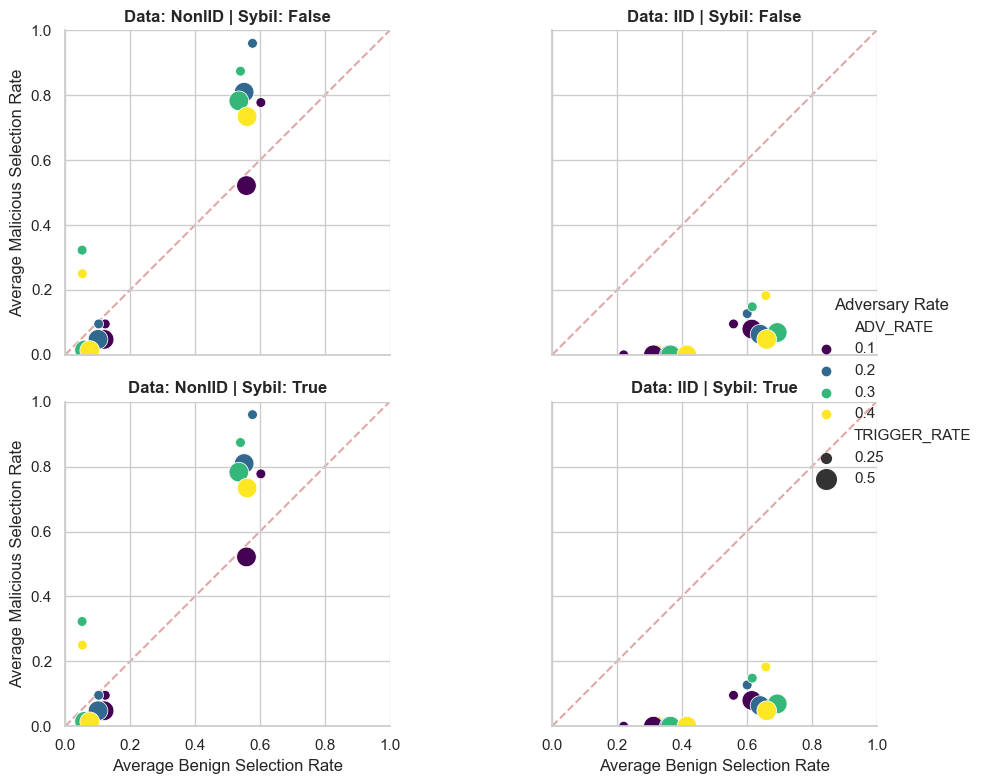

In [32]:
plot_selection_rates(df_summary,visial_save_path)

In [31]:
def plot_selection_rate_over_time(round_data_df,visial_save_path):
    # This requires the round-by-round data, not the summary statistics
    # Assuming 'round_data_df' has columns: round, malicious_rate, benign_rate, AGGREGATION_METHOD, etc.
    
    # Filter for only MaRTFL and combine similar configurations
    martfl_df = round_data_df[round_data_df['AGGREGATION_METHOD'] == 'martfl']
    
    plt.figure(figsize=(15, 10))
    
    g = sns.FacetGrid(
        martfl_df, 
        col='IID',
        row='IS_SYBIL',
        hue='ADV_RATE',
        height=4, 
        aspect=1.3,
        sharey=True
    )
    
    g.map_dataframe(
        sns.lineplot, 
        x='round', 
        y='malicious_rate',
        palette='viridis'
    )
    
    g.set_titles('Data: {col_name} | Sybil: {row_name}')
    g.set_axis_labels('Training Round', 'Malicious Client Selection Rate')
    g.add_legend(title='Adversary Rate')
    g.set(ylim=(0, 1))
    
    plt.tight_layout()
    plt.savefig(f'{visial_save_path}/selection_rate_over_time.png', dpi=300)
    plt.show()

trigger rate impact

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def plot_trigger_rate_impact(results_df, output_dir="./visualizations", 
                            color_palette="viridis", filename="trigger_rate_impact"):
    """
    Create an enhanced visualization of trigger rate impact on attack success rate,
    separated by aggregation method, adversary rate, and IID/non-IID settings.
    
    Args:
        results_df: DataFrame containing the results
        output_dir: Directory to save the output visualization
        color_palette: Color palette to use for the plot
        filename: Base filename for the saved figure
    """
    import os
    os.makedirs(output_dir, exist_ok=True)
    
    # Verify required columns exist
    required_cols = ['ADV_RATE', 'FINAL_ASR', 'TRIGGER_RATE', 'AGGREGATION_METHOD', 'IID']
    missing_cols = [col for col in required_cols if col not in results_df.columns]
    if missing_cols:
        raise ValueError(f"Missing required columns: {missing_cols}")
    
    # Create figure with appropriate size
    plt.figure(figsize=(16, 10))
    
    # Create plot with improved aesthetics
    g = sns.catplot(
        data=results_df, 
        x='ADV_RATE', 
        y='FINAL_ASR',
        hue='TRIGGER_RATE',
        col='AGGREGATION_METHOD',
        row='IID',
        kind='bar',
        height=4.5,
        aspect=1.2,
        palette=color_palette,
        errwidth=1.5,
        capsize=0.05,
        legend_out=False,
        dodge=True
    )
    
    # Enhance labels and titles
    g.set_axis_labels('Adversary Rate', 'Attack Success Rate (ASR)')
    
    # Improve subplot titles with clearer labeling
    g.set_titles('{row_name} Distribution | {col_name}')
    
    # Replace boolean values with readable strings in row titles if needed
    if all(isinstance(x, bool) for x in results_df['IID'].unique()):
        row_titles = {True: 'IID', False: 'Non-IID'}
        for ax, row_val in zip(g.axes, g._row_var.categories):
            for col_idx in range(len(g.axes[0])):
                title = ax[col_idx].get_title()
                ax[col_idx].set_title(title.replace(str(row_val), row_titles.get(row_val, str(row_val))))
                
    # Customize appearance
    g.set(ylim=(0, 1.05))  # Add a bit of padding above 1.0
    
    # Add horizontal grid lines for better readability
    for ax_row in g.axes:
        for ax in ax_row:
            ax.grid(axis='y', linestyle='--', alpha=0.7)
            
            # Add value annotations on bars
            for p in ax.patches:
                height = p.get_height()
                if not np.isnan(height):  # Skip annotation if height is NaN
                    ax.text(
                        p.get_x() + p.get_width()/2,
                        height + 0.02,
                        f'{height:.2f}',
                        ha='center',
                        fontsize=9,
                        fontweight='bold'
                    )
    
    # Add a more descriptive legend
    g.add_legend(title='Trigger Rate', frameon=True)
    
    # Add an overall title
    g.fig.suptitle('Impact of Trigger Rate on Attack Success Rate', 
                   fontsize=16, fontweight='bold', y=1.02)
    
    # Add footer with summary statistics
    # Calculate mean ASR by trigger rate
    summary_stats = results_df.groupby('TRIGGER_RATE')['FINAL_ASR'].mean().round(3)
    stats_text = "Average ASR by Trigger Rate: " + ", ".join([f"{rate}: {asr}" for rate, asr in summary_stats.items()])
    plt.figtext(0.5, -0.02, stats_text, ha='center', fontsize=10, 
                bbox=dict(facecolor='lightyellow', alpha=0.5, boxstyle='round,pad=0.5'))
                
    # Customize spacing
    plt.tight_layout()
    
    # Save with high resolution and in multiple formats
    plot_path = os.path.join(output_dir, f"{filename}.png")
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    plt.savefig(os.path.join(output_dir, f"{filename}.pdf"), format='pdf', bbox_inches='tight')
    
    print(f"Plot saved to {plot_path}")
    plt.show()
    
    # Generate a secondary plot focusing on the difference between trigger rates
    plt.figure(figsize=(10, 6))
    
    # Pivot data to analyze trigger rate effect
    pivot_columns = ['AGGREGATION_METHOD', 'ADV_RATE', 'IID']
    if set(pivot_columns).issubset(results_df.columns):
        try:
            # Group by all factors except trigger rate
            grouped = results_df.groupby(pivot_columns + ['TRIGGER_RATE'])['FINAL_ASR'].mean().reset_index()
            
            # For trigger rates that appear multiple times, compute spread
            trigger_rates = sorted(grouped['TRIGGER_RATE'].unique())
            if len(trigger_rates) > 1:
                # Get min and max trigger rates
                min_rate = min(trigger_rates)
                max_rate = max(trigger_rates)
                
                # Create a new DataFrame to analyze the difference
                agg_data = []
                for _, group in grouped.groupby(pivot_columns):
                    min_asr = group[group['TRIGGER_RATE'] == min_rate]['FINAL_ASR'].values[0]
                    max_asr = group[group['TRIGGER_RATE'] == max_rate]['FINAL_ASR'].values[0]
                    
                    # Extract group info
                    group_dict = {col: group[col].iloc[0] for col in pivot_columns}
                    
                    agg_data.append({
                        **group_dict,
                        'ASR_Difference': max_asr - min_asr,
                        'Relative_Improvement': (max_asr - min_asr) / min_asr if min_asr > 0 else np.nan
                    })
                
                diff_df = pd.DataFrame(agg_data)
                
                # Plot the difference
                sns.barplot(
                    data=diff_df,
                    x='ADV_RATE',
                    y='ASR_Difference',
                    hue='AGGREGATION_METHOD',
                    palette=color_palette
                )
                
                plt.title(f'ASR Improvement: Trigger Rate {min_rate} → {max_rate}', fontsize=14)
                plt.xlabel('Adversary Rate')
                plt.ylabel('ASR Improvement (absolute)')
                plt.grid(axis='y', linestyle='--', alpha=0.7)
                plt.legend(title='Aggregation Method')
                
                # Save this additional analysis
                diff_path = os.path.join(output_dir, f"{filename}_difference.png")
                plt.tight_layout()
                plt.savefig(diff_path, dpi=300)
                print(f"Difference analysis saved to {diff_path}")
        except Exception as e:
            print(f"Could not generate difference analysis: {e}")
    
    return g  # Return the figure for further customization if needed

Plot saved to result_csv_226/visualization\trigger_rate_impact.png


<Figure size 1600x1000 with 0 Axes>

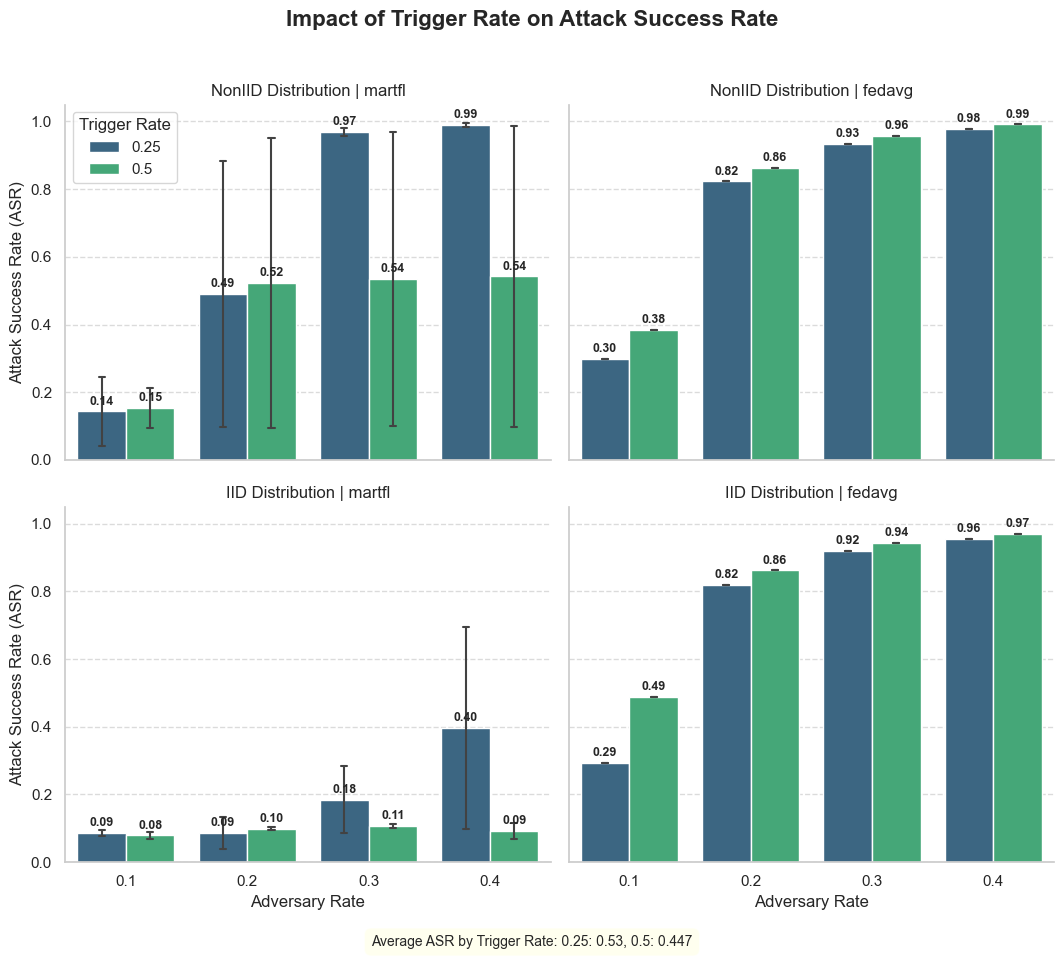

Difference analysis saved to result_csv_226/visualization\trigger_rate_impact_difference.png


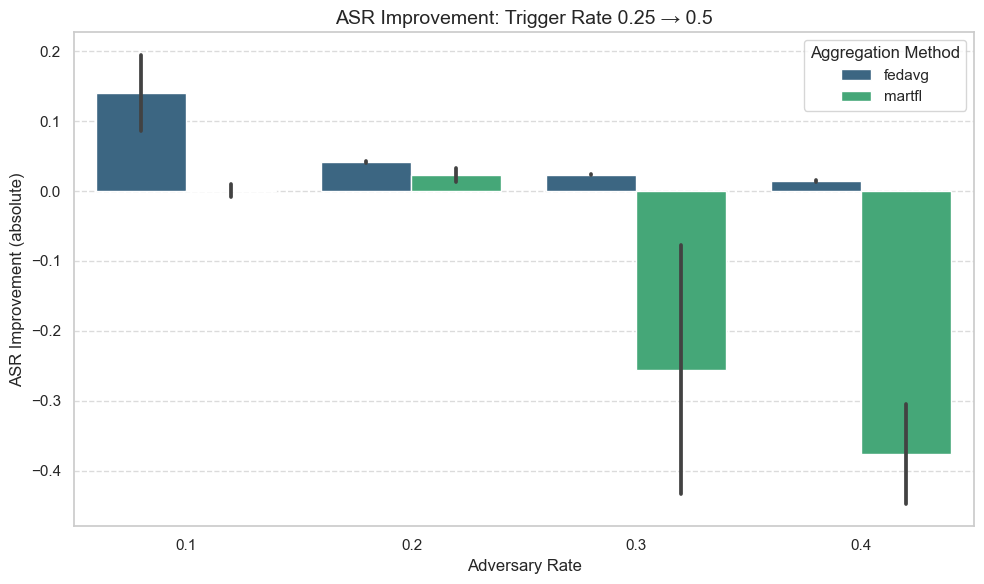

In [28]:
plot_trigger_rate_impact(results_df=df_summary, output_dir=save_path)

In [35]:
def create_analysis_dashboard(results_df, visial_save_path):
    # Create a comprehensive figure with multiple subplots
    fig = plt.figure(figsize=(22, 16))
    fig.suptitle('Backdoor Attack Analysis Dashboard', fontsize=20, y=0.98)
    
    # Define grid layout
    gs = plt.GridSpec(3, 3, figure=fig, hspace=0.4, wspace=0.3)
    
    # 1. Defense comparison (top left)
    ax1 = fig.add_subplot(gs[0, 0])
    sns.barplot(
        data=results_df, 
        x='AGGREGATION_METHOD', 
        y='FINAL_ASR',
        hue='DATA_SPLIT_MODE',
        errorbar=('ci', 95),
        palette=COLOR_PALETTE,
        ax=ax1
    )
    ax1.set_title('Defense Effectiveness')
    ax1.set_ylim(0, 1)
    ax1.set_xlabel('')
    ax1.legend(title='Data')
    
    # 2. Adversary ratio impact (top middle)
    ax2 = fig.add_subplot(gs[0, 1])
    sns.lineplot(
        data=results_df, 
        x='ADV_RATE', 
        y='FINAL_ASR',
        hue='AGGREGATION_METHOD',
        style='DATA_SPLIT_MODE',
        markers=True,
        palette=COLOR_PALETTE,
        ax=ax2
    )
    ax2.set_title('Impact of Adversary Ratio')
    ax2.set_ylim(0, 1)
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    # 3. Sybil comparison (top right)
    ax3 = fig.add_subplot(gs[0, 2])
    sns.barplot(
        data=results_df, 
        x='IS_SYBIL', 
        y='FINAL_ASR',
        hue='AGGREGATION_METHOD',
        errorbar=('ci', 95),
        palette=COLOR_PALETTE,
        ax=ax3
    )
    ax3.set_title('Sybil vs Non-Sybil')
    ax3.set_ylim(0, 1)
    ax3.set_xlabel('Sybil Attack')
    
    # 4. Attack efficiency (middle left)
    ax4 = fig.add_subplot(gs[1, 0])
    sns.boxplot(
        data=results_df,
        x='AGGREGATION_METHOD',
        y='ASR_PER_ADV',
        hue='IS_SYBIL',
        palette=COLOR_PALETTE,
        ax=ax4
    )
    ax4.set_title('Attack Efficiency')
    ax4.set_xlabel('')
    
    # 5. Stealth vs effectiveness (middle middle)
    ax5 = fig.add_subplot(gs[1, 1])
    sns.scatterplot(
        data=results_df,
        x='STEALTH',
        y='FINAL_ASR',
        hue='AGGREGATION_METHOD',
        style='IS_SYBIL',
        size='ADV_RATE',
        sizes=(50, 200),
        alpha=0.7,
        palette=COLOR_PALETTE,
        ax=ax5
    )
    ax5.set_title('Stealth vs Effectiveness')
    ax5.set_xlim(0, 1)
    ax5.set_ylim(0, 1)
    ax5.grid(True, linestyle='--', alpha=0.7)
    
    # 6. Clean accuracy impact (middle right)
    ax6 = fig.add_subplot(gs[1, 2])
    sns.boxplot(
        data=results_df,
        x='AGGREGATION_METHOD',
        y='FINAL_CLEAN_ACC',
        hue='IS_SYBIL',
        palette=COLOR_PALETTE,
        ax=ax6
    )
    ax6.set_title('Impact on Clean Accuracy')
    ax6.set_ylim(0, 1)
    ax6.set_xlabel('')
    
    # 7. Trigger rate impact (bottom left)
    ax7 = fig.add_subplot(gs[2, 0])
    sns.barplot(
        data=results_df, 
        x='TRIGGER_RATE', 
        y='FINAL_ASR',
        hue='AGGREGATION_METHOD',
        errorbar=('ci', 95),
        palette=COLOR_PALETTE,
        ax=ax7
    )
    ax7.set_title('Impact of Trigger Rate')
    ax7.set_ylim(0, 1)
    
    # 8. Data distribution impact (bottom middle)
    ax8 = fig.add_subplot(gs[2, 1])
    sns.barplot(
        data=results_df, 
        x='DATA_SPLIT_MODE', 
        y='FINAL_ASR',
        hue='AGGREGATION_METHOD',
        errorbar=('ci', 95),
        palette=COLOR_PALETTE,
        ax=ax8
    )
    ax8.set_title('Impact of Data Distribution')
    ax8.set_ylim(0, 1)
    ax8.set_xlabel('Data Distribution')
    
    # 9. Summary metrics (bottom right)
    ax9 = fig.add_subplot(gs[2, 2])
    martfl_improvement = (results_df[results_df['AGGREGATION_METHOD'] == 'fedavg']['FINAL_ASR'].mean() - 
                         results_df[results_df['AGGREGATION_METHOD'] == 'martfl']['FINAL_ASR'].mean())
    
    textstr = '\n'.join((
        'Summary Metrics:',
        f'Average FedAvg ASR: {results_df[results_df["AGGREGATION_METHOD"] == "fedavg"]["FINAL_ASR"].mean():.2f}',
        f'Average MaRTFL ASR: {results_df[results_df["AGGREGATION_METHOD"] == "martfl"]["FINAL_ASR"].mean():.2f}',
        f'Defense Improvement: {martfl_improvement:.2f}',
        f'Best Attack Config: {results_df.loc[results_df["FINAL_ASR"].idxmax()]["AGGREGATION_METHOD"]} with ' +
        f'adv_rate={results_df.loc[results_df["FINAL_ASR"].idxmax()]["ADV_RATE"]} ' +
        f'(ASR={results_df["FINAL_ASR"].max():.2f})'
    ))
    
    ax9.text(0.5, 0.5, textstr, transform=ax9.transAxes, fontsize=12,
             verticalalignment='center', horizontalalignment='center', 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    ax9.set_title('Key Findings')
    ax9.axis('off')
    
    plt.savefig(f'{visial_save_path}/attack_analysis_dashboard.png', dpi=300, bbox_inches='tight')
    plt.show()

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

def visualize_martfl_selection_rates(df, output_dir='./selection_visualizations'):
    """
    Visualize the comparison of malicious and benign client selection rates for martfl.
    
    Args:
        df_path: Path to the summary DataFrame CSV file
        output_dir: Directory to save the visualizations
    """
    # Create output directory
    os.makedirs(output_dir, exist_ok=True)
    
    # Load the data    
    # Filter to martfl aggregation method
    martfl_df = df[df['AGGREGATION_METHOD'] == 'martfl'].copy()
    
    # Convert boolean columns if necessary
    if 'IS_SYBIL' in martfl_df.columns and martfl_df['IS_SYBIL'].dtype != bool:
        martfl_df['IS_SYBIL'] = martfl_df['IS_SYBIL'].astype(bool)
    
    if 'IID' in martfl_df.columns and martfl_df['IID'].dtype != bool:
        martfl_df['IID'] = martfl_df['IID'].astype(bool)
    
    print(f"Analyzing {len(martfl_df)} MARTFL experiments")
    
    # 1. Overall comparison of malicious vs. benign selection rates
    plt.figure(figsize=(10, 6))
    
    # Create data for the plot
    selection_data = pd.DataFrame({
        'Client Type': ['Malicious', 'Benign'],
        'Selection Rate': [
            martfl_df['AVG_MALICIOUS_RATE'].mean(),
            martfl_df['AVG_BENIGN_RATE'].mean()
        ],
        'Std Dev': [
            martfl_df['AVG_MALICIOUS_RATE'].std(),
            martfl_df['AVG_BENIGN_RATE'].std()
        ]
    })
    
    # Create bar plot
    ax = sns.barplot(
        x='Client Type',
        y='Selection Rate',
        data=selection_data,
        palette=['red', 'blue']
    )
    
    # Add error bars
    plt.errorbar(
        x=range(len(selection_data)),
        y=selection_data['Selection Rate'],
        yerr=selection_data['Std Dev'],
        fmt='none',
        color='black',
        capsize=6
    )
    
    # Add value labels on bars
    for i, v in enumerate(selection_data['Selection Rate']):
        ax.text(i, v + 0.01, f"{v:.3f}", ha='center', fontsize=12)
    
    plt.title('MARTFL: Client Selection Rate Comparison', fontsize=16)
    plt.ylabel('Average Selection Rate', fontsize=14)
    plt.ylim(0, 1.0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.savefig(f"{output_dir}/martfl_client_selection_comparison.png", dpi=300)
    plt.close()
    
    # 2. Selection Rate by IID/Non-IID (if available)
    if 'IID' in martfl_df.columns and len(martfl_df['IID'].unique()) > 1:
        plt.figure(figsize=(12, 8))
        
        # Prepare data
        iid_data = []
        for iid_val in [True, False]:
            subset = martfl_df[martfl_df['IID'] == iid_val]
            if not subset.empty:
                iid_data.append({
                    'IID': 'IID' if iid_val else 'Non-IID',
                    'Malicious Rate': subset['AVG_MALICIOUS_RATE'].mean(),
                    'Malicious Std': subset['AVG_MALICIOUS_RATE'].std(),
                    'Benign Rate': subset['AVG_BENIGN_RATE'].mean(),
                    'Benign Std': subset['AVG_BENIGN_RATE'].std(),
                })
        
        if iid_data:
            iid_df = pd.DataFrame(iid_data)
            
            # Set up bar positions
            bar_width = 0.35
            r1 = np.arange(len(iid_df))
            r2 = [x + bar_width for x in r1]
            
            # Create bars
            plt.bar(
                r1, 
                iid_df['Malicious Rate'], 
                width=bar_width, 
                yerr=iid_df['Malicious Std'],
                color='red', 
                label='Malicious',
                capsize=7
            )
            plt.bar(
                r2, 
                iid_df['Benign Rate'], 
                width=bar_width, 
                yerr=iid_df['Benign Std'],
                color='blue', 
                label='Benign',
                capsize=7
            )
            
            # Add value labels
            for i, val in enumerate(iid_df['Malicious Rate']):
                plt.text(r1[i], val + 0.02, f"{val:.3f}", ha='center', fontsize=11)
            
            for i, val in enumerate(iid_df['Benign Rate']):
                plt.text(r2[i], val + 0.02, f"{val:.3f}", ha='center', fontsize=11)
            
            plt.xlabel('Data Distribution', fontsize=14)
            plt.ylabel('Selection Rate', fontsize=14)
            plt.title('MARTFL: Selection Rate by Data Distribution', fontsize=16)
            plt.xticks([r + bar_width/2 for r in range(len(iid_df))], iid_df['IID'])
            plt.ylim(0, 1.0)
            plt.legend()
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            
            plt.tight_layout()
            plt.savefig(f"{output_dir}/martfl_selection_by_distribution.png", dpi=300)
            plt.close()
    
    # 3. Selection Rate by Gradient Mode
    if 'GRAD_MODE' in martfl_df.columns and len(martfl_df['GRAD_MODE'].unique()) > 1:
        plt.figure(figsize=(12, 8))
        
        # Prepare data
        grad_data = []
        for grad_mode in martfl_df['GRAD_MODE'].unique():
            subset = martfl_df[martfl_df['GRAD_MODE'] == grad_mode]
            if not subset.empty:
                grad_data.append({
                    'GRAD_MODE': grad_mode,
                    'Malicious Rate': subset['AVG_MALICIOUS_RATE'].mean(),
                    'Malicious Std': subset['AVG_MALICIOUS_RATE'].std(),
                    'Benign Rate': subset['AVG_BENIGN_RATE'].mean(),
                    'Benign Std': subset['AVG_BENIGN_RATE'].std(),
                })
        
        grad_df = pd.DataFrame(grad_data)
        
        # Set up bar positions
        bar_width = 0.35
        r1 = np.arange(len(grad_df))
        r2 = [x + bar_width for x in r1]
        
        # Create bars
        plt.bar(
            r1, 
            grad_df['Malicious Rate'], 
            width=bar_width, 
            yerr=grad_df['Malicious Std'],
            color='red', 
            label='Malicious',
            capsize=7
        )
        plt.bar(
            r2, 
            grad_df['Benign Rate'], 
            width=bar_width, 
            yerr=grad_df['Benign Std'],
            color='blue', 
            label='Benign',
            capsize=7
        )
        
        # Add value labels
        for i, val in enumerate(grad_df['Malicious Rate']):
            plt.text(r1[i], val + 0.02, f"{val:.3f}", ha='center', fontsize=11)
        
        for i, val in enumerate(grad_df['Benign Rate']):
            plt.text(r2[i], val + 0.02, f"{val:.3f}", ha='center', fontsize=11)
        
        plt.xlabel('Gradient Mode', fontsize=14)
        plt.ylabel('Selection Rate', fontsize=14)
        plt.title('MARTFL: Selection Rate by Gradient Mode', fontsize=16)
        plt.xticks([r + bar_width/2 for r in range(len(grad_df))], grad_df['GRAD_MODE'])
        plt.ylim(0, 1.0)
        plt.legend()
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        plt.tight_layout()
        plt.savefig(f"{output_dir}/martfl_selection_by_grad_mode.png", dpi=300)
        plt.close()
    
    # 4. Selection Rate by Sybil Attack
    if 'IS_SYBIL' in martfl_df.columns and len(martfl_df['IS_SYBIL'].unique()) > 1:
        plt.figure(figsize=(12, 8))
        
        # Prepare data
        sybil_data = []
        for is_sybil in [True, False]:
            subset = martfl_df[martfl_df['IS_SYBIL'] == is_sybil]
            if not subset.empty:
                sybil_data.append({
                    'IS_SYBIL': 'Sybil' if is_sybil else 'No Sybil',
                    'Malicious Rate': subset['AVG_MALICIOUS_RATE'].mean(),
                    'Malicious Std': subset['AVG_MALICIOUS_RATE'].std(),
                    'Benign Rate': subset['AVG_BENIGN_RATE'].mean(),
                    'Benign Std': subset['AVG_BENIGN_RATE'].std(),
                })
        
        sybil_df = pd.DataFrame(sybil_data)
        
        # Set up bar positions
        bar_width = 0.35
        r1 = np.arange(len(sybil_df))
        r2 = [x + bar_width for x in r1]
        
        # Create bars
        plt.bar(
            r1, 
            sybil_df['Malicious Rate'], 
            width=bar_width, 
            yerr=sybil_df['Malicious Std'],
            color='red', 
            label='Malicious',
            capsize=7
        )
        plt.bar(
            r2, 
            sybil_df['Benign Rate'], 
            width=bar_width, 
            yerr=sybil_df['Benign Std'],
            color='blue', 
            label='Benign',
            capsize=7
        )
        
        # Add value labels
        for i, val in enumerate(sybil_df['Malicious Rate']):
            plt.text(r1[i], val + 0.02, f"{val:.3f}", ha='center', fontsize=11)
        
        for i, val in enumerate(sybil_df['Benign Rate']):
            plt.text(r2[i], val + 0.02, f"{val:.3f}", ha='center', fontsize=11)
        
        plt.xlabel('Sybil Attack', fontsize=14)
        plt.ylabel('Selection Rate', fontsize=14)
        plt.title('MARTFL: Selection Rate by Sybil Attack', fontsize=16)
        plt.xticks([r + bar_width/2 for r in range(len(sybil_df))], sybil_df['IS_SYBIL'])
        plt.ylim(0, 1.0)
        plt.legend()
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        plt.tight_layout()
        plt.savefig(f"{output_dir}/martfl_selection_by_sybil.png", dpi=300)
        plt.close()
    
    # 5. Calculate and show selection bias (ratio of malicious to benign selection rate)
    plt.figure(figsize=(12, 6))
    
    # Create data for selection bias
    martfl_df['SELECTION_BIAS'] = martfl_df['AVG_MALICIOUS_RATE'] / (martfl_df['AVG_BENIGN_RATE'] + 1e-10)
    
    overall_bias = martfl_df['SELECTION_BIAS'].mean()
    
    # Create a simple bar plot showing the selection bias
    plt.bar(
        ['Selection Bias'], 
        [overall_bias],
        color='purple',
        alpha=0.7
    )
    
    # Add value label
    plt.text(0, overall_bias + 0.1, f"{overall_bias:.3f}", ha='center', fontsize=14)
    
    # Add a horizontal line at y=1 (no bias)
    plt.axhline(y=1, color='red', linestyle='--', alpha=0.7)
    
    plt.ylabel('Malicious / Benign Selection Ratio', fontsize=14)
    plt.title('MARTFL: Selection Bias (Values > 1 indicate bias toward malicious clients)', fontsize=16)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.savefig(f"{output_dir}/martfl_selection_bias.png", dpi=300)
    plt.close()
    
    # 6. Advanced visualization: Create a heatmap showing selection bias across conditions
    # Check if we have sufficient conditions to create a meaningful heatmap
    if (('GRAD_MODE' in martfl_df.columns and len(martfl_df['GRAD_MODE'].unique()) > 1) and
        ('IS_SYBIL' in martfl_df.columns and len(martfl_df['IS_SYBIL'].unique()) > 1)):
        
        plt.figure(figsize=(12, 10))
        
        # Create pivot table
        pivot = martfl_df.pivot_table(
            values='SELECTION_BIAS',
            index='GRAD_MODE',
            columns='IS_SYBIL',
            aggfunc='mean'
        )
        
        # Check if pivot table has data
        if not pivot.empty:
            # Create heatmap
            sns.heatmap(
                pivot,
                annot=True,
                cmap='RdBu_r',
                center=1.0,  # Center the color scale at 1.0 (no bias)
                fmt='.2f',
                cbar_kws={'label': 'Selection Bias (Malicious/Benign)'}
            )
            
            plt.title('MARTFL: Selection Bias by Gradient Mode and Sybil Attack', fontsize=16)
            
            if isinstance(pivot.columns, pd.CategoricalIndex):
                plt.xlabel('Sybil Attack')
            else:
                # For boolean columns
                plt.xlabel('Sybil Attack')
                new_labels = ['No Sybil', 'Sybil']
                plt.xticks([0.5, 1.5], new_labels)
            
            plt.tight_layout()
            plt.savefig(f"{output_dir}/martfl_selection_bias_heatmap.png", dpi=300)
            plt.close()
    
    print(f"Visualizations saved to {output_dir}")
    
    # Print summary statistics
    print("\nSummary Statistics for MARTFL:")
    print(f"Average Malicious Selection Rate: {martfl_df['AVG_MALICIOUS_RATE'].mean():.4f} ± {martfl_df['AVG_MALICIOUS_RATE'].std():.4f}")
    print(f"Average Benign Selection Rate: {martfl_df['AVG_BENIGN_RATE'].mean():.4f} ± {martfl_df['AVG_BENIGN_RATE'].std():.4f}")
    print(f"Selection Bias (Malicious/Benign): {overall_bias:.4f}")
    
    return martfl_df  # Return the processed DataFrame for further analysis if needed

    
    # Run the visualization
visualize_martfl_selection_rates(df_summary, save_path)

Analyzing 64 MARTFL experiments
Visualizations saved to result_csv_226/visualization

Summary Statistics for MARTFL:
Average Malicious Selection Rate: 0.2492 ± 0.3224
Average Benign Selection Rate: 0.4014 ± 0.2184
Selection Bias (Malicious/Benign): 0.8275


,AGGREGATION_METHOD,GRAD_MODE,TRIGGER_RATE,IS_SYBIL,ADV_RATE,CHANGE_BASE,IID,MAX_ASR,FINAL_ASR,FINAL_MAIN_ACC,...,ASR_75PCT,ROUNDS_TO_50PCT_ASR,ROUNDS_TO_75PCT_ASR,ROUNDS_TO_90PCT_ASR,AVG_MALICIOUS_RATE,AVG_BENIGN_RATE,ASR_PER_ADV,STEALTH,TOTAL_ROUNDS,SELECTION_BIAS
0,martfl,single,0.25,False,0.1,True,True,0.1959,0.0424,0.8170,...,0.1044,-1,-1,-1,0.095238,0.123457,0.424000,0.9925,21,0.771429
1,martfl,single,0.25,False,0.1,False,True,0.2652,0.2446,0.7510,...,0.2621,-1,-1,-1,0.777778,0.603175,2.446000,0.9854,21,1.289474
2,martfl,single,0.25,False,0.2,True,True,0.3132,0.0974,0.8304,...,0.0838,-1,-1,-1,0.095238,0.103175,0.487000,0.9908,21,0.923077
3,martfl,single,0.25,False,0.2,False,True,0.9272,0.8844,0.7638,...,0.8954,8,10,18,0.960317,0.577381,4.422000,0.9890,21,1.663230
4,martfl,single,0.25,False,0.3,True,True,0.9998,0.9805,0.8034,...,0.9869,0,2,2,0.322751,0.052154,3.268333,0.9898,21,6.188406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,martfl,single,0.50,True,0.2,False,True,0.1968,0.0953,0.8610,...,0.0977,-1,-1,-1,0.063492,0.640873,0.476500,0.9868,21,0.099071
60,martfl,single,0.50,True,0.3,True,True,0.1092,0.1005,0.8177,...,0.1092,-1,-1,-1,0.000000,0.365079,0.335000,0.9909,21,0.000000
61,martfl,single,0.50,True,0.3,False,True,0.2758,0.1133,0.8603,...,0.1161,-1,-1,-1,0.068783,0.693878,0.377667,0.9854,21,0.099129
62,martfl,single,0.50,True,0.4,True,True,0.1258,0.0689,0.8206,...,0.0630,-1,-1,-1,0.000000,0.415344,0.172250,0.9881,21,0.000000


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.gridspec import GridSpec

def visualize_martfl_selection_rates(df, output_dir='./selection_visualizations'):
    """
    Enhanced visualization of selection rates for malicious vs. benign clients in MARTFL,
    including analysis of how trigger rates and adversary rates affect selection.
    
    Args:
        df: DataFrame containing the results (already loaded, not a path)
        output_dir: Directory to save the visualizations
    """
    # Create output directory
    os.makedirs(output_dir, exist_ok=True)
    
    # Filter to martfl aggregation method
    martfl_df = df[df['AGGREGATION_METHOD'] == 'martfl'].copy()
    
    # Convert boolean columns if necessary
    if 'IS_SYBIL' in martfl_df.columns and martfl_df['IS_SYBIL'].dtype != bool:
        martfl_df['IS_SYBIL'] = martfl_df['IS_SYBIL'].astype(bool)
    
    if 'IID' in martfl_df.columns and martfl_df['IID'].dtype != bool:
        martfl_df['IID'] = martfl_df['IID'].astype(bool)
    
    print(f"Analyzing {len(martfl_df)} MARTFL experiments")
    
    # Calculate selection bias
    martfl_df['SELECTION_BIAS'] = martfl_df['AVG_MALICIOUS_RATE'] / (martfl_df['AVG_BENIGN_RATE'] + 1e-10)
    
    # 1. COMPREHENSIVE DASHBOARD: All key metrics in one view
    plt.figure(figsize=(20, 16))
    gs = GridSpec(3, 3, figure=plt.gcf())
    
    # A. Overall comparison (larger plot)
    ax1 = plt.subplot(gs[0, :2])
    
    # Calculate statistics and create a more informative comparison
    stats = pd.DataFrame({
        'Client Type': ['Malicious', 'Benign'],
        'Selection Rate': [
            martfl_df['AVG_MALICIOUS_RATE'].mean(),
            martfl_df['AVG_BENIGN_RATE'].mean()
        ],
        'Std Dev': [
            martfl_df['AVG_MALICIOUS_RATE'].std(),
            martfl_df['AVG_BENIGN_RATE'].std()
        ]
    })
    
    # Create an enhanced bar chart
    colors = ['#ff6b6b', '#4d96ff']
    bars = ax1.bar(
        stats['Client Type'],
        stats['Selection Rate'],
        yerr=stats['Std Dev'],
        color=colors,
        capsize=10,
        width=0.5,
        edgecolor='black',
        linewidth=1.5
    )
    
    # Add value labels
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax1.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.01,
            f"{height:.3f}",
            ha='center',
            va='bottom',
            fontsize=14,
            fontweight='bold'
        )
    
    # Add comparison arrow and text
    ratio = stats['Selection Rate'][0] / stats['Selection Rate'][1]
    x1, y1 = 0, stats['Selection Rate'][0] - 0.05
    x2, y2 = 1, stats['Selection Rate'][1] + 0.05
    
    if ratio > 1:
        ax1.annotate(
            f"{ratio:.2f}x higher",
            xy=(x2, y2), 
            xytext=(x1, y1),
            arrowprops=dict(
                facecolor='black',
                shrink=0.05,
                width=2,
                headwidth=10
            ),
            fontsize=14,
            ha='center',
            va='center',
            fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.5)
        )
    
    ax1.set_ylim(0, max(stats['Selection Rate']) * 1.2)
    ax1.set_ylabel('Average Selection Rate', fontsize=14)
    ax1.set_title('MARTFL: Malicious vs. Benign Client Selection', fontsize=16, fontweight='bold')
    ax1.grid(axis='y', linestyle='--', alpha=0.7)
    
    # B. Selection Bias Gauge (top right)
    ax2 = plt.subplot(gs[0, 2])
    
    overall_bias = martfl_df['SELECTION_BIAS'].mean()
    
    # Create a gauge-like visualization
    ax2.set_aspect('equal')
    wedgeprops = {'width': 0.3, 'edgecolor': 'black', 'linewidth': 1}
    
    # Background gauge (gray)
    ax2.pie([1], colors=['#e0e0e0'], startangle=90, counterclock=False, 
           wedgeprops=wedgeprops, radius=1.0)
    
    # Foreground gauge (colored by bias value)
    color = 'red' if overall_bias > 1 else ('blue' if overall_bias < 1 else 'gray')
    percent = min(overall_bias / 2, 1.0) if overall_bias > 1 else (0.5 * overall_bias)
    
    ax2.pie([percent, 1-percent], colors=[color, 'none'], startangle=90, counterclock=False, 
           wedgeprops=wedgeprops, radius=1.0)
    
    # Add center text
    ax2.text(0, 0, f"{overall_bias:.2f}", ha='center', va='center', fontsize=20, fontweight='bold')
    ax2.text(0, -0.3, "Bias Ratio", ha='center', va='center', fontsize=12)
    
    # Add reference markers
    for val, text_val in [(0, "0x"), (0.25, "0.5x"), (0.5, "1x"), (0.75, "1.5x"), (1, "2x+")]:
        angle = np.pi * (0.5 + val)
        x = 1.2 * np.cos(angle)
        y = 1.2 * np.sin(angle)
        ax2.text(x, y, text_val, ha='center', va='center', fontsize=10)
    
    ax2.set_title('Selection Bias\n(Malicious:Benign)', fontsize=14, fontweight='bold')
    
    # C. Trigger Rate Impact on Malicious Selection (middle row, left)
    ax3 = plt.subplot(gs[1, 0])
    
    if 'TRIGGER_RATE' in martfl_df.columns:
        sns.barplot(
            x='TRIGGER_RATE',
            y='AVG_MALICIOUS_RATE',
            data=martfl_df,
            palette='Reds',
            ax=ax3
        )
        
        # Add trend line
        avg_by_trigger = martfl_df.groupby('TRIGGER_RATE')['AVG_MALICIOUS_RATE'].mean()
        if len(avg_by_trigger) > 1:
            x = np.arange(len(avg_by_trigger))
            y = avg_by_trigger.values
            z = np.polyfit(x, y, 1)
            p = np.poly1d(z)
            ax3.plot(x, p(x), "r--", linewidth=2)
            
            # Add slope annotation
            slope = z[0]
            ax3.text(
                0.95, 0.05, 
                f"Slope: {slope:.3f}",
                transform=ax3.transAxes,
                ha='right',
                va='bottom',
                fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8)
            )
        
        for i, bar in enumerate(ax3.patches):
            ax3.text(
                bar.get_x() + bar.get_width()/2,
                bar.get_height() + 0.01,
                f"{bar.get_height():.3f}",
                ha='center',
                fontsize=10
            )
        
        ax3.set_ylim(0, 1.0)
        ax3.set_title('Impact of Trigger Rate\non Malicious Selection', fontsize=14)
        ax3.set_xlabel('Trigger Rate', fontsize=12)
        ax3.set_ylabel('Malicious Selection Rate', fontsize=12)
        ax3.grid(axis='y', linestyle='--', alpha=0.7)
    
    # D. Adversary Rate Impact on Malicious Selection (middle row, center)
    ax4 = plt.subplot(gs[1, 1])
    
    if 'ADV_RATE' in martfl_df.columns:
        sns.barplot(
            x='ADV_RATE',
            y='AVG_MALICIOUS_RATE',
            data=martfl_df,
            palette='Reds',
            ax=ax4
        )
        
        # Add trend line
        avg_by_adv = martfl_df.groupby('ADV_RATE')['AVG_MALICIOUS_RATE'].mean()
        if len(avg_by_adv) > 1:
            x = np.arange(len(avg_by_adv))
            y = avg_by_adv.values
            z = np.polyfit(x, y, 1)
            p = np.poly1d(z)
            ax4.plot(x, p(x), "r--", linewidth=2)
            
            # Add slope annotation
            slope = z[0]
            ax4.text(
                0.95, 0.05, 
                f"Slope: {slope:.3f}",
                transform=ax4.transAxes,
                ha='right',
                va='bottom',
                fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8)
            )
        
        for i, bar in enumerate(ax4.patches):
            ax4.text(
                bar.get_x() + bar.get_width()/2,
                bar.get_height() + 0.01,
                f"{bar.get_height():.3f}",
                ha='center',
                fontsize=10
            )
        
        ax4.set_ylim(0, 1.0)
        ax4.set_title('Impact of Adversary Rate\non Malicious Selection', fontsize=14)
        ax4.set_xlabel('Adversary Rate', fontsize=12)
        ax4.set_ylabel('Malicious Selection Rate', fontsize=12)
        ax4.grid(axis='y', linestyle='--', alpha=0.7)
    
    # E. Selection Rate by IID/Non-IID (middle row, right)
    ax5 = plt.subplot(gs[1, 2])
    
    if 'IID' in martfl_df.columns and len(martfl_df['IID'].unique()) > 1:
        # Prepare data
        iid_data = []
        for iid_val in sorted(martfl_df['IID'].unique()):
            subset = martfl_df[martfl_df['IID'] == iid_val]
            if not subset.empty:
                iid_data.append({
                    'Distribution': 'IID' if iid_val else 'Non-IID',
                    'Malicious Rate': subset['AVG_MALICIOUS_RATE'].mean(),
                    'Benign Rate': subset['AVG_BENIGN_RATE'].mean(),
                })
        
        iid_df = pd.DataFrame(iid_data)
        
        # Convert to long format for grouped bar plot
        iid_long = pd.melt(
            iid_df,
            id_vars=['Distribution'],
            value_vars=['Malicious Rate', 'Benign Rate'],
            var_name='Client Type',
            value_name='Selection Rate'
        )
        
        sns.barplot(
            x='Distribution',
            y='Selection Rate',
            hue='Client Type',
            data=iid_long,
            palette=['#ff6b6b', '#4d96ff'],
            ax=ax5
        )
        
        # Add value labels
        for i, bar in enumerate(ax5.patches):
            ax5.text(
                bar.get_x() + bar.get_width()/2,
                bar.get_height() + 0.01,
                f"{bar.get_height():.3f}",
                ha='center',
                fontsize=10
            )
        
        ax5.set_ylim(0, 1.0)
        ax5.set_title('Selection Rate by Data Distribution', fontsize=14)
        ax5.grid(axis='y', linestyle='--', alpha=0.7)
        ax5.legend(title='Client Type')
    
    # F. Heatmap of Trigger Rate vs. Adversary Rate (bottom row)
    ax6 = plt.subplot(gs[2, :])
    
    if 'TRIGGER_RATE' in martfl_df.columns and 'ADV_RATE' in martfl_df.columns:
        # Create pivot table
        heatmap_data = martfl_df.pivot_table(
            values='AVG_MALICIOUS_RATE',
            index='TRIGGER_RATE',
            columns='ADV_RATE',
            aggfunc='mean'
        )
        
        if not heatmap_data.empty:
            # Create heatmap
            sns.heatmap(
                heatmap_data,
                annot=True,
                cmap='YlOrRd',
                fmt='.3f',
                cbar_kws={'label': 'Malicious Selection Rate'},
                ax=ax6
            )
            
            ax6.set_title('Malicious Selection Rate by Trigger Rate and Adversary Rate', fontsize=14)
            ax6.set_xlabel('Adversary Rate', fontsize=12)
            ax6.set_ylabel('Trigger Rate', fontsize=12)
    
    plt.tight_layout()
    plt.savefig(f"{output_dir}/martfl_selection_dashboard.png", dpi=300)
    plt.show()
    plt.close()
    
    # 2. ADVANCED ANALYSIS: Combined Effect of Trigger Rate and Adversary Rate
    if 'TRIGGER_RATE' in martfl_df.columns and 'ADV_RATE' in martfl_df.columns:
        plt.figure(figsize=(16, 10))
        
        # Create a facet grid showing how both parameters affect selection rates
        g = sns.FacetGrid(
            martfl_df, 
            col='TRIGGER_RATE',
            row='ADV_RATE' if len(martfl_df['ADV_RATE'].unique()) <= 3 else None,
            height=4, 
            aspect=1.2,
            sharex=False,
            sharey=True
        )
        
        # Define the comparison plot
        def draw_client_comparison(data, **kwargs):
            ax = plt.gca()
            client_data = pd.DataFrame({
                'Client Type': ['Malicious', 'Benign'],
                'Rate': [data['AVG_MALICIOUS_RATE'].mean(), data['AVG_BENIGN_RATE'].mean()]
            })
            
            # Calculate ratio for title
            ratio = data['SELECTION_BIAS'].mean() 
            bias_text = f"Bias: {ratio:.2f}x"
            
            # Create bars
            sns.barplot(
                x='Client Type',
                y='Rate',
                data=client_data,
                palette=['#ff6b6b', '#4d96ff'],
                ax=ax
            )
            
            # Add value labels
            for i, bar in enumerate(ax.patches):
                ax.text(
                    bar.get_x() + bar.get_width()/2,
                    bar.get_height() + 0.02,
                    f"{bar.get_height():.3f}",
                    ha='center',
                    fontsize=10
                )
            
            # Add bias text
            ax.text(
                0.5, 0.9, 
                bias_text,
                transform=ax.transAxes,
                ha='center',
                fontsize=11,
                bbox=dict(boxstyle="round,pad=0.2", fc="yellow", alpha=0.5)
            )
            
            ax.set_ylim(0, 1.0)
        
        # Map the function to the grid
        g.map_dataframe(draw_client_comparison)
        
        # Set titles with parameter values
        g.set_titles(col_template="Trigger Rate: {col_name}", row_template="Adv Rate: {row_name}")
        
        # Add an overall title
        plt.suptitle('Client Selection Rate by Trigger Rate and Adversary Rate', fontsize=16, y=1.02)
        
        plt.tight_layout()
        plt.savefig(f"{output_dir}/martfl_selection_by_trigger_adv.png", dpi=300)
        plt.show()
        plt.close()
    
    # 3. If we have multiple aggregation methods, create a comparison
    if len(df['AGGREGATION_METHOD'].unique()) > 1:
        plt.figure(figsize=(16, 8))
        
        # Prepare data
        agg_methods = df['AGGREGATION_METHOD'].unique()
        agg_data = []
        
        for method in agg_methods:
            subset = df[df['AGGREGATION_METHOD'] == method]
            agg_data.append({
                'Aggregation Method': method,
                'Malicious Rate': subset['AVG_MALICIOUS_RATE'].mean(),
                'Benign Rate': subset['AVG_BENIGN_RATE'].mean(),
                'Selection Bias': subset['AVG_MALICIOUS_RATE'].mean() / (subset['AVG_BENIGN_RATE'].mean() + 1e-10)
            })
        
        agg_df = pd.DataFrame(agg_data)
        
        # Create subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
        
        # Convert to long format for grouped bar plot
        agg_long = pd.melt(
            agg_df,
            id_vars=['Aggregation Method'],
            value_vars=['Malicious Rate', 'Benign Rate'],
            var_name='Client Type',
            value_name='Selection Rate'
        )
        
        # Plot selection rates
        sns.barplot(
            x='Aggregation Method',
            y='Selection Rate',
            hue='Client Type',
            data=agg_long,
            palette=['#ff6b6b', '#4d96ff'],
            ax=ax1
        )
        
        # Add value labels
        for i, bar in enumerate(ax1.patches):
            ax1.text(
                bar.get_x() + bar.get_width()/2,
                bar.get_height() + 0.01,
                f"{bar.get_height():.3f}",
                ha='center',
                fontsize=10
            )
        
        ax1.set_ylim(0, 1.0)
        ax1.set_title('Client Selection Rate by Aggregation Method', fontsize=14)
        ax1.grid(axis='y', linestyle='--', alpha=0.7)
        ax1.legend(title='Client Type')
        
        # Plot selection bias
        bars = ax2.bar(
            agg_df['Aggregation Method'],
            agg_df['Selection Bias'],
            color=['purple' if x > 1 else 'green' for x in agg_df['Selection Bias']],
            alpha=0.7
        )
        
        # Add value labels
        for bar in bars:
            height = bar.get_height()
            ax2.text(
                bar.get_x() + bar.get_width()/2,
                height + 0.1,
                f"{height:.2f}",
                ha='center',
                fontsize=12
            )
        
        # Add a horizontal line at y=1 (no bias)
        ax2.axhline(y=1, color='red', linestyle='--', alpha=0.7)
        
        ax2.set_ylabel('Selection Bias (Malicious/Benign)', fontsize=14)
        ax2.set_title('Selection Bias by Aggregation Method', fontsize=14)
        ax2.grid(axis='y', linestyle='--', alpha=0.7)
        
        plt.tight_layout()
        plt.savefig(f"{output_dir}/aggregation_method_comparison.png", dpi=300)
        plt.show()
        plt.close()
    
    # Print summary statistics
    print("\nSummary Statistics for MARTFL:")
    print(f"Average Malicious Selection Rate: {martfl_df['AVG_MALICIOUS_RATE'].mean():.4f} ± {martfl_df['AVG_MALICIOUS_RATE'].std():.4f}")
    print(f"Average Benign Selection Rate: {martfl_df['AVG_BENIGN_RATE'].mean():.4f} ± {martfl_df['AVG_BENIGN_RATE'].std():.4f}")
    print(f"Selection Bias (Malicious/Benign): {martfl_df['SELECTION_BIAS'].mean():.4f}")
    
    if 'TRIGGER_RATE' in martfl_df.columns:
        print("\nMalicious Selection Rate by Trigger Rate:")
        for tr in sorted(martfl_df['TRIGGER_RATE'].unique()):
            rate = martfl_df[martfl_df['TRIGGER_RATE'] == tr]['AVG_MALICIOUS_RATE'].mean()
            print(f"  Trigger Rate {tr}: {rate:.4f}")
    
    if 'ADV_RATE' in martfl_df.columns:
        print("\nMalicious Selection Rate by Adversary Rate:")
        for ar in sorted(martfl_df['ADV_RATE'].unique()):
            rate = martfl_df[martfl_df['ADV_RATE'] == ar]['AVG_MALICIOUS_RATE'].mean()
            print(f"  Adversary Rate {ar}: {rate:.4f}")
    
    return martfl_df  # Return the processed DataFrame for further analysis if needed

# Example usage:
# visualize_martfl_selection_rates(df_summary, "./martfl_selection_visualizations")

Analyzing 64 MARTFL experiments


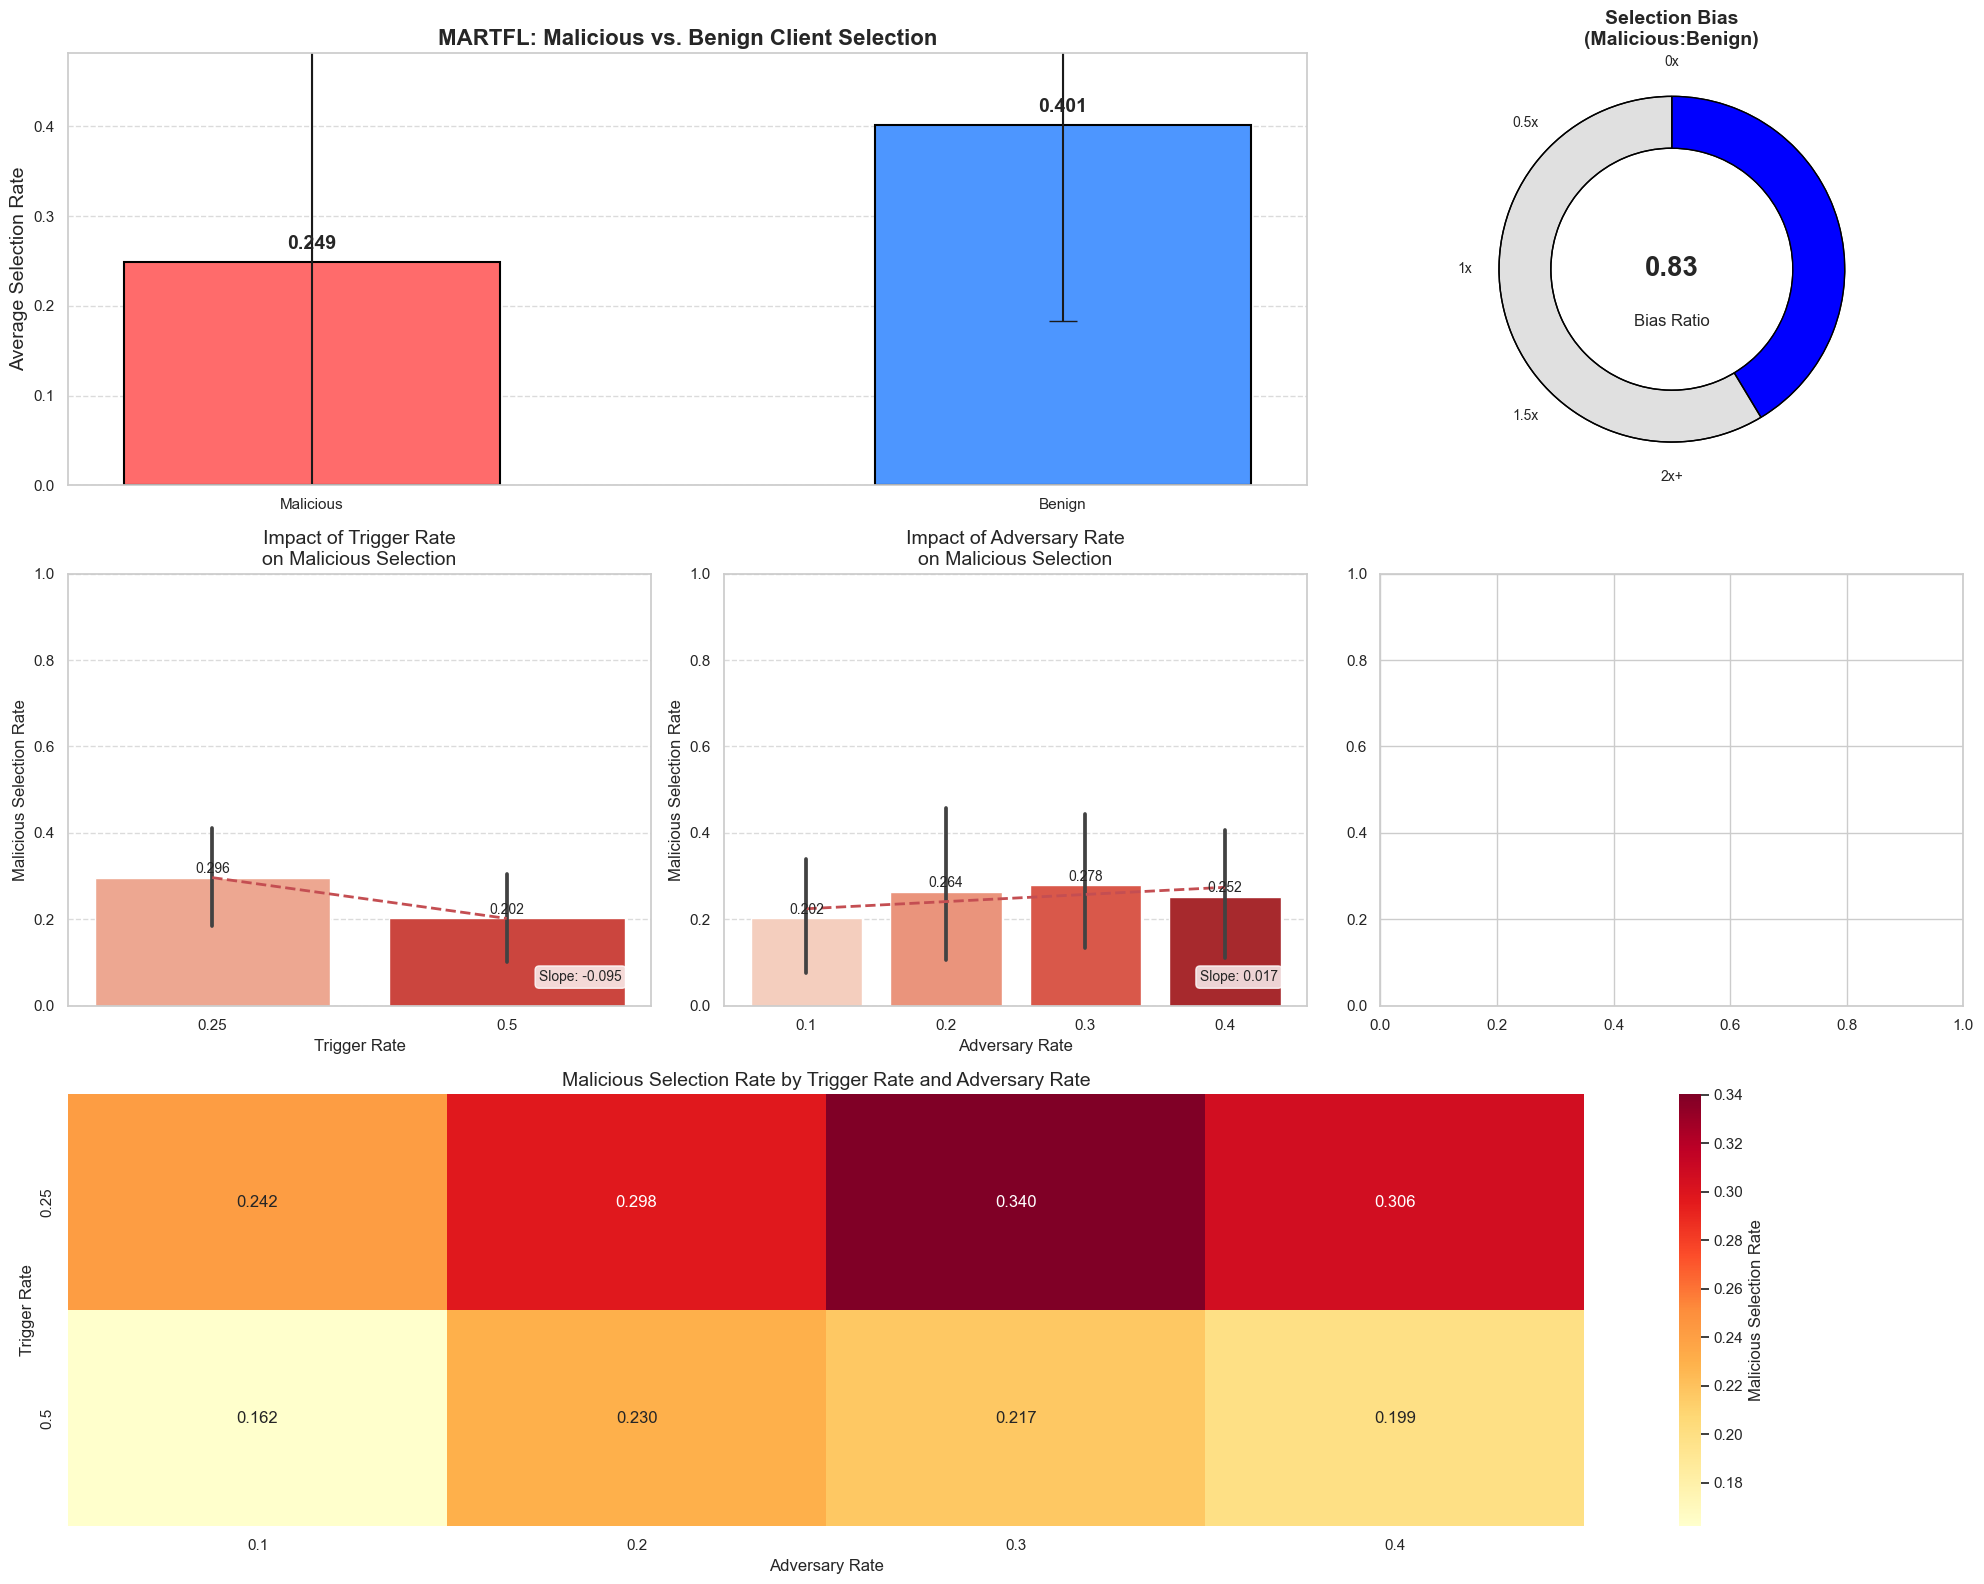

<Figure size 1600x1000 with 0 Axes>

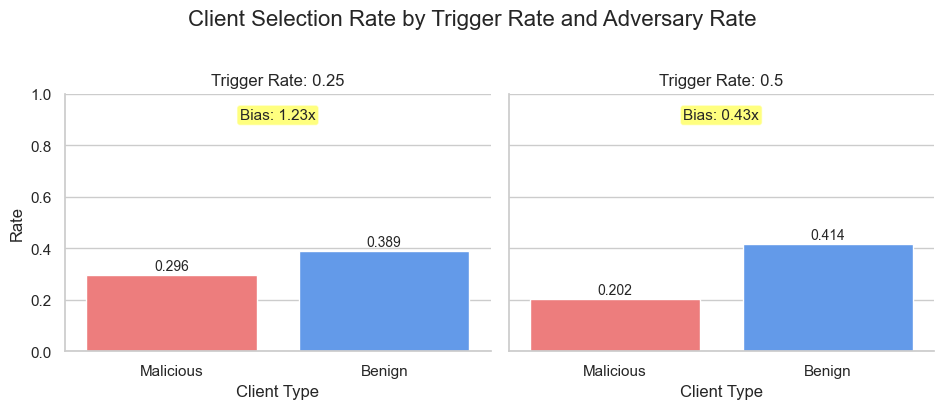

<Figure size 1600x800 with 0 Axes>

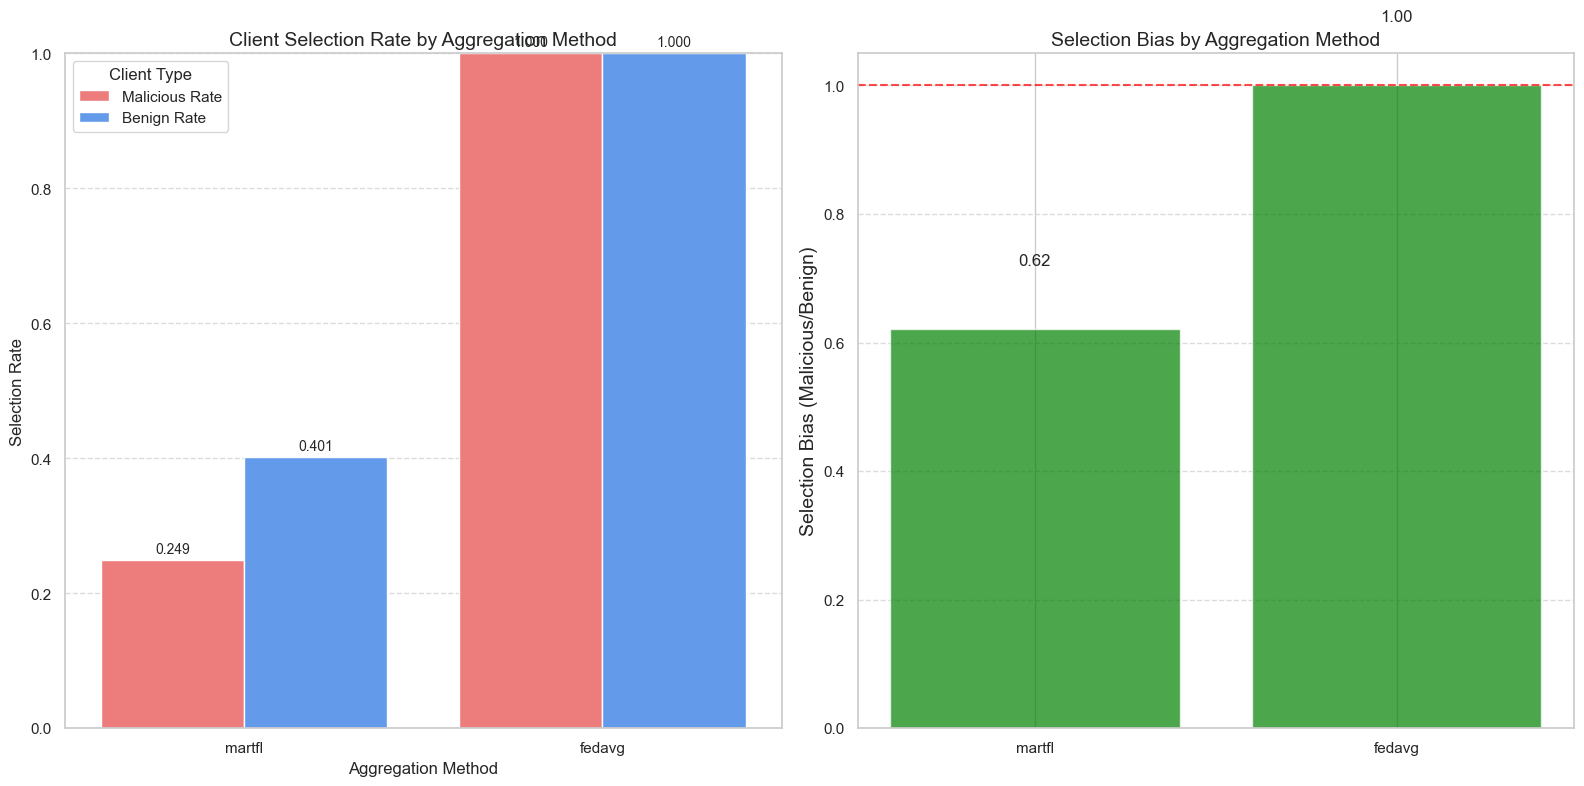


Summary Statistics for MARTFL:
Average Malicious Selection Rate: 0.2492 ± 0.3224
Average Benign Selection Rate: 0.4014 ± 0.2184
Selection Bias (Malicious/Benign): 0.8275

Malicious Selection Rate by Trigger Rate:
  Trigger Rate 0.25: 0.2965
  Trigger Rate 0.5: 0.2019

Malicious Selection Rate by Adversary Rate:
  Adversary Rate 0.1: 0.2021
  Adversary Rate 0.2: 0.2639
  Adversary Rate 0.3: 0.2785
  Adversary Rate 0.4: 0.2524


,AGGREGATION_METHOD,GRAD_MODE,TRIGGER_RATE,IS_SYBIL,ADV_RATE,CHANGE_BASE,IID,MAX_ASR,FINAL_ASR,FINAL_MAIN_ACC,...,ASR_75PCT,ROUNDS_TO_50PCT_ASR,ROUNDS_TO_75PCT_ASR,ROUNDS_TO_90PCT_ASR,AVG_MALICIOUS_RATE,AVG_BENIGN_RATE,ASR_PER_ADV,STEALTH,TOTAL_ROUNDS,SELECTION_BIAS
0,martfl,single,0.25,False,0.1,True,True,0.1959,0.0424,0.8170,...,0.1044,-1,-1,-1,0.095238,0.123457,0.424000,0.9925,21,0.771429
1,martfl,single,0.25,False,0.1,False,True,0.2652,0.2446,0.7510,...,0.2621,-1,-1,-1,0.777778,0.603175,2.446000,0.9854,21,1.289474
2,martfl,single,0.25,False,0.2,True,True,0.3132,0.0974,0.8304,...,0.0838,-1,-1,-1,0.095238,0.103175,0.487000,0.9908,21,0.923077
3,martfl,single,0.25,False,0.2,False,True,0.9272,0.8844,0.7638,...,0.8954,8,10,18,0.960317,0.577381,4.422000,0.9890,21,1.663230
4,martfl,single,0.25,False,0.3,True,True,0.9998,0.9805,0.8034,...,0.9869,0,2,2,0.322751,0.052154,3.268333,0.9898,21,6.188406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,martfl,single,0.50,True,0.2,False,True,0.1968,0.0953,0.8610,...,0.0977,-1,-1,-1,0.063492,0.640873,0.476500,0.9868,21,0.099071
60,martfl,single,0.50,True,0.3,True,True,0.1092,0.1005,0.8177,...,0.1092,-1,-1,-1,0.000000,0.365079,0.335000,0.9909,21,0.000000
61,martfl,single,0.50,True,0.3,False,True,0.2758,0.1133,0.8603,...,0.1161,-1,-1,-1,0.068783,0.693878,0.377667,0.9854,21,0.099129
62,martfl,single,0.50,True,0.4,True,True,0.1258,0.0689,0.8206,...,0.0630,-1,-1,-1,0.000000,0.415344,0.172250,0.9881,21,0.000000


In [40]:
visualize_martfl_selection_rates(df_summary, save_path)

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

def visualize_selection_rates_by_distribution(df, output_dir='./distribution_visualizations'):
    """
    Visualize the difference in malicious and benign client selection rates between
    IID and non-IID data distributions.

    Args:
        df: DataFrame containing the results
        output_dir: Directory to save the visualizations
    """
    # Create output directory
    os.makedirs(output_dir, exist_ok=True)

    # Filter out rows with missing selection rate data
    valid_df = df.dropna(subset=['AVG_MALICIOUS_RATE', 'AVG_BENIGN_RATE'])

    # Convert IID column to boolean if it's not already
    # if 'IID' in valid_df.columns and valid_df['IID'].dtype != bool:
    #     valid_df['IID'] = valid_df['IID'].astype(bool)

    # Check if we have IID information
    if 'IID' not in valid_df.columns or len(valid_df['IID'].unique()) <= 1:
        print("Error: Cannot compare IID vs non-IID. IID column not found or contains only one value.")
        return

    print(f"Analyzing {len(valid_df)} experiments with selection rate data")

    # 1. Create a clear side-by-side comparison
    plt.figure(figsize=(14, 8))

    # Prepare data for grouped bar chart
    iid_data = []
    for iid_val in sorted(valid_df['IID'].unique()):
        subset = valid_df[valid_df['IID'] == iid_val]

        # Calculate statistics
        mal_mean = subset['AVG_MALICIOUS_RATE'].mean()
        mal_std = subset['AVG_MALICIOUS_RATE'].std()
        ben_mean = subset['AVG_BENIGN_RATE'].mean()
        ben_std = subset['AVG_BENIGN_RATE'].std()
        selection_bias = mal_mean / (ben_mean + 1e-10)

        # Create entry
        iid_data.append({
            'Distribution': iid_val,
            'Malicious Rate': mal_mean,
            'Malicious Std': mal_std,
            'Benign Rate': ben_mean,
            'Benign Std': ben_std,
            'Selection Bias': selection_bias
        })

    iid_df = pd.DataFrame(iid_data)

    # Set up bar positions
    bar_width = 0.35
    r1 = np.arange(len(iid_df))
    r2 = [x + bar_width for x in r1]

    fig, ax = plt.subplots(figsize=(14, 8))

    # Create bars with more appealing colors
    bars1 = ax.bar(
        r1,
        iid_df['Malicious Rate'],
        width=bar_width,
        yerr=iid_df['Malicious Std'],
        color='#ff6b6b',
        label='Malicious',
        capsize=7,
        edgecolor='black',
        linewidth=1.5,
        alpha=0.8
    )

    bars2 = ax.bar(
        r2,
        iid_df['Benign Rate'],
        width=bar_width,
        yerr=iid_df['Benign Std'],
        color='#4d96ff',
        label='Benign',
        capsize=7,
        edgecolor='black',
        linewidth=1.5,
        alpha=0.8
    )

    # Add value labels
    for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
        # Get heights
        h1 = bar1.get_height()
        h2 = bar2.get_height()

        # Position the text
        ax.text(
            bar1.get_x() + bar1.get_width()/2,
            h1 + 0.02,
            f"{h1:.3f}",
            ha='center',
            va='bottom',
            fontsize=12,
            fontweight='bold'
        )

        ax.text(
            bar2.get_x() + bar2.get_width()/2,
            h2 + 0.02,
            f"{h2:.3f}",
            ha='center',
            va='bottom',
            fontsize=12,
            fontweight='bold'
        )

        # # Add bias ratio text
        # bias = iid_df.iloc[i]['Selection Bias']
        # y_pos = max(h1, h2) + 0.1
        # 
        # # Format bias text based on value
        # if bias > 1:
        #     bias_text = f"Bias: {bias:.2f}x (favors malicious)"
        #     text_color = 'red'
        # elif bias < 1:
        #     bias_text = f"Bias: {bias:.2f}x (favors benign)"
        #     text_color = 'blue'
        # else:
        #     bias_text = "No bias"
        #     text_color = 'black'
        # 
        # ax.text(
        #     r1[i] + bar_width/2,
        #     y_pos,
        #     bias_text,
        #     ha='center',
        #     va='bottom',
        #     fontsize=11,
        #     fontweight='bold',
        #     color=text_color,
        #     bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.4)
        # )

    # Add visual connections between same client types
    # This helps to see the difference between IID and Non-IID
    # if len(r1) > 1:
    #     # Connect malicious bars
    #     malicious_heights = iid_df['Malicious Rate'].values
    #     x_vals = [r + bar_width/2 for r in r1]
    #     ax.plot(x_vals, malicious_heights, 'o-', color='darkred', alpha=0.5, linewidth=1.5)
    # 
    #     # Connect benign bars
    #     benign_heights = iid_df['Benign Rate'].values
    #     x_vals = [r + bar_width/2 for r in r2]
    #     ax.plot(x_vals, benign_heights, 'o-', color='darkblue', alpha=0.5, linewidth=1.5)
    # 
    #     # Add percentage change annotations
    #     if len(malicious_heights) == 2:
    #         # For malicious rate
    #         mal_change = (malicious_heights[1] - malicious_heights[0]) / malicious_heights[0] * 100
    #         ax.annotate(
    #             f"{mal_change:+.1f}%",
    #             xy=(x_vals[1], malicious_heights[1]),
    #             xytext=(x_vals[0] + 0.5, (malicious_heights[0] + malicious_heights[1])/2 + 0.05),
    #             arrowprops=dict(arrowstyle="->", color='darkred', alpha=0.6),
    #             fontsize=10,
    #             color='darkred',
    #             fontweight='bold'
    #         )
    # 
    #         # For benign rate
    #         ben_change = (benign_heights[1] - benign_heights[0]) / benign_heights[0] * 100
    #         ax.annotate(
    #             f"{ben_change:+.1f}%",
    #             xy=(x_vals[1], benign_heights[1]),
    #             xytext=(x_vals[0] + 0.5, (benign_heights[0] + benign_heights[1])/2 - 0.05),
    #             arrowprops=dict(arrowstyle="->", color='darkblue', alpha=0.6),
    #             fontsize=10,
    #             color='darkblue',
    #             fontweight='bold'
    #         )

    # Customize apperarance
    ax.set_ylabel('Selection Rate', fontsize=14, fontweight='bold')
    ax.set_title('Client Selection Rate by Data Distribution', fontsize=16, fontweight='bold')
    ax.set_xticks([r + bar_width/2 for r in range(len(iid_df))])
    ax.set_xticklabels(iid_df['Distribution'], fontsize=12, fontweight='bold')
    ax.set_ylim(0, min(1.0, max(iid_df['Malicious Rate'].max(), iid_df['Benign Rate'].max()) * 1.5))
    ax.legend(fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Add a subtitle with explanation
    plt.figtext(
        0.5, 0.01,
        "Comparison of how often malicious and benign clients are selected in IID vs. Non-IID data distributions",
        ha='center',
        fontsize=11,
        fontstyle='italic'
    )

    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.savefig(f"{output_dir}/selection_rates_by_distribution.png", dpi=300)
    plt.savefig(f"{output_dir}/selection_rates_by_distribution.pdf", format='pdf')
    plt.show()
    plt.close()

    # 2. Create a heatmap showing selection rates by aggregation method and distribution
    if 'AGGREGATION_METHOD' in valid_df.columns and len(valid_df['AGGREGATION_METHOD'].unique()) > 1:
        plt.figure(figsize=(16, 12))

        # Create subplots for malicious and benign rates
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 16))

        # Prepare data for malicious clients
        mal_pivot = valid_df.pivot_table(
            values='AVG_MALICIOUS_RATE',
            index='AGGREGATION_METHOD',
            columns='IID',
            aggfunc='mean'
        )

        # Rename columns for clarity
        mal_pivot.columns = ['Non-IID' if not c else 'IID' for c in mal_pivot.columns]

        # Create heatmap for malicious clients
        sns.heatmap(
            mal_pivot,
            annot=True,
            fmt='.3f',
            cmap='Reds',
            linewidths=0.5,
            ax=ax1,
            cbar_kws={'label': 'Malicious Selection Rate'}
        )

        ax1.set_title('Malicious Client Selection Rate by Aggregation Method and Distribution', fontsize=14, fontweight='bold')

        # Prepare data for benign clients
        ben_pivot = valid_df.pivot_table(
            values='AVG_BENIGN_RATE',
            index='AGGREGATION_METHOD',
            columns='IID',
            aggfunc='mean'
        )

        # Rename columns for clarity
        ben_pivot.columns = ['Non-IID' if not c else 'IID' for c in ben_pivot.columns]

        # Create heatmap for benign clients
        sns.heatmap(
            ben_pivot,
            annot=True,
            fmt='.3f',
            cmap='Blues',
            linewidths=0.5,
            ax=ax2,
            cbar_kws={'label': 'Benign Selection Rate'}
        )

        ax2.set_title('Benign Client Selection Rate by Aggregation Method and Distribution', fontsize=14, fontweight='bold')

        # Calculate and display the difference (IID - non-IID)
        if 'IID' in mal_pivot.columns and 'Non-IID' in mal_pivot.columns:
            # Create a third subplot for the difference
            fig.set_size_inches(14, 24)
            ax3 = fig.add_subplot(3, 1, 3)

            # Calculate difference for malicious rates
            mal_diff = pd.DataFrame({
                'Malicious': mal_pivot['IID'] - mal_pivot['Non-IID'],
                'Benign': ben_pivot['IID'] - ben_pivot['Non-IID']
            })

            # Create heatmap for the difference
            sns.heatmap(
                mal_diff,
                annot=True,
                fmt='.3f',
                cmap='RdBu_r',
                center=0,
                linewidths=0.5,
                ax=ax3,
                cbar_kws={'label': 'Selection Rate Difference (IID - Non-IID)'}
            )

            ax3.set_title('Selection Rate Difference (IID - Non-IID) by Aggregation Method', fontsize=14, fontweight='bold')

        plt.tight_layout()
        plt.savefig(f"{output_dir}/selection_rates_by_distribution_and_method.png", dpi=300)
        plt.savefig(f"{output_dir}/selection_rates_by_distribution_and_method.pdf", format='pdf')
        plt.show()
        plt.close()

    # 3. Create boxplots showing the distribution of selection rates
    plt.figure(figsize=(15, 10))

    # Convert to long format for easier plotting
    long_df = pd.melt(
        valid_df,
        id_vars=['IID'],
        value_vars=['AVG_MALICIOUS_RATE', 'AVG_BENIGN_RATE'],
        var_name='Client Type',
        value_name='Selection Rate'
    )

    # Map values for better display
    long_df['Data Distribution'] = long_df['IID'].map({True: 'IID', False: 'Non-IID'})
    long_df['Client Type'] = long_df['Client Type'].map({
        'AVG_MALICIOUS_RATE': 'Malicious',
        'AVG_BENIGN_RATE': 'Benign'
    })

    # Create a boxplot with individual points
    ax = sns.boxplot(
        x='Data Distribution',
        y='Selection Rate',
        hue='Client Type',
        data=long_df,
        palette=['#ff6b6b', '#4d96ff'],
        width=0.6,
        fliersize=0
    )

    # Add individual data points
    sns.stripplot(
        x='Data Distribution',
        y='Selection Rate',
        hue='Client Type',
        data=long_df,
        dodge=True,
        jitter=True,
        color='black',
        alpha=0.5,
        size=4,
        ax=ax,
        legend=False
    )

    # Add statistical annotations
    from scipy import stats

    # For malicious clients
    mal_iid = valid_df[valid_df['IID'] == True]['AVG_MALICIOUS_RATE']
    mal_noniid = valid_df[valid_df['IID'] == False]['AVG_MALICIOUS_RATE']

    # For benign clients
    ben_iid = valid_df[valid_df['IID'] == True]['AVG_BENIGN_RATE']
    ben_noniid = valid_df[valid_df['IID'] == False]['AVG_BENIGN_RATE']

    # Perform t-tests
    mal_tstat, mal_pval = stats.ttest_ind(mal_iid, mal_noniid, equal_var=False)
    ben_tstat, ben_pval = stats.ttest_ind(ben_iid, ben_noniid, equal_var=False)

    # Add p-value annotations
    ax.text(
        0.5, 0.95,
        f"Malicious: p={mal_pval:.4f}" + (" *" if mal_pval < 0.05 else ""),
        transform=ax.transAxes,
        ha='center',
        fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.4)
    )

    ax.text(
        0.5, 0.90,
        f"Benign: p={ben_pval:.4f}" + (" *" if ben_pval < 0.05 else ""),
        transform=ax.transAxes,
        ha='center',
        fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.4)
    )

    # Customize appearance
    plt.title('Distribution of Selection Rates by Data Distribution', fontsize=16, fontweight='bold')
    plt.ylabel('Selection Rate', fontsize=14)
    plt.ylim(0, 1.0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Client Type', title_fontsize=12, fontsize=12)

    plt.tight_layout()
    plt.savefig(f"{output_dir}/selection_rates_boxplot.png", dpi=300)
    plt.savefig(f"{output_dir}/selection_rates_boxplot.pdf", format='pdf')
    plt.close()

    # Print summary statistics
    print("\nSummary Statistics by Data Distribution:")

    for iid_val in sorted(valid_df['IID'].unique()):
        subset = valid_df[valid_df['IID'] == iid_val]
        dist_name = 'IID' if iid_val else 'Non-IID'

        mal_mean = subset['AVG_MALICIOUS_RATE'].mean()
        mal_std = subset['AVG_MALICIOUS_RATE'].std()
        ben_mean = subset['AVG_BENIGN_RATE'].mean()
        ben_std = subset['AVG_BENIGN_RATE'].std()
        selection_bias = mal_mean / (ben_mean + 1e-10)

        print(f"\n{dist_name} Distribution:")
        print(f"  Malicious Selection Rate: {mal_mean:.4f} ± {mal_std:.4f}")
        print(f"  Benign Selection Rate: {ben_mean:.4f} ± {ben_std:.4f}")
        print(f"  Selection Bias (Malicious/Benign): {selection_bias:.4f}")

    # Print statistical significance results
    print("\nStatistical Significance Tests (IID vs Non-IID):")
    print(f"  Malicious Selection Rate: p-value = {mal_pval:.4f}" + (" (significant)" if mal_pval < 0.05 else ""))
    print(f"  Benign Selection Rate: p-value = {ben_pval:.4f}" + (" (significant)" if ben_pval < 0.05 else ""))

    return iid_df  # Return the processed summary data for further analysis

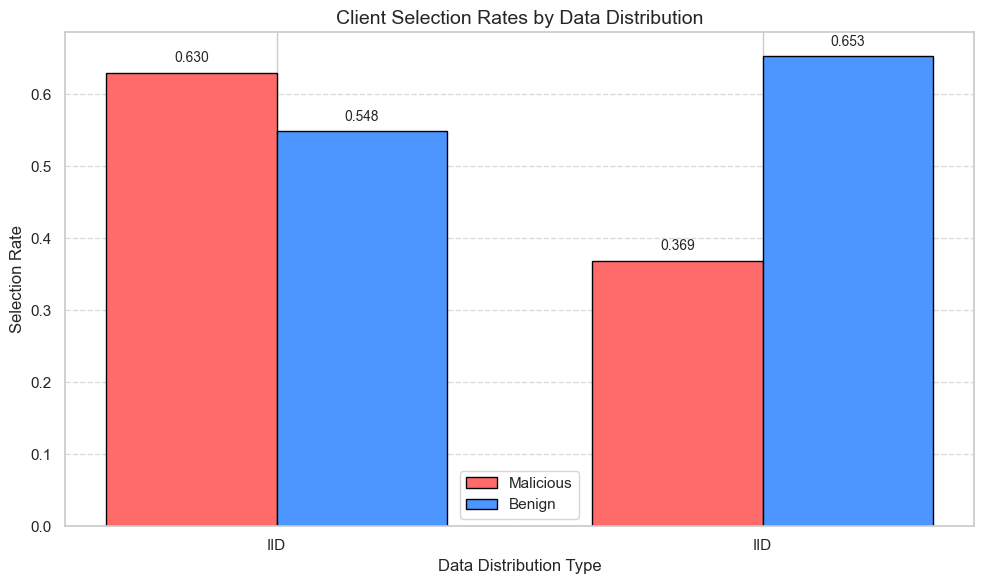


Summary Statistics:

IID Distribution:
  Malicious Selection Rate: 0.6301
  Benign Selection Rate: 0.5485
  Ratio (Malicious/Benign): 1.1488

IID Distribution:
  Malicious Selection Rate: 0.3688
  Benign Selection Rate: 0.6534
  Ratio (Malicious/Benign): 0.5645


,Distribution,Malicious Rate,Benign Rate
0,IID,0.630125,0.548492
1,IID,0.368827,0.653425


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

def simple_selection_rates_visualization(df, output_dir='./visualizations'):
    """
    Create a simple visualization comparing malicious and benign selection rates
    between IID and non-IID data distributions.
    """
    # Create output directory
    os.makedirs(output_dir, exist_ok=True)
    
    # Filter out rows with missing selection rate data
    valid_df = df.dropna(subset=['AVG_MALICIOUS_RATE', 'AVG_BENIGN_RATE'])
    
    # Check if we have IID information
    if 'IID' not in valid_df.columns or len(valid_df['IID'].unique()) <= 1:
        print("Error: Cannot compare IID vs non-IID. IID column missing or has only one value.")
        return
    
    # Group data by IID value and calculate statistics
    grouped_data = []
    for iid_val in valid_df['IID'].unique():
        subset = valid_df[valid_df['IID'] == iid_val]
        
        # Calculate mean rates
        mal_mean = subset['AVG_MALICIOUS_RATE'].mean()
        ben_mean = subset['AVG_BENIGN_RATE'].mean()
        
        # Create readable label
        distribution_type = 'IID' if iid_val else 'Non-IID'
        
        grouped_data.append({
            'Distribution': distribution_type,
            'Malicious Rate': mal_mean,
            'Benign Rate': ben_mean
        })
    
    # Create DataFrame from grouped data
    plot_df = pd.DataFrame(grouped_data)
    
    # Create the bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Set up positions for bars
    bar_width = 0.35
    x_positions = np.arange(len(plot_df))
    
    # Create bars for malicious and benign rates
    malicious_bars = ax.bar(
        x_positions - bar_width/2,
        plot_df['Malicious Rate'],
        bar_width,
        label='Malicious',
        color='#ff6b6b',
        edgecolor='black'
    )
    
    benign_bars = ax.bar(
        x_positions + bar_width/2,
        plot_df['Benign Rate'],
        bar_width,
        label='Benign',
        color='#4d96ff',
        edgecolor='black'
    )
    
    # Add value labels on bars
    for bars in [malicious_bars, benign_bars]:
        for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width()/2,
                height + 0.01,
                f"{height:.3f}",
                ha='center',
                va='bottom',
                fontsize=10
            )
    
    # Add labels and title
    ax.set_xlabel('Data Distribution Type', fontsize=12)
    ax.set_ylabel('Selection Rate', fontsize=12)
    ax.set_title('Client Selection Rates by Data Distribution', fontsize=14)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(plot_df['Distribution'])
    ax.legend()
    
    # Add grid for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Save and display plot
    plt.tight_layout()
    plt.savefig(f"{output_dir}/simple_selection_rates.png", dpi=300)
    plt.show()
    
    # Print summary statistics
    print("\nSummary Statistics:")
    for _, row in plot_df.iterrows():
        print(f"\n{row['Distribution']} Distribution:")
        print(f"  Malicious Selection Rate: {row['Malicious Rate']:.4f}")
        print(f"  Benign Selection Rate: {row['Benign Rate']:.4f}")
        print(f"  Ratio (Malicious/Benign): {row['Malicious Rate']/row['Benign Rate']:.4f}")
    
    return plot_df
simple_selection_rates_visualization(df_summary, save_path)

Analyzing 96 experiments with selection rate data


<Figure size 1400x800 with 0 Axes>

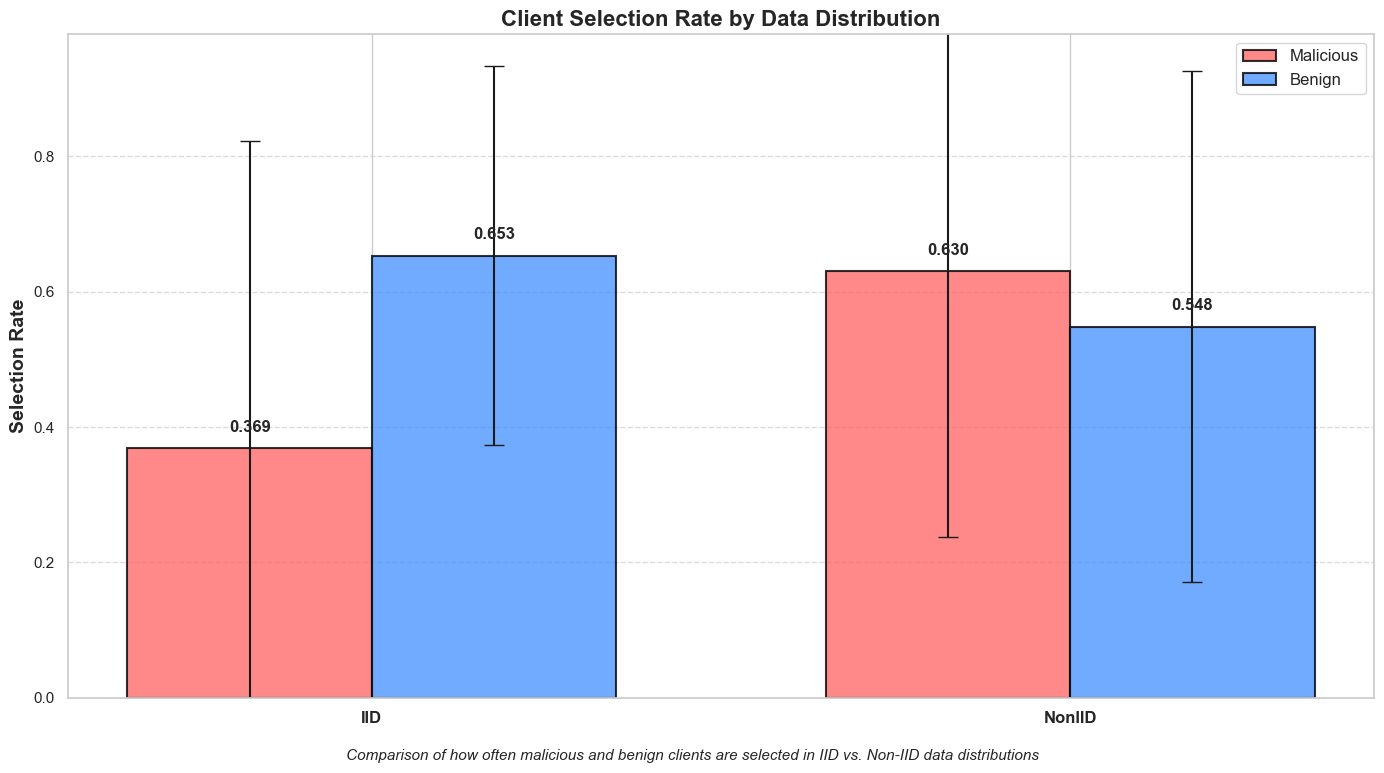

<Figure size 1600x1200 with 0 Axes>

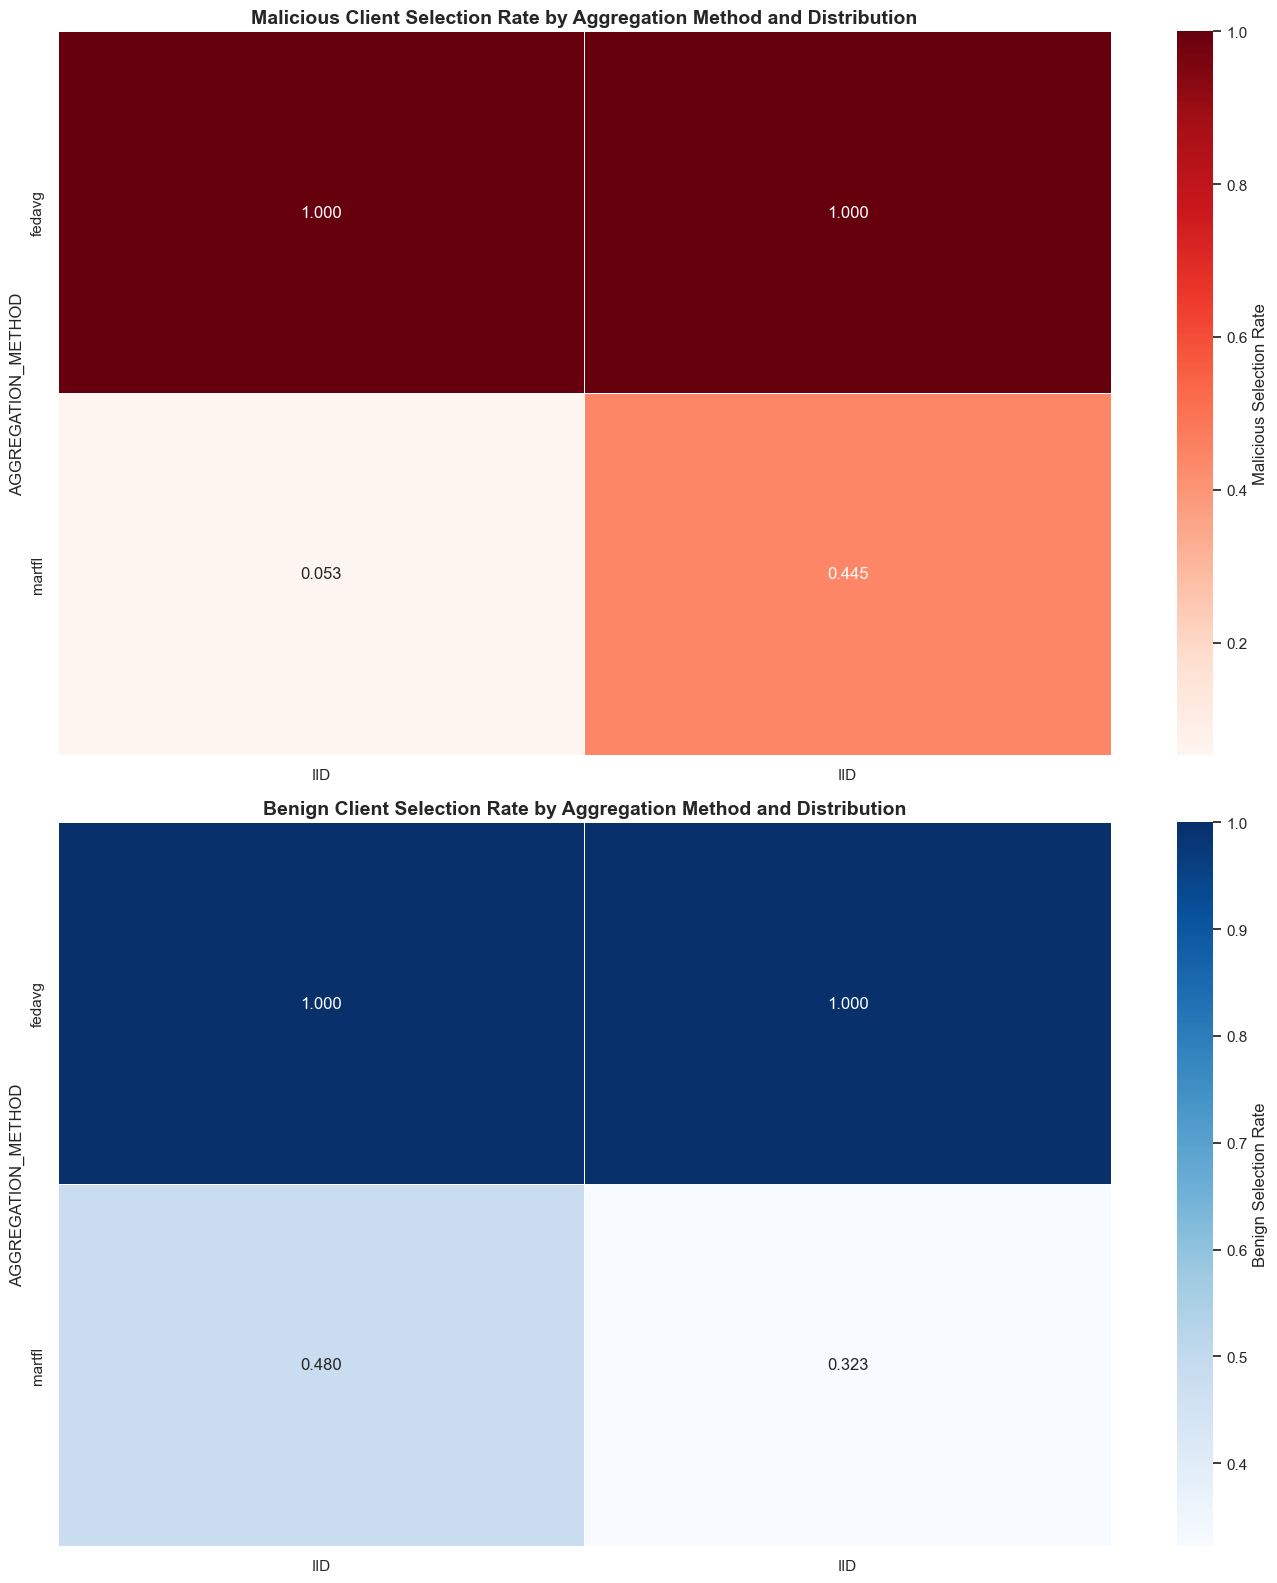

C:\Users\zeyu song\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:761: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  ax.set_xlim(-.5, len(self.plot_data) - .5, auto=None)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\zeyu song\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)
C:\Users\zeyu song\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:220: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  ax.set_xlim(-.5, n - .5, auto=None)
N


Summary Statistics by Data Distribution:

IID Distribution:
  Malicious Selection Rate: 0.3688 ± 0.4535
  Benign Selection Rate: 0.6534 ± 0.2798
  Selection Bias (Malicious/Benign): 0.5645

IID Distribution:
  Malicious Selection Rate: 0.6301 ± 0.3932
  Benign Selection Rate: 0.5485 ± 0.3777
  Selection Bias (Malicious/Benign): 1.1488

Statistical Significance Tests (IID vs Non-IID):
  Malicious Selection Rate: p-value = nan
  Benign Selection Rate: p-value = nan


,Distribution,Malicious Rate,Malicious Std,Benign Rate,Benign Std,Selection Bias
0,IID,0.368827,0.453523,0.653425,0.279784,0.564452
1,NonIID,0.630125,0.393185,0.548492,0.377694,1.148832


In [38]:
visualize_selection_rates_by_distribution(df_summary, save_path)

In [31]:
df

,AGGREGATION_METHOD,GRAD_MODE,TRIGGER_RATE,IS_SYBIL,ADV_RATE,CHANGE_BASE,IID,MAX_ASR,FINAL_ASR,FINAL_MAIN_ACC,...,ASR_50PCT,ASR_75PCT,ROUNDS_TO_50PCT_ASR,ROUNDS_TO_75PCT_ASR,ROUNDS_TO_90PCT_ASR,AVG_MALICIOUS_RATE,AVG_BENIGN_RATE,ASR_PER_ADV,STEALTH,TOTAL_ROUNDS
0,martfl,single,0.25,False,0.1,True,NonIID,0.1959,0.0424,0.8170,...,0.0948,0.1044,-1,-1,-1,0.095238,0.123457,0.424000,0.9925,21
1,martfl,single,0.25,False,0.1,False,NonIID,0.2652,0.2446,0.7510,...,0.1678,0.2621,-1,-1,-1,0.777778,0.603175,2.446000,0.9854,21
2,martfl,single,0.25,False,0.2,True,NonIID,0.3132,0.0974,0.8304,...,0.1038,0.0838,-1,-1,-1,0.095238,0.103175,0.487000,0.9908,21
3,martfl,single,0.25,False,0.2,False,NonIID,0.9272,0.8844,0.7638,...,0.7495,0.8954,8,10,18,0.960317,0.577381,4.422000,0.9890,21
4,martfl,single,0.25,False,0.3,True,NonIID,0.9998,0.9805,0.8034,...,0.9909,0.9869,0,2,2,0.322751,0.052154,3.268333,0.9898,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,fedavg,single,0.50,False,0.4,False,IID,0.9747,0.9703,0.8841,...,0.9362,0.9636,0,0,22,1.000000,1.000000,2.425750,0.9820,51
92,fedavg,single,0.50,True,0.1,False,IID,0.4892,0.4892,0.8878,...,0.1522,0.2642,-1,-1,-1,1.000000,1.000000,4.892000,0.9804,51
93,fedavg,single,0.50,True,0.2,False,IID,0.8624,0.8622,0.8863,...,0.4997,0.7957,0,36,-1,1.000000,1.000000,4.311000,0.9818,51
94,fedavg,single,0.50,True,0.3,False,IID,0.9467,0.9429,0.8853,...,0.8438,0.9184,0,23,34,1.000000,1.000000,3.143000,0.9819,51


In [41]:
import pandas as pd
import numpy as np

def generate_performance_statistics(df):
    """
    Generate a table of model performance statistics grouped by
    AGGREGATION_METHOD and IID/NonIID distribution.

    Args:
        df: DataFrame containing experimental results with columns:
           - AGGREGATION_METHOD: aggregation method used (e.g., 'martfl', 'fedavg')
           - IID: data distribution ('IID' or 'NonIID')
           - FINAL_ASR: Attack Success Rate
           - FINAL_MAIN_ACC: Main Task Accuracy
           - Other metrics as needed

    Returns:
        DataFrame with performance statistics
    """
    # Verify required columns exist
    required_cols = ['AGGREGATION_METHOD', 'IID', 'FINAL_ASR', 'FINAL_MAIN_ACC']
    missing_cols = [col for col in required_cols if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Missing required columns: {missing_cols}")

    # Create a list to store results
    results = []

    # Group by AGGREGATION_METHOD and IID
    grouped = df.groupby(['AGGREGATION_METHOD', 'IID'])

    # Define metrics to include in the table
    metrics = {
        'FINAL_ASR': 'Attack Success Rate',
        'FINAL_MAIN_ACC': 'Main Task Accuracy',
        'AVG_MALICIOUS_RATE': 'Malicious Selection Rate',
        'AVG_BENIGN_RATE': 'Benign Selection Rate',
    }

    # Add additional metrics if they exist in the dataframe
    for metric in ['FINAL_CLEAN_ACC', 'FINAL_TRIGGERED_ACC', 'STEALTH']:
        if metric in df.columns:
            metrics[metric] = metric.replace('FINAL_', '').replace('_', ' ').title()

    # Iterate through each group
    for (agg_method, iid_val), group in grouped:
        # Calculate statistics for each metric
        entry = {
            'Aggregation Method': agg_method,
            'Data Distribution': iid_val,
            'Sample Size': len(group)
        }

        # Calculate statistics for available metrics
        for metric_col, metric_name in metrics.items():
            if metric_col in group.columns:
                values = group[metric_col].dropna()

                if len(values) > 0:
                    entry[f'{metric_name} (Mean)'] = values.mean()
                    entry[f'{metric_name} (Std)'] = values.std()
                    entry[f'{metric_name} (Min)'] = values.min()
                    entry[f'{metric_name} (Max)'] = values.max()
                else:
                    entry[f'{metric_name} (Mean)'] = np.nan
                    entry[f'{metric_name} (Std)'] = np.nan
                    entry[f'{metric_name} (Min)'] = np.nan
                    entry[f'{metric_name} (Max)'] = np.nan

        # Calculate selection bias if both malicious and benign rates are available
        if 'AVG_MALICIOUS_RATE' in group.columns and 'AVG_BENIGN_RATE' in group.columns:
            mal_rates = group['AVG_MALICIOUS_RATE'].dropna()
            ben_rates = group['AVG_BENIGN_RATE'].dropna()

            if len(mal_rates) > 0 and len(ben_rates) > 0:
                bias_values = mal_rates / (ben_rates + 1e-10)
                entry['Selection Bias (Mean)'] = bias_values.mean()
                entry['Selection Bias (Std)'] = bias_values.std()

        results.append(entry)

    # Create DataFrame from results
    stats_df = pd.DataFrame(results)

    # Sort by aggregation method and data distribution
    stats_df = stats_df.sort_values(['Aggregation Method', 'Data Distribution'])

    return stats_df

def print_formatted_table(stats_df, output_file=None):
    """
    Print a formatted table of statistics and optionally save to a file.

    Args:
        stats_df: DataFrame with statistics
        output_file: Optional file path to save the table
    """
    # Create a formatted copy with rounded values
    formatted_df = stats_df.copy()

    # Round numeric columns to 4 decimal places
    numeric_cols = stats_df.select_dtypes(include=['float64', 'float32']).columns
    for col in numeric_cols:
        formatted_df[col] = formatted_df[col].round(4)

    # Print the formatted table
    print("\nModel Performance Statistics by Aggregation Method and Data Distribution:")
    print("="*100)
    print(formatted_df.to_string(index=False))
    print("="*100)

    # Save to file if specified
    if output_file:
        # Save both a CSV (for further analysis) and a text file (for readability)
        stats_df.to_csv(f"{output_file}.csv", index=False, float_format='%.4f')

        with open(f"{output_file}.txt", 'w') as f:
            f.write("Model Performance Statistics by Aggregation Method and Data Distribution:\n")
            f.write("="*100 + "\n")
            f.write(formatted_df.to_string(index=False))
            f.write("\n" + "="*100 + "\n")

        print(f"Statistics saved to {output_file}.csv and {output_file}.txt")

    return formatted_df

def generate_latex_table(stats_df, output_file=None, metrics=None):
    """
    Generate a LaTeX table for publication.

    Args:
        stats_df: DataFrame with statistics
        output_file: Optional file path to save the LaTeX code
        metrics: List of metrics to include (defaults to ASR and accuracy)
    """
    if metrics is None:
        # Default to these metrics if not specified
        metrics = ['Attack Success Rate', 'Main Task Accuracy']

    # Create a clean dataframe for LaTeX
    latex_rows = []

    # Get unique aggregation methods and data distributions
    agg_methods = stats_df['Aggregation Method'].unique()
    distributions = stats_df['Data Distribution'].unique()

    for agg in agg_methods:
        for metric in metrics:
            row = {'Metric': metric}

            for dist in distributions:
                # Get the specific entry
                entry = stats_df[(stats_df['Aggregation Method'] == agg) &
                                 (stats_df['Data Distribution'] == dist)]

                if not entry.empty:
                    mean_col = f'{metric} (Mean)'
                    std_col = f'{metric} (Std)'

                    if mean_col in entry.columns and std_col in entry.columns:
                        mean_val = entry[mean_col].values[0]
                        std_val = entry[std_col].values[0]

                        if not np.isnan(mean_val) and not np.isnan(std_val):
                            row[dist] = f"{mean_val:.4f} ± {std_val:.4f}"
                        else:
                            row[dist] = "N/A"
                    else:
                        row[dist] = "N/A"
                else:
                    row[dist] = "N/A"

            row['Method'] = agg
            latex_rows.append(row)

    # Convert to DataFrame for easier handling
    latex_df = pd.DataFrame(latex_rows)

    # Rearrange columns for better table structure
    cols = ['Method', 'Metric'] + [col for col in latex_df.columns if col not in ['Method', 'Metric']]
    latex_df = latex_df[cols]

    # Generate LaTeX code
    latex_code = latex_df.to_latex(index=False, escape=False)

    # Save to file if specified
    if output_file:
        with open(f"{output_file}.tex", 'w') as f:
            f.write(latex_code)
        print(f"LaTeX table saved to {output_file}.tex")

    return latex_code

# Example usage:
# stats_df = generate_performance_statistics(df_summary)
# print_formatted_table(stats_df, "performance_statistics")
# generate_latex_table(stats_df, "performance_latex")

In [39]:
stats_df = generate_performance_statistics(df_summary)
# print_formatted_table(stats_df, "performance_statistics")
generate_latex_table(stats_df, "performance_latex")(df, output_dir='./distribution_visualizations'):


SyntaxError: invalid syntax (195553440.py, line 3)

In [40]:
stats_df = generate_performance_statistics(df_summary)
# print_formatted_table(stats_df, "performance_statistics")
generate_latex_table(stats_df, "performance_latex")


LaTeX table saved to performance_latex.tex


'\\begin{tabular}{llll}\n\\toprule\nMethod & Metric & IID & NonIID \\\\\n\\midrule\nfedavg & Attack Success Rate & 0.7815 ± 0.2426 & 0.7788 ± 0.2677 \\\\\nfedavg & Main Task Accuracy & 0.8860 ± 0.0011 & 0.8410 ± 0.0040 \\\\\nmartfl & Attack Success Rate & 0.1416 ± 0.1544 & 0.5434 ± 0.4298 \\\\\nmartfl & Main Task Accuracy & 0.8389 ± 0.0212 & 0.7534 ± 0.0956 \\\\\n\\bottomrule\n\\end{tabular}\n'

KeyError: 'BENIGN_SEL_RATE'

<Figure size 1400x800 with 0 Axes>

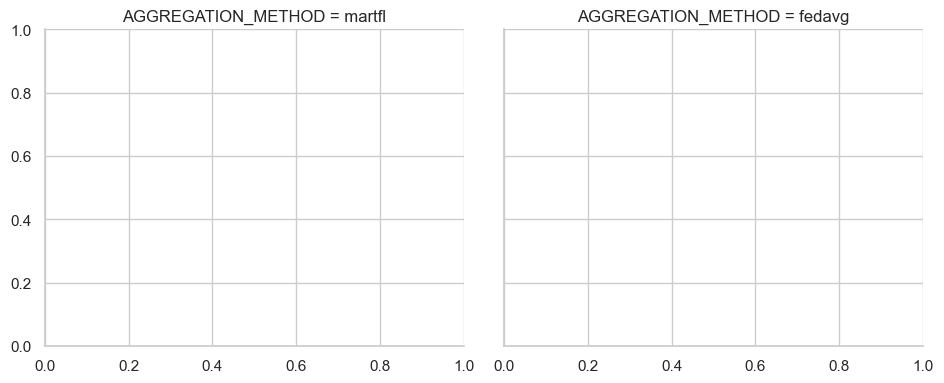

In [7]:
def plot_selection_rates(results_df, save_path):
    """
    Plot the relationship between benign and malicious selection rates
    as the adversary ratio changes.
    
    Parameters:
    results_df: DataFrame with columns 'ADV_RATE', 'BENIGN_SEL_RATE', 
                'MALICIOUS_SEL_RATE', 'AGGREGATION_METHOD'
    save_path: Path to save the visualization
    """
    plt.figure(figsize=(14, 8))
    
    # Create plot with multiple panels by aggregation method
    g = sns.FacetGrid(
        results_df, 
        col='AGGREGATION_METHOD',
        height=4, 
        aspect=1.2,
        sharey=True,
        sharex=True
    )
    
    # Create the scatter plot with connected lines for each adversary ratio
    def plot_selection_relationship(data, **kwargs):
        # Get unique adversary ratios
        adv_rates = sorted(data['ADV_RATE'].unique())
        
        # Plot scatter points
        plt.scatter(
            data['BENIGN_SEL_RATE'], 
            data['MALICIOUS_SEL_RATE'],
            s=100,  # Point size
            c=data['ADV_RATE'],  # Color by adversary ratio
            cmap='viridis',  # Color map
            alpha=0.8,
            edgecolor='black',
            linewidth=1
        )
        
        # Add text labels for adversary ratios
        for adv_rate in adv_rates:
            subset = data[data['ADV_RATE'] == adv_rate]
            if not subset.empty:
                x = subset['BENIGN_SEL_RATE'].mean()
                y = subset['MALICIOUS_SEL_RATE'].mean()
                plt.text(x+0.01, y, f'{adv_rate:.1f}', fontsize=9)
        
        # Draw connected lines between adjacent adversary ratios
        # Sort by adversary ratio to ensure proper connection
        sorted_data = data.sort_values('ADV_RATE')
        plt.plot(
            sorted_data['BENIGN_SEL_RATE'], 
            sorted_data['MALICIOUS_SEL_RATE'],
            'k--',  # Black dashed line
            alpha=0.6,
            linewidth=1
        )
        
        # Draw the diagonal line (equal selection rate)
        x = np.linspace(0, 1, 100)
        plt.plot(x, x, 'r-', alpha=0.5, label='Equal Selection')
        
        # Draw the ideal line (100% benign, 0% malicious)
        plt.plot([1, 1], [0, 0], 'go', markersize=10, label='Ideal Point')
        
        # Add arrows to show direction of increasing adversary ratio
        arrow_indices = np.linspace(0, len(sorted_data)-1, min(5, len(sorted_data))).astype(int)
        for i in arrow_indices[:-1]:
            if i+1 < len(sorted_data):
                x1, y1 = sorted_data.iloc[i][['BENIGN_SEL_RATE', 'MALICIOUS_SEL_RATE']]
                x2, y2 = sorted_data.iloc[i+1][['BENIGN_SEL_RATE', 'MALICIOUS_SEL_RATE']]
                dx, dy = x2-x1, y2-y1
                if abs(dx) > 0.01 or abs(dy) > 0.01:  # Only add arrow if there's enough change
                    plt.arrow(x1, y1, dx*0.8, dy*0.8, head_width=0.02, head_length=0.03, 
                             fc='black', ec='black', alpha=0.6)
    
    # Map the plot function across the facets
    g.map_dataframe(plot_selection_relationship)
    
    # Customize appearance
    g.set_axis_labels('Benign Selection Rate', 'Malicious Selection Rate')
    g.set_titles(col_template='{col_name}')
    
    # Format axes as percentages
    for ax in g.axes.flat:
        ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
        
        # Set axis limits
        ax.set_xlim(0, 1.05)
        ax.set_ylim(0, 1.05)
        
        # Add a legend for adversary ratio
        sm = plt.cm.ScalarMappable(cmap='viridis')
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=ax)
        cbar.set_label('Adversary Ratio')
        
        # Add diagonal and ideal point labels
        ax.legend(loc='upper right')
    
    # Add explanatory annotation
    plt.figtext(0.5, 0.01, 
               "Points show selection rates at different adversary ratios.\n"
               "Ideal defense would maintain high benign selection while keeping malicious selection low.",
               ha='center', fontsize=10, style='italic')
    
    # Add title
    plt.suptitle('Relationship Between Benign and Malicious Selection Rates\nas Adversary Ratio Increases', 
                fontsize=14, y=1.02)
    
    plt.tight_layout()
    plt.savefig(f'{save_path}/selection_rate_relationship.png', dpi=300, bbox_inches='tight')
    
    return g
plot_selection_rates(df_summary, visial_save_path)

C:\Users\zeyu song\AppData\Local\Temp\ipykernel_23564\2762156343.py:21: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.lineplot(
C:\Users\zeyu song\AppData\Local\Temp\ipykernel_23564\2762156343.py:32: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.lineplot(
C:\Users\zeyu song\AppData\Local\Temp\ipykernel_23564\2762156343.py:44: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
C:\Users\zeyu song\AppData\Local\Temp\ipykernel_23564\2762156343.py:55: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


AttributeError: 'NoneType' object has no attribute 'remove'

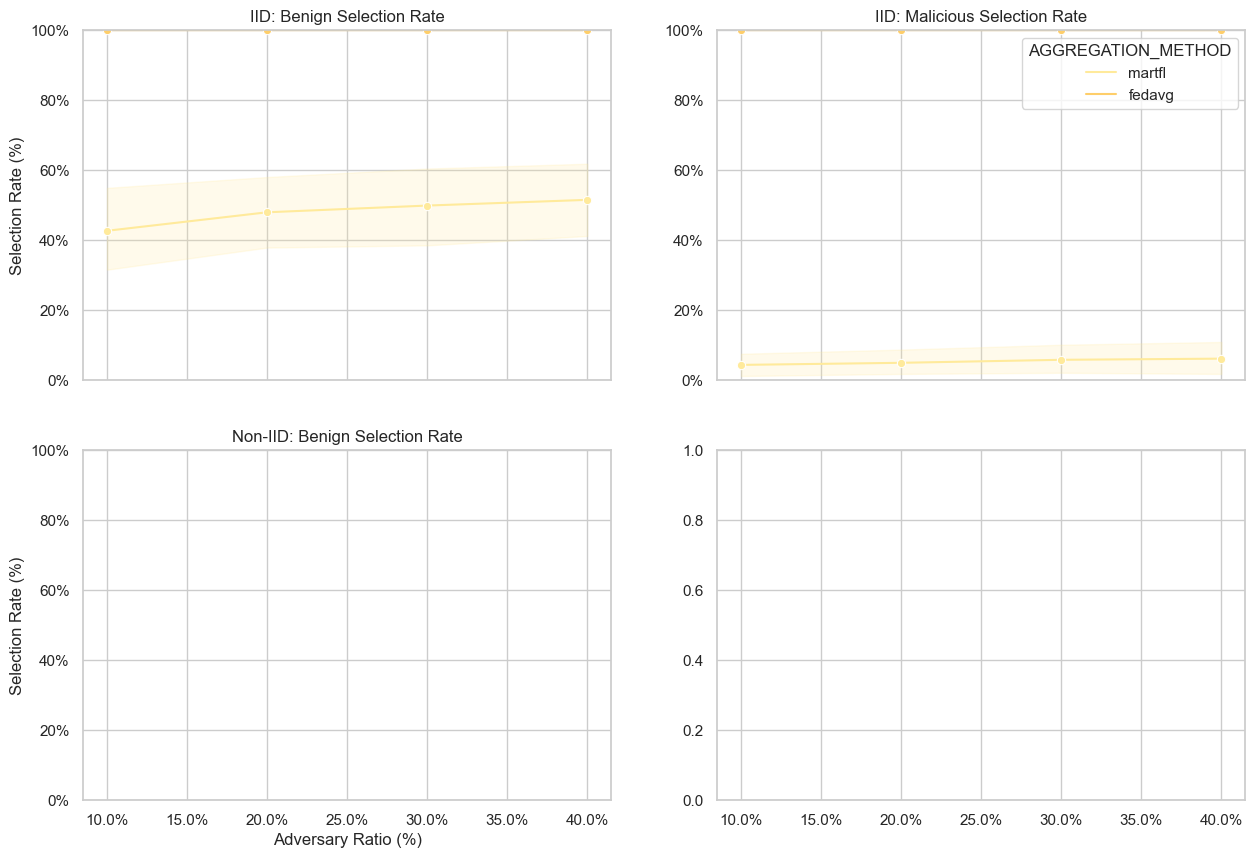

In [6]:
def plot_selection_vs_adv_rate_by_iid(results_df, save_path):
    """
    Simplified plot of selection rates vs adversary ratio, split by IID type.
    
    Parameters:
    results_df: DataFrame with columns ADV_RATE, AVG_BENIGN_RATE, AVG_MALICIOUS_RATE,
                AGGREGATION_METHOD, IID
    save_path: Path to save the visualization
    """
    # Filter for IID data
    iid_data = results_df[results_df['IID'] == 'IID']
    
    # Filter for Non-IID data (combine all Non-IID types)
    non_iid_data = results_df[results_df['IID'].str.contains('Non-IID')]
    
    # Create figure with 2x2 grid: top row for IID, bottom row for Non-IID
    fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
    
    # Plot IID data
    # Benign selection rate (top left)
    sns.lineplot(
        data=iid_data,
        x='ADV_RATE',
        y='AVG_BENIGN_RATE',
        hue='AGGREGATION_METHOD',
        marker='o',
        palette=COLOR_PALETTE,
        ax=axes[0, 0]
    )
    
    # Malicious selection rate (top right)
    sns.lineplot(
        data=iid_data,
        x='ADV_RATE',
        y='AVG_MALICIOUS_RATE',
        hue='AGGREGATION_METHOD',
        marker='o',
        palette=COLOR_PALETTE,
        ax=axes[0, 1]
    )
    
    # Plot Non-IID data
    # Benign selection rate (bottom left)
    sns.lineplot(
        data=non_iid_data,
        x='ADV_RATE',
        y='AVG_BENIGN_RATE',
        hue='AGGREGATION_METHOD',
        marker='o',
        palette=COLOR_PALETTE,
        ax=axes[1, 0]
    )
    
    # Malicious selection rate (bottom right)
    sns.lineplot(
        data=non_iid_data,
        x='ADV_RATE',
        y='AVG_MALICIOUS_RATE',
        hue='AGGREGATION_METHOD',
        marker='o',
        palette=COLOR_PALETTE,
        ax=axes[1, 1]
    )
    
    # Format all axes and add titles
    for i, row_label in enumerate(['IID', 'Non-IID']):
        for j, col_label in enumerate(['Benign Selection Rate', 'Malicious Selection Rate']):
            ax = axes[i, j]
            
            # Format axes as percentages
            ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
            ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
            
            # Set y-axis range
            ax.set_ylim(0, 1)
            
            # Set titles and labels
            ax.set_title(f'{row_label}: {col_label}')
            
            # Only add x-label to bottom row
            if i == 1:
                ax.set_xlabel('Adversary Ratio (%)')
            else:
                ax.set_xlabel('')
                
            # Only add y-label to left column
            if j == 0:
                ax.set_ylabel('Selection Rate (%)')
            else:
                ax.set_ylabel('')
                
            # Remove legend from all but the top-right plot
            if not (i == 0 and j == 1):
                ax.get_legend().remove()
    
    # Improve the legend in the top-right plot
    handles, labels = axes[0, 1].get_legend_handles_labels()
    axes[0, 1].legend(
        handles, 
        labels, 
        title='Aggregation Method',
        loc='best',
        frameon=True
    )
    
    # Add overall title
    plt.suptitle('Selection Rates vs Adversary Ratio (Split by Data Distribution)', fontsize=16)
    
    # Adjust spacing
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    # Save the figure
    plt.savefig(f'{save_path}/selection_by_iid_simple.png', dpi=300, bbox_inches='tight')
    
    return fig
plot_selection_vs_adv_rate_by_iid(df_summary, save_path)


C:\Users\zeyu song\AppData\Local\Temp\ipykernel_23564\2057193119.py:32: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  ax = sns.lineplot(


ValueError: Number of rows must be a positive integer, not 0

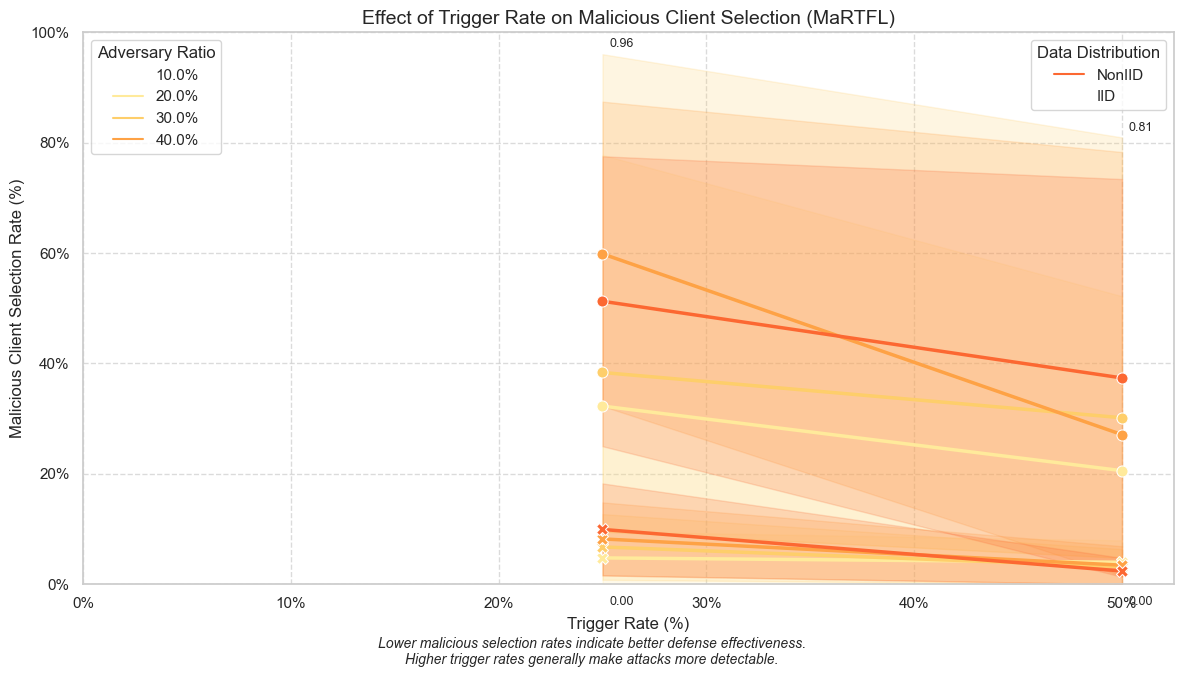

<Figure size 0x0 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.ticker as mtick

# Set style
sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.size': 12})
visual_save_path = "./visualization"
Path(visual_save_path).mkdir(parents=True, exist_ok=True)

# Consistent colors
COLOR_PALETTE = sns.color_palette("YlOrRd", 6)  # Yellow-Orange-Red color scheme for trigger rates

def plot_trigger_vs_selection(results_df, save_path):
    """
    Plot the relationship between trigger rate and malicious client selection rate for MaRTFL.
    
    Parameters:
    results_df: DataFrame with columns TRIGGER_RATE, AVG_MALICIOUS_RATE, ADV_RATE, IID
    save_path: Path to save the visualization
    """
    # Filter only for MaRTFL data
    martfl_data = results_df[results_df['AGGREGATION_METHOD'] == 'martfl']
    
    # Create figure
    plt.figure(figsize=(12, 7))
    
    # Create the line plot
    ax = sns.lineplot(
        data=martfl_data,
        x='TRIGGER_RATE',
        y='AVG_MALICIOUS_RATE',
        hue='ADV_RATE',
        style='IID',
        markers=True,
        dashes=False,
        palette=COLOR_PALETTE,
        linewidth=2.5,
        markersize=8
    )
    
    # Format axes as percentages
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    
    # Add labels and title
    plt.xlabel('Trigger Rate (%)')
    plt.ylabel('Malicious Client Selection Rate (%)')
    plt.title('Effect of Trigger Rate on Malicious Client Selection (MaRTFL)', fontsize=14)
    
    # Set axis limits
    plt.xlim(0, max(martfl_data['TRIGGER_RATE']) * 1.05)
    plt.ylim(0, 1)
    
    # Add grid lines for better readability
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Improve the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    
    # Split the legend into two parts
    adv_handles = handles[:len(martfl_data['ADV_RATE'].unique())]
    adv_labels = [f"{float(label):.1%}" for label in martfl_data['ADV_RATE'].unique()]
    
    iid_handles = handles[len(martfl_data['ADV_RATE'].unique()):]
    iid_labels = [label for label in martfl_data['IID'].unique()]
    
    # Create two legends
    legend1 = plt.legend(adv_handles, adv_labels, title='Adversary Ratio', 
                        loc='upper left', frameon=True)
    plt.gca().add_artist(legend1)
    
    plt.legend(iid_handles, iid_labels, title='Data Distribution', 
              loc='upper right', frameon=True)
    
    # Add annotations for key points
    # Find the minimum and maximum selection rates for each trigger rate
    for trigger_rate in sorted(martfl_data['TRIGGER_RATE'].unique()):
        subset = martfl_data[martfl_data['TRIGGER_RATE'] == trigger_rate]
        min_idx = subset['AVG_MALICIOUS_RATE'].idxmin()
        max_idx = subset['AVG_MALICIOUS_RATE'].idxmax()
        
        min_row = subset.loc[min_idx]
        max_row = subset.loc[max_idx]
        
        # Add annotations for min and max points
        plt.annotate(
            f"{min_row['AVG_MALICIOUS_RATE']:.2f}",
            (trigger_rate, min_row['AVG_MALICIOUS_RATE']),
            xytext=(5, -15),
            textcoords='offset points',
            fontsize=9
        )
        
        plt.annotate(
            f"{max_row['AVG_MALICIOUS_RATE']:.2f}",
            (trigger_rate, max_row['AVG_MALICIOUS_RATE']),
            xytext=(5, 5),
            textcoords='offset points',
            fontsize=9
        )
    
    # Add a note about interpretation
    plt.figtext(0.5, 0.01, 
                "Lower malicious selection rates indicate better defense effectiveness.\n"
                "Higher trigger rates generally make attacks more detectable.",
                ha='center', fontsize=10, style='italic')
    
    # Save the figure
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.savefig(f'{save_path}/trigger_vs_selection_martfl.png', dpi=300, bbox_inches='tight')
    
    return plt

def plot_trigger_vs_selection_grid(results_df, save_path):
    """
    Create a grid of plots showing the relationship between trigger rate and malicious selection
    for different adversary ratios.
    """
    # Filter only for MaRTFL data
    martfl_data = results_df[results_df['AGGREGATION_METHOD'] == 'MaRTFL']
    
    # Create a grid of plots based on adversary ratio
    g = sns.FacetGrid(
        martfl_data,
        col='ADV_RATE',
        row='IID',
        height=4,
        aspect=1.2,
        sharey=True,
        sharex=True
    )
    
    # Plot the relationship for each panel
    g.map_dataframe(
        sns.lineplot,
        x='TRIGGER_RATE',
        y='AVG_MALICIOUS_RATE',
        color='red',
        marker='o'
    )
    
    # Format axes
    g.set_axis_labels('Trigger Rate (%)', 'Malicious Selection Rate (%)')
    g.set_titles(col_template='Adv. Ratio: {col_name}', row_template='{row_name}')
    
    # Format as percentages
    for ax in g.axes.flat:
        ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
        
        # Add horizontal reference line at 0.5
        ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7)
    
    # Add overall title
    g.fig.suptitle('MaRTFL: Trigger Rate vs. Malicious Selection Rate', fontsize=16, y=1.02)
    
    # Save the figure
    plt.tight_layout()
    plt.savefig(f'{save_path}/trigger_vs_selection_grid.png', dpi=300, bbox_inches='tight')
    
    return g

def generate_sample_data():
    """Generate sample data for the trigger rate vs selection rate visualization"""
    np.random.seed(42)
    
    # Define parameter ranges
    trigger_rates = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
    adv_rates = [0.1, 0.2, 0.3, 0.4, 0.5]
    iid_types = ['IID', 'Non-IID']
    
    data = []
    
    # Generate data points
    for trigger_rate in trigger_rates:
        for adv_rate in adv_rates:
            for iid in iid_types:
                # Base selection rate decreases as trigger rate increases (more detectable)
                # Higher adversary ratios have higher selection rates (harder to filter out)
                # Non-IID has slightly higher selection rates (harder to detect)
                
                base_rate = 0.8 - trigger_rate * 1.2  # Base rate decreases with trigger rate
                adv_factor = 0.5 + adv_rate * 0.6     # Higher adversary ratio means higher selection
                iid_factor = 1.0 if iid == 'IID' else 1.15  # Non-IID is harder to detect
                
                # Calculate malicious selection rate
                mal_sel_rate = base_rate * adv_factor * iid_factor
                
                # Ensure the rate is between 0 and 1
                mal_sel_rate = np.clip(mal_sel_rate, 0.05, 0.95)
                
                # Add some random noise
                mal_sel_rate += np.random.normal(0, 0.03)
                mal_sel_rate = np.clip(mal_sel_rate, 0.05, 0.95)
                
                # Calculate corresponding benign selection rate (inversely related)
                benign_sel_rate = 0.9 - 0.2 * mal_sel_rate
                benign_sel_rate = np.clip(benign_sel_rate, 0.5, 0.95)
                
                data.append({
                    'AGGREGATION_METHOD': 'MaRTFL',
                    'TRIGGER_RATE': trigger_rate,
                    'ADV_RATE': adv_rate,
                    'IID': iid,
                    'AVG_MALICIOUS_RATE': mal_sel_rate,
                    'AVG_BENIGN_RATE': benign_sel_rate
                })
    
    return pd.DataFrame(data)

# Generate sample data and create visualizations
sample_df = generate_sample_data()
plot_trigger_vs_selection(df_summary, visual_save_path)
plot_trigger_vs_selection_grid(df_summary, visual_save_path)

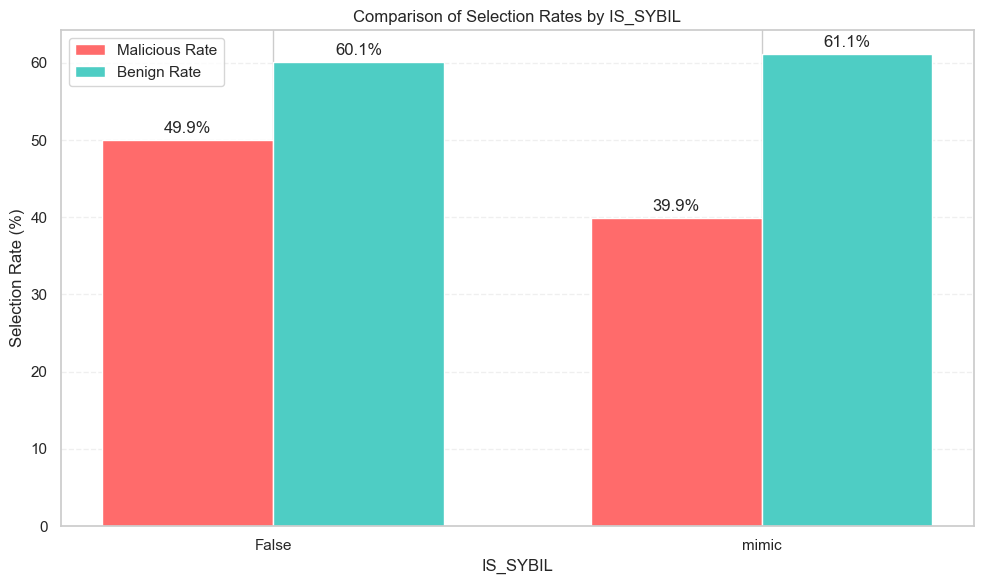

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

def compare_is_sybil_selection_rates(df):
    # Read the CSV file
    
    # Filter out rows with missing selection rate values
    df_filtered = df.dropna(subset=['AVG_MALICIOUS_RATE', 'AVG_BENIGN_RATE'])
    
    # Group by IS_SYBIL and calculate mean of selection rates
    grouped_df = df_filtered.groupby('IS_SYBIL').agg({
        'AVG_MALICIOUS_RATE': 'mean',
        'AVG_BENIGN_RATE': 'mean'
    }).reset_index()
    
    # Convert to percentages for better readability
    grouped_df['AVG_MALICIOUS_RATE'] *= 100
    grouped_df['AVG_BENIGN_RATE'] *= 100
    
    # Create a simple bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Set width of bars
    bar_width = 0.35
    
    # Set positions of bars on X axis
    r1 = range(len(grouped_df))
    r2 = [x + bar_width for x in r1]
    
    # Create bars
    malicious_bars = ax.bar(r1, grouped_df['AVG_MALICIOUS_RATE'], width=bar_width, 
                           label='Malicious Rate', color='#ff6b6b')
    benign_bars = ax.bar(r2, grouped_df['AVG_BENIGN_RATE'], width=bar_width, 
                         label='Benign Rate', color='#4ecdc4')
    
    # Add labels and title
    ax.set_xlabel('IS_SYBIL')
    ax.set_ylabel('Selection Rate (%)')
    ax.set_title('Comparison of Selection Rates by IS_SYBIL')
    ax.set_xticks([r + bar_width/2 for r in range(len(grouped_df))])
    ax.set_xticklabels(grouped_df['IS_SYBIL'])
    
    # Add value labels on bars
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.1f}%',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    
    add_labels(malicious_bars)
    add_labels(benign_bars)
    
    # Add a legend
    ax.legend()
    
    # Add grid for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    
    # Show the plot
    plt.tight_layout()
    plt.savefig('is_sybil_comparison.png', dpi=300)
    plt.show()
    
    return grouped_df

# Example usage
result = compare_is_sybil_selection_rates(df_summary)

# selection rate overall

In [1]:
output_dir = "visual_result"
csv_file_summary = "results/result_312_new/summary.csv"
csv_file_round = "results/result_312_new/all_rounds.csv"

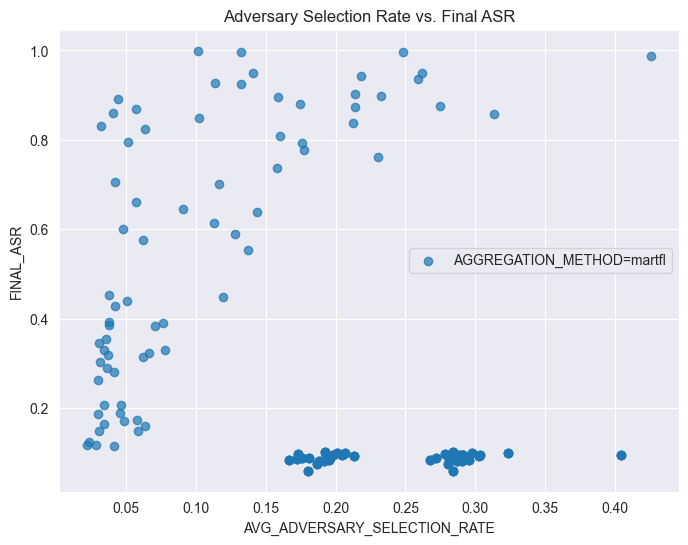

Pearson correlation (AVG_ADVERSARY_SELECTION_RATE vs. FINAL_ASR): -0.3541, p-value: 0.0000


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


def analyze_and_plot_from_csv(csv_file, x_metric, y_metric, group_by=None, plot_title=None):
    """
    Load data from a CSV file, plot specified metrics, and compute Pearson correlation.

    Args:
        csv_file (str): Path to the CSV file containing the experiment results.
        x_metric (str): Column name to use as x-axis.
        y_metric (str): Column name to use as y-axis.
        group_by (str, optional): Column name to group data points for plotting.
        plot_title (str, optional): Title of the plot.

    Returns:
        dict: A dictionary containing correlation coefficient and p-value.
    """
    df = pd.read_csv(csv_file)

    plt.figure(figsize=(8, 6))

    if group_by and group_by in df.columns:
        groups = df[group_by].unique()
        for group in groups:
            group_df = df[df[group_by] == group]
            plt.scatter(group_df[x_metric], group_df[y_metric], alpha=0.7, label=f'{group_by}={group}')
    else:
        plt.scatter(df[x_metric], df[y_metric], alpha=0.7)

    plt.xlabel(x_metric)
    plt.ylabel(y_metric)
    plt.title(plot_title if plot_title else f'{y_metric} vs. {x_metric}')
    plt.grid(True)

    if group_by:
        plt.legend()

    plt.show()

    # Compute Pearson correlation
    clean_df = df.dropna(subset=[x_metric, y_metric])
    corr, p_value = pearsonr(clean_df[x_metric], clean_df[y_metric])
    print(f'Pearson correlation ({x_metric} vs. {y_metric}): {corr:.4f}, p-value: {p_value:.4f}')

    return {'correlation': corr, 'p_value': p_value}


# Example usage:
analysis_result = analyze_and_plot_from_csv(
    csv_file=csv_file_summary,
    x_metric='AVG_ADVERSARY_SELECTION_RATE',
    y_metric='FINAL_ASR',
    group_by='AGGREGATION_METHOD',
    plot_title='Adversary Selection Rate vs. Final ASR'
)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your result CSV file
def load_experiment_results(csv_path):
    return pd.read_csv(csv_path)


def plot_selection_analysis(df):
    # Plot adversary selection rate vs. discovery_quality
    sns.set(style="whitegrid")

    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=df,
        x="AVG_DISTRIBUTION_SIMILARITY",
        y="AVG_ADVERSARY_SELECTION_RATE",
        hue="ADV_RATE",
        style="buyer_data_mode",
        markers=True,
        palette="tab10"
    )

    plt.title('Adversary Selection Rate vs. Distribution Similarity')
    plt.xlabel('Average Buyer-Seller Distribution Similarity')
    plt.ylabel('Average Adversary Selection Rate')
    plt.legend(title="Adv Rate / Buyer Mode")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Load data from CSV
df = pd.read_csv("your_experiment_results.csv")

# Example plotting
plot_selection_analysis(df)

# selection pattern with data distribution

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


def analyze_and_plot_from_csv(csv_file, x_metric, y_metric, group_by=None, plot_title=None):
    """
    Load data from a CSV file, plot specified metrics, and compute Pearson correlation.

    Args:
        csv_file (str): Path to the CSV file containing the experiment results.
        x_metric (str): Column name to use as x-axis.
        y_metric (str): Column name to use as y-axis.
        group_by (str, optional): Column name to group data points for plotting.
        plot_title (str, optional): Title of the plot.

    Returns:
        dict: A dictionary containing correlation coefficient and p-value.
    """
    df = pd.read_csv(csv_file)

    plt.figure(figsize=(8, 6))

    if group_by and group_by in df.columns:
        groups = df[group_by].unique()
        for group in groups:
            group_df = df[df[group_by] == group]
            plt.scatter(group_df[x_metric], group_df[y_metric], alpha=0.7, label=f'{group_by}={group}')
    else:
        plt.scatter(df[x_metric], df[y_metric], alpha=0.7)

    plt.xlabel(x_metric)
    plt.ylabel(y_metric)
    plt.title(plot_title if plot_title else f'{y_metric} vs. {x_metric}')
    plt.grid(True)

    if group_by:
        plt.legend()

    plt.show()

    # Compute Pearson correlation
    clean_df = df.dropna(subset=[x_metric, y_metric])
    corr, p_value = pearsonr(clean_df[x_metric], clean_df[y_metric])
    print(f'Pearson correlation ({x_metric} vs. {y_metric}): {corr:.4f}, p-value: {p_value:.4f}')

    return {'correlation': corr, 'p_value': p_value}


def plot_selection_pattern_similarity(csv_file):
    """
    Compare the similarity of the selection pattern for each experiment and visualize it using a bar chart.
    The x-axis separates the scenario based on 'buyer_data_mode'.
    """
    df = pd.read_csv(csv_file)
    
    if 'buyer_data_mode' not in df.columns or 'AVG_SELECTED_DISTRIBUTION_SIMILARITY' not in df.columns or 'AVG_UNSELECTED_DISTRIBUTION_SIMILARITY' not in df.columns:
        print("Required columns not found in the CSV file.")
        return
    
    grouped_df = df.groupby('buyer_data_mode')[['AVG_SELECTED_DISTRIBUTION_SIMILARITY', 'AVG_UNSELECTED_DISTRIBUTION_SIMILARITY']].mean()
    
    grouped_df.plot(kind='bar', figsize=(8, 6), width=0.7)
    plt.xlabel('Buyer Data Mode')
    plt.ylabel('Distribution Similarity')
    plt.title('Comparison of Selection Pattern Similarity')
    plt.xticks(rotation=0)
    plt.legend(['Selected Clients', 'Unselected Clients'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


# Example usage:
# plot_selection_pattern_similarity('results/summary.csv')


# Average Selection Rate of Clients (Adversary vs. Benign)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import defaultdict

def plot_selection_rate_by_factors(csv_file, output_dir):
    """
    Visualize how TRIGGER_RATE, ADV_RATE, buyer_data_mode, and IS_SYBIL impact the selection rate of adversaries.
    Saves bar charts for different variable combinations.
    """
    df = pd.read_csv(csv_file)
    os.makedirs(output_dir, exist_ok=True)
    
    # Ensure required columns exist
    required_cols = {'TRIGGER_RATE', 'ADV_RATE', 'buyer_data_mode', 'IS_SYBIL', 'AVG_ADVERSARY_SELECTION_RATE', 'AVG_BENIGN_SELECTION_RATE'}
    if not required_cols.issubset(df.columns):
        print("Missing required columns in the CSV file.")
        return
    
    # Plot selection rate vs. different factors
    for factor in ['TRIGGER_RATE', 'ADV_RATE', 'buyer_data_mode', 'IS_SYBIL']:
        plt.figure(figsize=(10, 6))
        sns.barplot(data=df, x=factor, y='AVG_ADVERSARY_SELECTION_RATE', hue='buyer_data_mode', palette='Set2')
        plt.xlabel(factor)
        plt.ylabel("Average Adversary Selection Rate")
        plt.title(f"Impact of {factor} on Adversary Selection Rate")
        plt.legend(title='Buyer Data Mode')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.xticks(rotation=45)
        plt.tight_layout()
        
        # Save figure
        save_path = os.path.join(output_dir, f"selection_rate_vs_{factor}.png")
        plt.savefig(save_path)
        print(f"Saved: {save_path}")
        plt.show()


# Example usage:
# plot_selection_rate_by_factors('results/summary.csv', 'results/figures')


# plot_adv_proportion_selection_fairness

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_adv_proportion_selection_fairness(csv_path):
    df = pd.read_csv(csv_path)

    # Calculate average selection rates grouped by ADV_RATE and client type
    summary_df = df.groupby(['ADV_RATE']).agg({
        'AVG_ADVERSARY_SELECTION_RATE': 'mean',
        'AVG_BENIGN_SELECTION_RATE': 'mean'
    }).reset_index().melt(id_vars='ADV_RATE',
                          value_vars=['AVG_ADVERSARY_SELECTION_RATE', 'AVG_BENIGN_SELECTION_RATE'],
                          var_name='Client Type',
                          value_name='Average Selection Rate')

    # Map client types for clearer labels
    summary_df['Client Type'] = summary_df['Client Type'].replace({
        'AVG_ADVERSARY_SELECTION_RATE': 'Adversary',
        'AVG_BENIGN_SELECTION_RATE': 'Benign'
    })

    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=summary_df,
        x='ADV_RATE',
        y='Average Selection Rate',
        hue='Client Type',
        palette="muted"
    )

    plt.title('Impact of Adversary Proportion on Selection Fairness')
    plt.xlabel('Adversary Proportion (ADV_RATE)')
    plt.ylabel('Average Selection Rate')
    plt.legend(title="Client Type")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Usage example
plot_adv_proportion_selection_fairness("your_experiment_results.csv")


# selection rate vs asr

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import defaultdict

def plot_selection_rate_by_factors(csv_file, output_dir):
    """
    Visualize how TRIGGER_RATE, ADV_RATE, buyer_data_mode, and IS_SYBIL impact the selection rate of adversaries.
    Saves bar charts for different variable combinations.
    """
    df = pd.read_csv(csv_file)
    os.makedirs(output_dir, exist_ok=True)
    
    # Ensure required columns exist
    required_cols = {'TRIGGER_RATE', 'ADV_RATE', 'buyer_data_mode', 'IS_SYBIL', 'AVG_ADVERSARY_SELECTION_RATE', 'AVG_BENIGN_SELECTION_RATE'}
    if not required_cols.issubset(df.columns):
        print("Missing required columns in the CSV file.")
        return
    
    # Plot selection rate vs. different factors
    for factor in ['TRIGGER_RATE', 'ADV_RATE', 'buyer_data_mode', 'IS_SYBIL']:
        plt.figure(figsize=(10, 6))
        sns.barplot(data=df, x=factor, y='AVG_ADVERSARY_SELECTION_RATE', hue='buyer_data_mode', palette='Set2')
        plt.xlabel(factor)
        plt.ylabel("Average Adversary Selection Rate")
        plt.title(f"Impact of {factor} on Adversary Selection Rate")
        plt.legend(title='Buyer Data Mode')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.xticks(rotation=45)
        plt.tight_layout()
        
        # Save figure
        save_path = os.path.join(output_dir, f"selection_rate_vs_{factor}.png")
        plt.savefig(save_path)
        print(f"Saved: {save_path}")
        plt.show()

def plot_selection_rate_vs_asr(csv_file, output_dir):
    """
    Visualize the relationship between Adversary Selection Rate and Attack Success Rate (ASR).
    Saves scatter plot with trend line and category differentiation.
    """
    df = pd.read_csv(csv_file)
    os.makedirs(output_dir, exist_ok=True)
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=df,
        x='AVG_ADVERSARY_SELECTION_RATE',
        y='FINAL_ASR',
        hue='ADV_RATE',
        size='TRIGGER_RATE',
        style='IS_SYBIL',
        palette='viridis',
        alpha=0.8,
        edgecolor='black'
    )
    
    # Add trend line
    sns.regplot(
        data=df,
        x='AVG_ADVERSARY_SELECTION_RATE',
        y='FINAL_ASR',
        scatter=False,
        color='red',
        line_kws={'linestyle': '--'}
    )
    
    plt.title('Impact of Selection Rate on Attack Success Rate (ASR)')
    plt.xlabel('Average Adversary Selection Rate')
    plt.ylabel('Final Attack Success Rate (ASR)')
    plt.legend(title='ADV_RATE')
    plt.grid(True)
    plt.tight_layout()
    
    # Save figure
    save_path = os.path.join(output_dir, "selection_rate_vs_asr.png")
    plt.savefig(save_path)
    print(f"Saved: {save_path}")
    plt.show()

# Example usage:
# plot_selection_rate_by_factors('results/summary.csv', 'results/figures')
# plot_selection_rate_vs_asr('results/summary.csv', 'results/figures')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import defaultdict
from scipy.stats import entropy

def plot_selection_rate_by_factors(csv_file, output_dir):
    """
    Visualize how TRIGGER_RATE, ADV_RATE, buyer_data_mode, and IS_SYBIL impact the selection rate of adversaries.
    Saves bar charts for different variable combinations.
    """
    df = pd.read_csv(csv_file)
    os.makedirs(output_dir, exist_ok=True)
    
    # Ensure required columns exist
    required_cols = {'TRIGGER_RATE', 'ADV_RATE', 'buyer_data_mode', 'IS_SYBIL', 'AVG_ADVERSARY_SELECTION_RATE', 'AVG_BENIGN_SELECTION_RATE'}
    if not required_cols.issubset(df.columns):
        print("Missing required columns in the CSV file.")
        return
    
    # Plot selection rate vs. different factors
    for factor in ['TRIGGER_RATE', 'ADV_RATE', 'buyer_data_mode', 'IS_SYBIL']:
        plt.figure(figsize=(10, 6))
        sns.barplot(data=df, x=factor, y='AVG_ADVERSARY_SELECTION_RATE', hue='buyer_data_mode', palette='Set2')
        plt.xlabel(factor)
        plt.ylabel("Average Adversary Selection Rate")
        plt.title(f"Impact of {factor} on Adversary Selection Rate")
        plt.legend(title='Buyer Data Mode')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.xticks(rotation=45)
        plt.tight_layout()
        
        # Save figure
        save_path = os.path.join(output_dir, f"selection_rate_vs_{factor}.png")
        plt.savefig(save_path)
        print(f"Saved: {save_path}")
        plt.show()

def plot_selection_rate_vs_asr(csv_file, output_dir):
    """
    Visualize the relationship between Adversary Selection Rate and Attack Success Rate (ASR).
    Saves scatter plot with trend line and category differentiation.
    """
    df = pd.read_csv(csv_file)
    os.makedirs(output_dir, exist_ok=True)
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=df,
        x='AVG_ADVERSARY_SELECTION_RATE',
        y='FINAL_ASR',
        hue='ADV_RATE',
        size='TRIGGER_RATE',
        style='IS_SYBIL',
        palette='viridis',
        alpha=0.8,
        edgecolor='black'
    )
    
    # Add trend line
    sns.regplot(
        data=df,
        x='AVG_ADVERSARY_SELECTION_RATE',
        y='FINAL_ASR',
        scatter=False,
        color='red',
        line_kws={'linestyle': '--'}
    )
    
    plt.title('Impact of Selection Rate on Attack Success Rate (ASR)')
    plt.xlabel('Average Adversary Selection Rate')
    plt.ylabel('Final Attack Success Rate (ASR)')
    plt.legend(title='ADV_RATE')
    plt.grid(True)
    plt.tight_layout()
    
    # Save figure
    save_path = os.path.join(output_dir, "selection_rate_vs_asr.png")
    plt.savefig(save_path)
    print(f"Saved: {save_path}")
    plt.show()

def calculate_selection_stability(selection_records, total_clients):
    """
    Compute selection variance and entropy to measure stability.
    """
    selection_matrix = np.zeros((len(selection_records), total_clients))
    
    for i, record in enumerate(selection_records):
        selected_clients = record.get('selected_clients', [])
        selection_matrix[i, selected_clients] = 1
    
    selection_variance = np.var(selection_matrix, axis=0)
    selection_entropy = entropy(selection_matrix.mean(axis=0), base=2)
    
    return selection_variance, selection_entropy

def plot_selection_stability(selection_records, total_clients, output_dir):
    """
    Visualize selection stability using variance and entropy.
    """
    variance, entropy_value = calculate_selection_stability(selection_records, total_clients)
    os.makedirs(output_dir, exist_ok=True)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=np.arange(total_clients), y=variance, palette="coolwarm")
    plt.xlabel("Client ID")
    plt.ylabel("Selection Variance")
    plt.title(f"Selection Stability Analysis (Entropy: {entropy_value:.2f})")
    plt.grid(True)
    plt.tight_layout()
    
    # Save figure
    save_path = os.path.join(output_dir, "selection_stability.png")
    plt.savefig(save_path)
    print(f"Saved: {save_path}")
    plt.show()

# Example usage:
# plot_selection_rate_by_factors('results/summary.csv', 'results/figures')
# plot_selection_rate_vs_asr('results/summary.csv', 'results/figures')
# plot_selection_stability(selection_records, total_clients=30, output_dir='results/figures')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import defaultdict
from scipy.stats import entropy

def plot_selection_rate_by_factors(csv_file, output_dir):
    """
    Visualize how TRIGGER_RATE, ADV_RATE, buyer_data_mode, and IS_SYBIL impact the selection rate of adversaries.
    Saves bar charts for different variable combinations.
    """
    df = pd.read_csv(csv_file)
    os.makedirs(output_dir, exist_ok=True)
    
    required_cols = {'TRIGGER_RATE', 'ADV_RATE', 'buyer_data_mode', 'IS_SYBIL', 'AVG_ADVERSARY_SELECTION_RATE', 'AVG_BENIGN_SELECTION_RATE'}
    if not required_cols.issubset(df.columns):
        print("Missing required columns in the CSV file.")
        return
    
    for factor in ['TRIGGER_RATE', 'ADV_RATE', 'buyer_data_mode', 'IS_SYBIL']:
        plt.figure(figsize=(10, 6))
        sns.barplot(data=df, x=factor, y='AVG_ADVERSARY_SELECTION_RATE', hue='buyer_data_mode', palette='Set2')
        plt.xlabel(factor)
        plt.ylabel("Average Adversary Selection Rate")
        plt.title(f"Impact of {factor} on Adversary Selection Rate")
        plt.legend(title='Buyer Data Mode')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.xticks(rotation=45)
        plt.tight_layout()
        
        save_path = os.path.join(output_dir, f"selection_rate_vs_{factor}.png")
        plt.savefig(save_path)
        print(f"Saved: {save_path}")
        plt.show()

def plot_distribution_shift_in_adversary_selection(csv_file, output_dir):
    """
    Analyze and visualize the distribution shift in adversary selection over time.
    Includes multiple runs to observe consistency.
    """
    df = pd.read_csv(csv_file)
    os.makedirs(output_dir, exist_ok=True)
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='round', y='malicious_rate', hue='ADV_RATE', style='IS_SYBIL', marker="o", dashes=False, palette='coolwarm', size='RUN')
    plt.xlabel("Round")
    plt.ylabel("Malicious Selection Rate")
    plt.title("Distribution Shift in Adversary Selection Over Time (Multiple Runs)")
    plt.grid(True)
    plt.legend(title="ADV_RATE / IS_SYBIL / RUN")
    plt.tight_layout()
    
    save_path = os.path.join(output_dir, "distribution_shift_adversary_selection.png")
    plt.savefig(save_path)
    print(f"Saved: {save_path}")
    plt.show()

def plot_adversary_selection_variability(csv_file, output_dir):
    """
    Show adversary selection variability over time using boxplots, grouped by RUN.
    """
    df = pd.read_csv(csv_file)
    os.makedirs(output_dir, exist_ok=True)
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='round', y='malicious_rate', hue='RUN', palette='coolwarm')
    plt.xlabel("Round")
    plt.ylabel("Malicious Selection Rate")
    plt.title("Variability in Adversary Selection Over Time (Grouped by RUN)")
    plt.grid(True)
    plt.legend(title="RUN")
    plt.tight_layout()
    
    save_path = os.path.join(output_dir, "adversary_selection_variability.png")
    plt.savefig(save_path)
    print(f"Saved: {save_path}")
    plt.show()

def plot_selection_stability(selection_records, total_clients, output_dir):
    """
    Visualize selection stability using variance and entropy, aggregated per RUN.
    """
    df = pd.DataFrame(selection_records)
    os.makedirs(output_dir, exist_ok=True)
    
    stability_by_run = df.groupby('RUN').apply(lambda x: entropy(x['malicious_rate'].values, base=2))
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=stability_by_run.index, y=stability_by_run.values, palette="coolwarm")
    plt.xlabel("RUN")
    plt.ylabel("Selection Entropy")
    plt.title("Selection Stability Across Multiple Runs")
    plt.grid(True)
    plt.tight_layout()
    
    save_path = os.path.join(output_dir, "selection_stability_by_run.png")
    plt.savefig(save_path)
    print(f"Saved: {save_path}")
    plt.show()

# Example usage:
# plot_selection_rate_by_factors('results/summary.csv', 'results/figures')
# plot_distribution_shift_in_adversary_selection('results/summary.csv', 'results/figures')
# plot_adversary_selection_variability('results/summary.csv', 'results/figures')
# plot_selection_stability(selection_records, total_clients=30, output_dir='results/figures')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


def plot_adversary_selection_over_time(csv_file, output_dir):
    """
    Plot the adversary selection rate over rounds with comprehensive comparisons for different scenarios.

    Args:
        csv_file (str): Path to CSV file with processed round logs.
        output_dir (str): Directory to save the generated plots.
    """
    df = pd.read_csv(csv_file)
    os.makedirs(output_dir, exist_ok=True)

    factors = ['ADV_RATE', 'TRIGGER_RATE', 'buyer_data_mode', 'IS_SYBIL']

    for factor in factors:
        plt.figure(figsize=(12, 7))
        sns.lineplot(
            data=df,
            x='round',
            y='malicious_rate',
            hue=factor,
            style='IS_SYBIL',
            markers=True,
            dashes=False,
            palette='viridis',
            ci='sd'
        )

        plt.xlabel("Round")
        plt.ylabel("Malicious Selection Rate")
        plt.title(f"Adversary Selection Rate Over Time by {factor}")
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(title=factor, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()

        save_path = os.path.join(output_dir, f"adversary_selection_over_time_by_{factor}.png")
        plt.savefig(save_path)
        print(f"Saved: {save_path}")
        plt.show()

# Example usage:
# plot_adversary_selection_over_time('results/all_rounds.csv', 'results/figures')
